# Loading

In [ ]:
!pip install scanpy
!pip install matplotlib
!pip install mofapy2
!pip install matplotlib
import matplotlib
from mofapy2.run.entry_point import entry_point
import anndata
import networkx as nx
import scanpy as sc
#import scglue
from matplotlib import rcParams
import pandas as pd
import numpy as np

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import palettable
import seaborn as sns
import matplotlib
import matplotlib.font_manager as fm

In [ ]:
import h5py
import pandas as pd
import numpy as np
import anndata

In [ ]:
def normalization(data):
    _range = np.max(abs(data))
    return data / _range

In [ ]:
def get_weights(f,view,factor,scale=True):
  view_names=f['views']['views'][:]
  group_names=f['groups']['groups'][:]
  feature_names=np.array([f['features'][i][:] for i in view_names])
  sample_names=np.array([f['samples'][i][:] for i in group_names])
  f_name=feature_names[np.where(view_names==str.encode(view))[0][0]]
  f_w=f['expectations']['W'][view][factor-1]
  if scale==True:
    f_w=normalization(f_w)
  res=pd.DataFrame()
  res['feature']=f_name
  res['weights']=f_w
  res['abs_weights']=abs(f_w)
  res['sig']='+'
  res.loc[(res.weights<0),'sig'] = '-'

  return res

# MOFA ALL

## MOFA_ALL Normalized Process

In [ ]:
# 读取MOFA配对数据
scRNA_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_seq_MOFA_normalized.h5ad")
scATAC_seq = anndata.read_h5ad('/content/drive/MyDrive/MI/scATAC_seq_MOFA_normalized.h5ad')
scEnhancer = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Enhancer_normalized.h5ad")
scPromoter = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Promoter_normalized.h5ad")

In [ ]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 11.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.0
    Uninstalling matplotlib-3.5.0:
      Successfully uninstalled matplotlib-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


         Falling back to preprocessing with `sc.pp.pca` and default params.


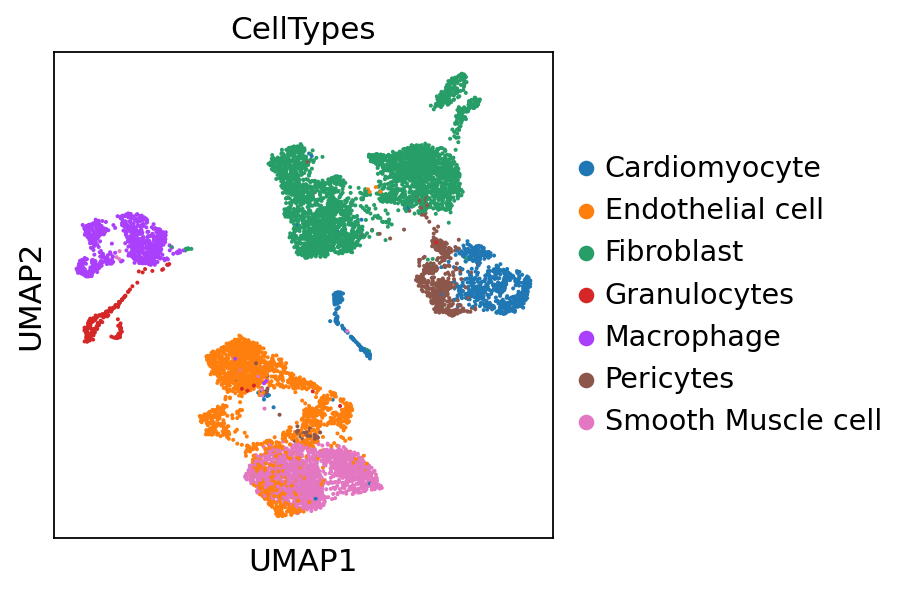

In [ ]:
!pip install leidenalg
sc.pp.neighbors(scRNA_seq, n_neighbors=20, n_pcs=40)
sc.tl.leiden(scRNA_seq)
sc.tl.paga(scRNA_seq)
sc.pl.paga(scRNA_seq, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(scRNA_seq, init_pos='paga')
sc.pl.umap(scRNA_seq, color=['CellTypes'])   

In [ ]:
import h5py
import pandas as pd
import numpy as np

In [ ]:
def normalization(data):
    _range = np.max(abs(data))
    return data / _range

In [ ]:
def get_weights(f,view,factor,scale=True):
  view_names=f['views']['views'][:]
  group_names=f['groups']['groups'][:]
  feature_names=np.array([f['features'][i][:] for i in view_names])
  sample_names=np.array([f['samples'][i][:] for i in group_names])
  f_name=feature_names[np.where(view_names==str.encode(view))[0][0]]
  f_w=f['expectations']['W'][view][factor-1]
  if scale==True:
    f_w=normalization(f_w)
  res=pd.DataFrame()
  res['feature']=f_name
  res['weights']=f_w
  res['abs_weights']=abs(f_w)
  res['sig']='+'
  res.loc[(res.weights<0),'sig'] = '-'

  return res

## MOFA P1 Process

In [ ]:
import h5py
import pandas as pd
import numpy as np

In [ ]:
def normalization(data):
    _range = np.max(abs(data))
    return data / _range

In [ ]:
def get_weights(f,view,factor,scale=True):
  view_names=f['views']['views'][:]
  group_names=f['groups']['groups'][:]
  feature_names=np.array([f['features'][i][:] for i in view_names])
  sample_names=np.array([f['samples'][i][:] for i in group_names])
  f_name=feature_names[np.where(view_names==str.encode(view))[0][0]]
  f_w=f['expectations']['W'][view][factor-1]
  if scale==True:
    f_w=normalization(f_w)
  res=pd.DataFrame()
  res['feature']=f_name
  res['weights']=f_w
  res['abs_weights']=abs(f_w)
  res['sig']='+'
  res.loc[(res.weights<0),'sig'] = '-'

  return res

In [ ]:
f_P1 = h5py.File('/content/drive/MyDrive/MI/MOFA_P1.hdf5','r')   #打开h5文件
# 可以查看所有的主键
for key in f_P1.keys():
    print(f_P1[key].name)

/data
/expectations
/features
/groups
/intercepts
/model_options
/samples
/training_opts
/training_stats
/variance_explained
/views


In [ ]:
scRNA_seq_P1 = scRNA_seq[scRNA_seq.obs['Type'].str.contains('P1')]
scATAC_seq_P1 = scATAC_seq[scATAC_seq.obs['Type'].str.contains('P1')]
scEnhancer_P1 = scEnhancer[scEnhancer.obs['Type'].str.contains('P1')]
scPromoter_P1 = scPromoter[scPromoter.obs['Type'].str.contains('P1')]

In [ ]:
for i in range(f_P1['expectations']['Z']['group0'].shape[0]):
  scRNA_seq_P1.obs['factor{0}'.format(i+1)]=f_P1['expectations']['Z']['group0'][i]
for i in range(f_P1['expectations']['Z']['group0'].shape[0]):
  scEnhancer_P1.obs['factor{0}'.format(i+1)]=f_P1['expectations']['Z']['group0'][i]
for i in range(f_P1['expectations']['Z']['group0'].shape[0]):
  scPromoter_P1.obs['factor{0}'.format(i+1)]=f_P1['expectations']['Z']['group0'][i]

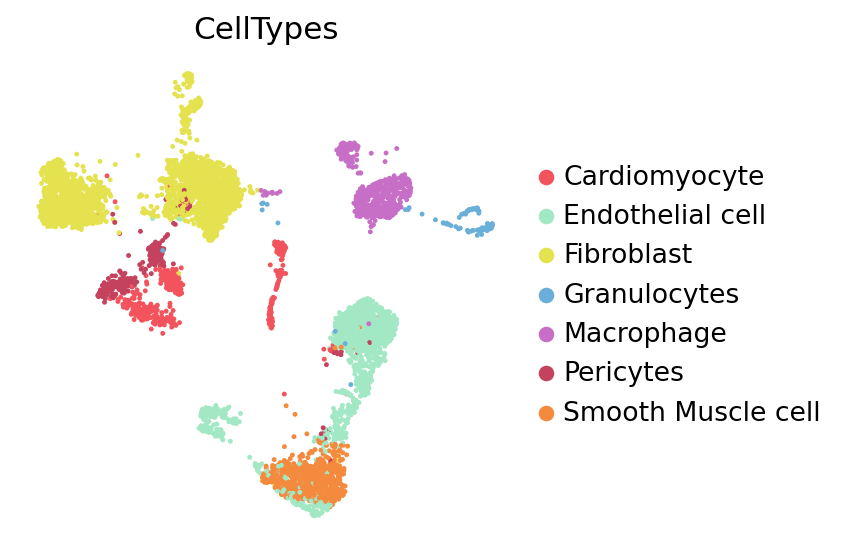

In [ ]:
scnmt=['#f2535d','#a2e8c4','#e5e24f','#6aafda','#c76fc7','#c4425d','#f48a3d','black','grey']
sc.settings.set_figure_params(dpi=80,figsize=[4,4])
sc.pl.umap(scRNA_seq_P1,
      color=["CellTypes"], 
      add_outline=False, 
      legend_loc='right margin', 
      legend_fontsize=12, 
      legend_fontoutline=1,
      frameon=False, palette=scnmt,
      )

In [ ]:
for i in range(f_P1['expectations']['Z']['group0'].shape[0]):
  scRNA_seq_P1.obs['factor{0}'.format(i+1)]=f_P1['expectations']['Z']['group0'][i]

In [ ]:
variance=pd.read_csv('/content/drive/MyDrive/MI/MOFA/variance_explained_P1.csv')
corr=pd.read_csv('/content/drive/MyDrive/MI/MOFA/correlate_factors_P1.csv')
variance.index=corr.index
variance

,RNA,Enhancer,Promoter
Factor1,15.514767,0.002109,0.001626
Factor2,8.581206,0.002567,0.001578
Factor3,3.728878,0.005821,0.005940
Factor4,0.019099,1.434279,1.360681
Factor5,1.723669,0.002837,0.003125
Factor6,1.667495,0.002464,0.001906
Factor7,1.556822,0.001163,0.001536
Factor8,1.466155,0.002543,0.002383
Factor9,0.073557,0.437320,0.550831
Factor10,0.001463,0.064203,0.508290


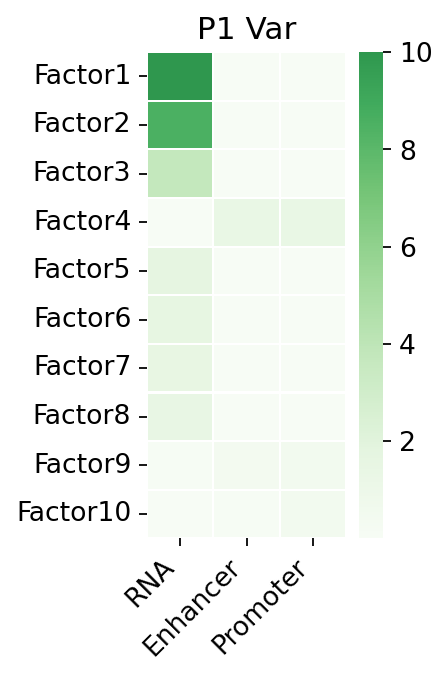

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2,4))         # Sample figsize in inches
new_blues=sns.color_palette("Greens", 1000)[0:700]
g=sns.heatmap(variance,
      cmap=new_blues,vmax=10,
      linewidths=.5,annot_kws={"size": 12},ax=ax
      )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('P1 Var')
plt.savefig("P1_var.png",dpi=300,bbox_inches = 'tight')

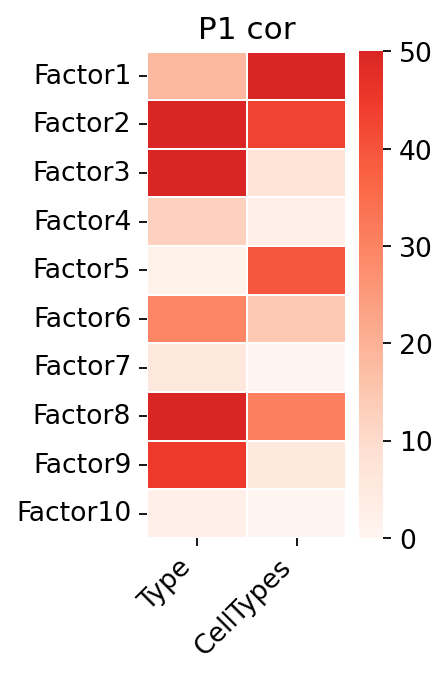

In [ ]:
fig, ax = plt.subplots(figsize=(2,4))         # Sample figsize in inches
new_reds=sns.color_palette("Reds", 1000)[0:700]
g=sns.heatmap(corr,
      cmap=new_reds, vmax=50,
      linewidths=.5,annot_kws={"size": 12},ax=ax,
      )

g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('P1 cor')
plt.savefig("P1_cor.png",dpi=300,bbox_inches = 'tight')

In [ ]:
plot_data=scRNA_seq_P1.obs
plot_data.head()

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,...,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10
P1_3MI_AAACCTGGTAGCGATG-1,pos,MI,3days,P1+3 dpi,1902,1902,5401.0,0.0,0.0,3,...,2.431723,-0.962712,-0.891485,-2.526959,-0.105339,-0.504612,-0.024006,0.898008,-1.451160,0.144599
P1_3MI_AAACCTGGTTCGCGAC-1,pos,MI,3days,P1+3 dpi,3560,3560,13569.0,0.0,0.0,17,...,2.239926,-0.845327,-0.780568,-1.838452,-1.116088,-0.115138,0.372013,-2.797705,2.028417,-0.159608
P1_3MI_AAACCTGTCGTAGATC-1,pos,MI,3days,P1+3 dpi,3133,3133,11937.0,0.0,0.0,1,...,-2.894701,-0.923348,-1.660899,-1.965326,-0.450751,-0.059573,0.093643,0.152122,3.790383,-0.560017
P1_3MI_AAACCTGTCTTGTTTG-1,pos,MI,3days,P1+3 dpi,3007,3007,10110.0,0.0,0.0,1,...,-2.031316,-0.405109,-1.031038,-2.119842,-0.288123,-0.048112,-0.077007,0.583555,3.853034,0.111927
P1_3MI_AAACGGGCAAGCTGGA-1,pos,MI,3days,P1+3 dpi,3332,3331,11707.0,0.0,0.0,3,...,2.442081,-0.232948,-1.565626,-1.636335,0.039937,-0.016658,-0.177362,2.699125,-0.104011,-0.101361


In [ ]:
from scipy.stats import ttest_1samp
from scipy import stats

In [ ]:
cell_t=list(set(plot_data['CellTypes']))
cell_pd=pd.DataFrame(index=cell_t)

for i in [1,2,3,5,6,8,9]:
  test=[]
  for j in cell_t:
    a=plot_data[plot_data['CellTypes']==j]['factor'+str(i)].values
    b=plot_data[~(plot_data['CellTypes']==j)]['factor'+str(i)].values
    t, p = stats.ttest_ind(a,b)
    logp=-np.log(p)
    if(logp>500):
      logp=500
    test.append(logp)
  cell_pd['factor'+str(i)]=test
cell_pd

,factor1,factor2,factor3,factor5,factor6,factor8,factor9
Macrophage,15.912316,500.000000,53.391588,104.153936,5.242135,3.180392,3.536376
Fibroblast,500.000000,286.370467,252.409928,2.232214,0.875247,2.362502,1.476859
Pericytes,6.591830,16.828455,500.000000,57.314884,170.213264,103.039916,0.132974
Smooth Muscle cell,500.000000,141.528858,5.036375,0.528853,70.693042,15.978703,21.479930
Endothelial cell,500.000000,76.927664,182.941675,19.947063,3.241817,109.440866,4.083800
Granulocytes,4.941973,283.390422,28.669631,409.791439,167.254509,0.139852,1.685245
Cardiomyocyte,0.865444,0.663891,500.000000,314.289639,112.901554,16.581639,0.078115


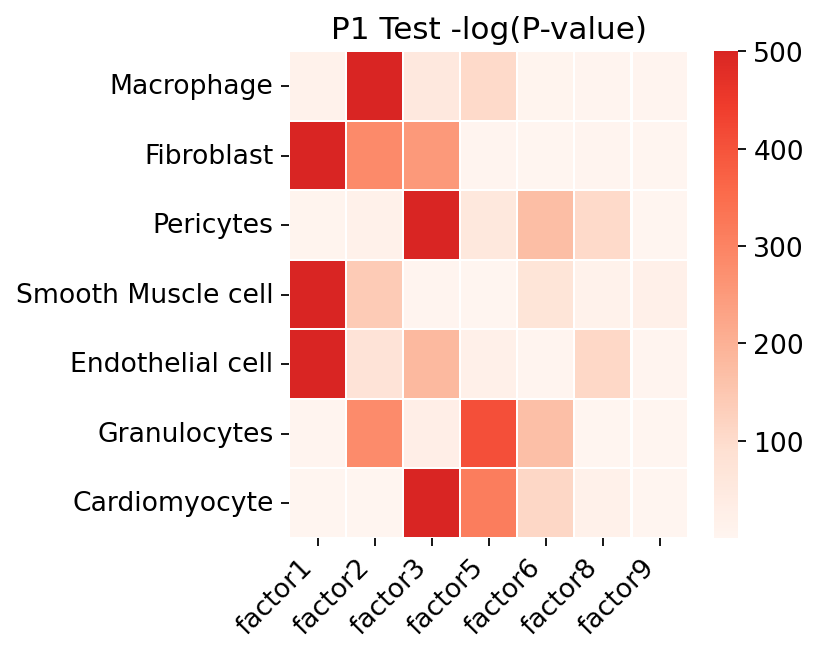

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))         # Sample figsize in inches
new_blues=sns.color_palette("Reds", 1000)[0:700]
g=sns.heatmap(cell_pd,
      cmap=new_blues,vmax=500,
      linewidths=.5,annot_kws={"size": 12},ax=ax
      )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('P1 Test -log(P-value)')
plt.savefig("P1_cor_cell.png",dpi=300,bbox_inches = 'tight')

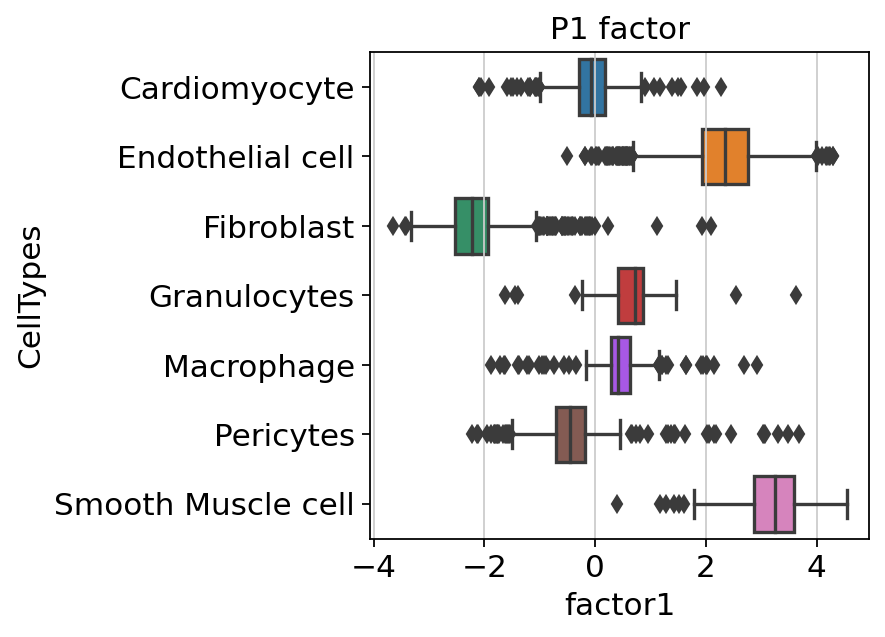

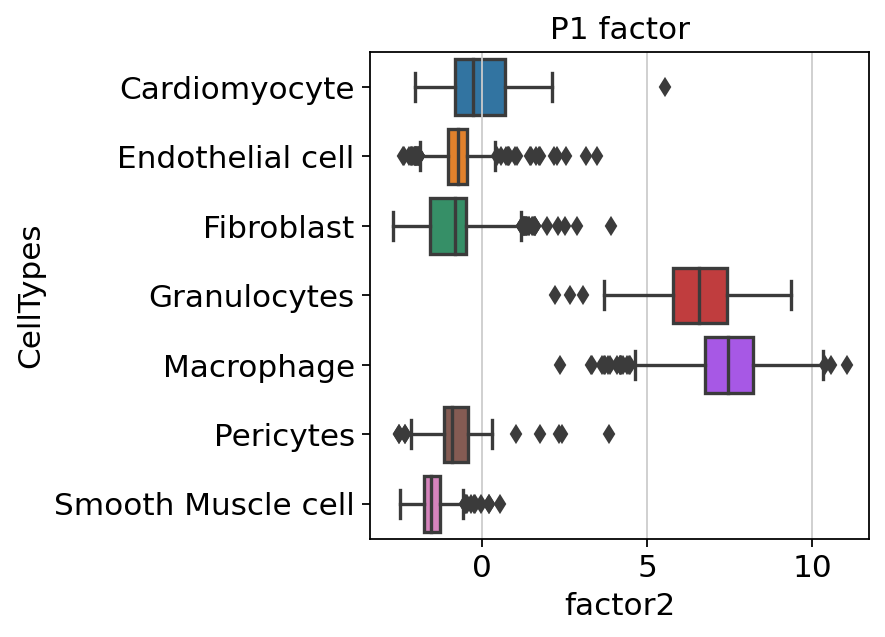

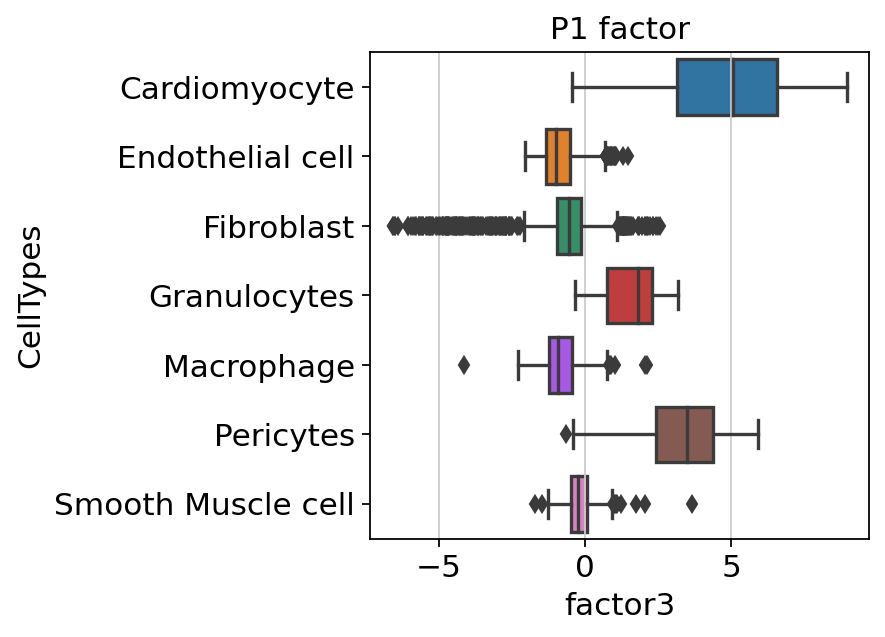

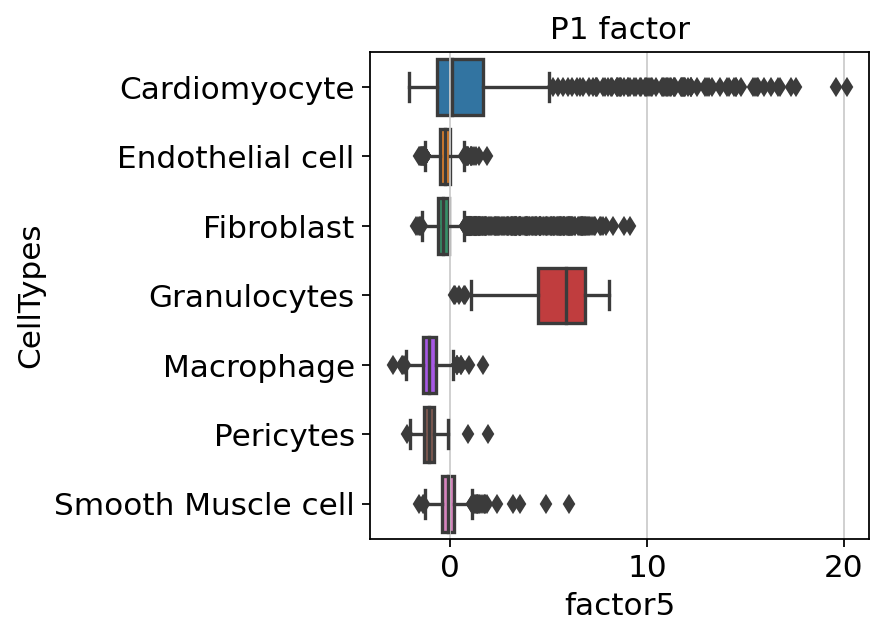

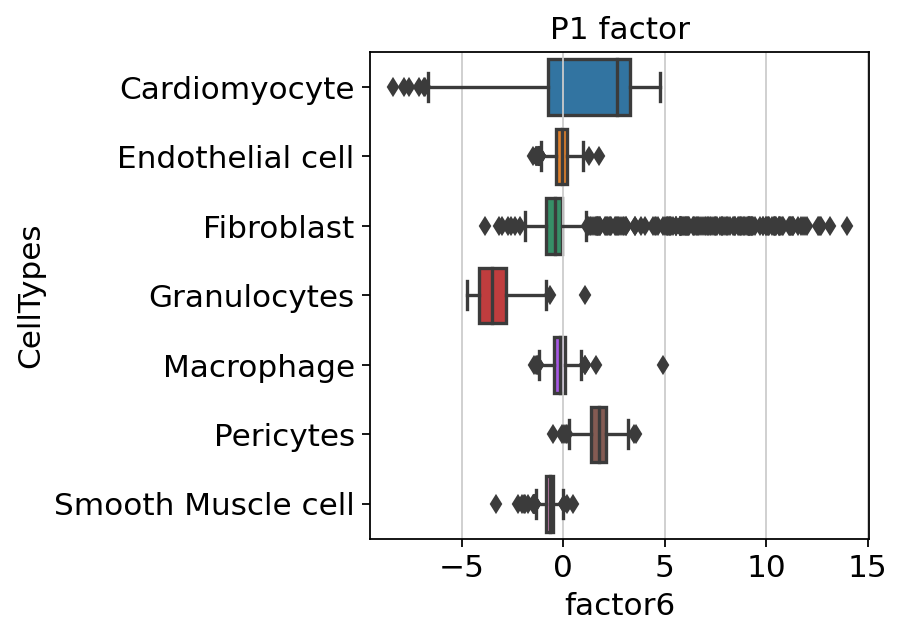

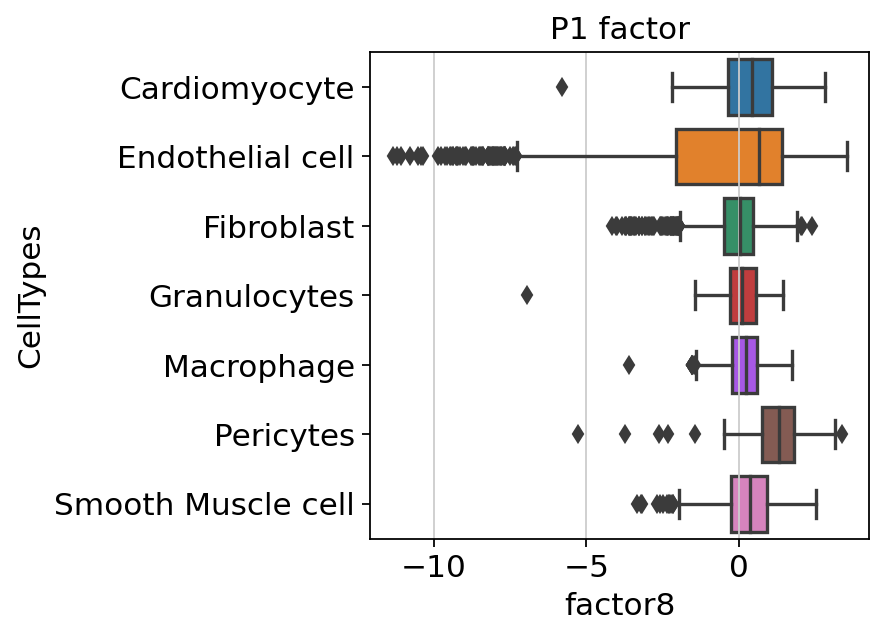

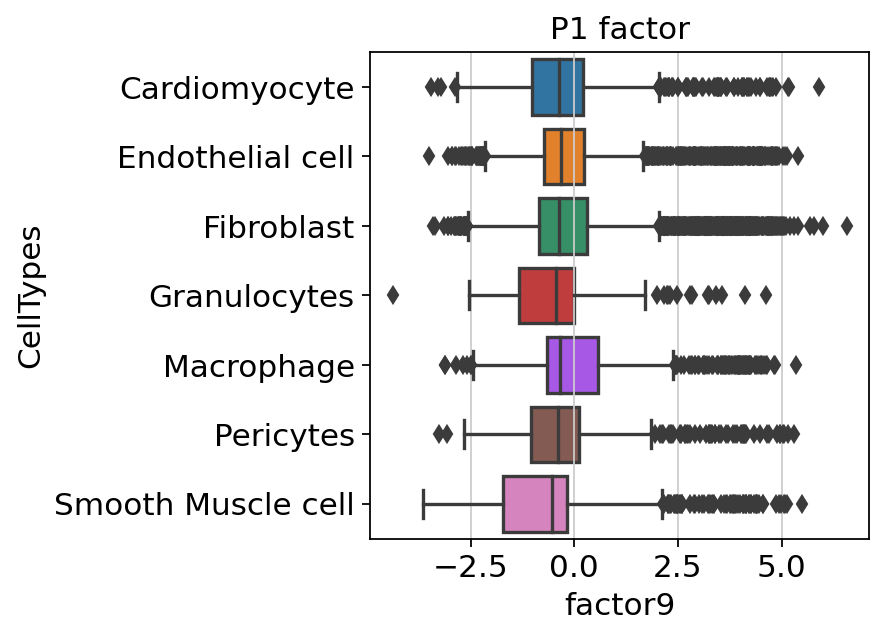

<Figure size 320x320 with 0 Axes>

In [ ]:
for i in [1,2,3,5,6,8,9]:
  sns.boxplot(y='CellTypes',x='factor'+str(i),data=scRNA_seq_P1.obs)
  plt.title('P1 factor')
  plt.savefig("P1_factor{0}.png".format(str(i)),dpi=300,bbox_inches = 'tight')
  plt.show()
  plt.savefig("P1_cor_cell.png",dpi=300,bbox_inches = 'tight')

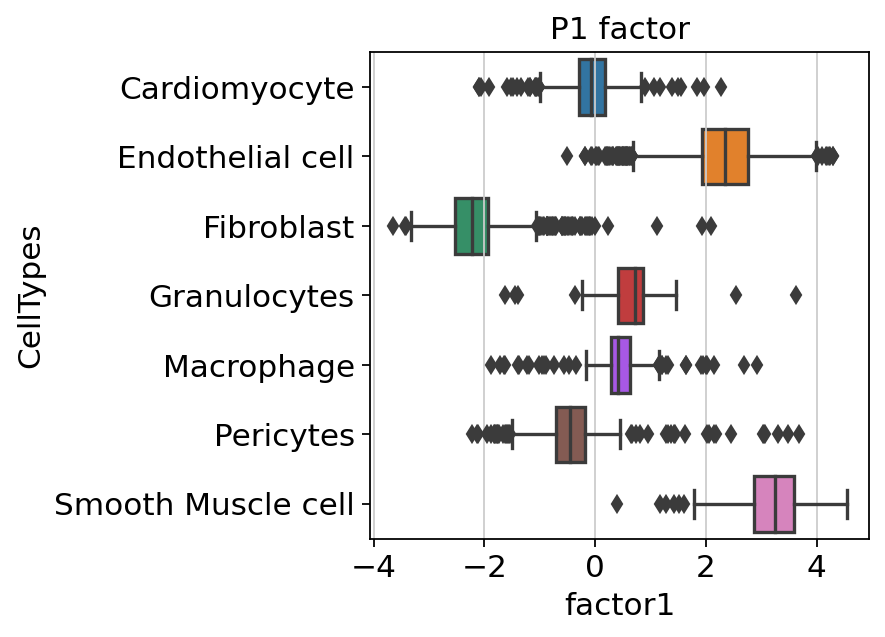

<Figure size 320x320 with 0 Axes>

In [ ]:
sns.boxplot(y='CellTypes',x='factor'+str(1),data=scRNA_seq_P1.obs)
plt.title('P1 factor')
plt.savefig("P1_factor{0}.png".format(str(1)),dpi=300,bbox_inches = 'tight')
plt.show()
plt.savefig("P1_factor_1.png",dpi=300,bbox_inches = 'tight')  

## MOFA P8 Process

In [ ]:
import h5py
import pandas as pd
import numpy as np

In [ ]:
def normalization(data):
    _range = np.max(abs(data))
    return data / _range

In [ ]:
def get_weights(f,view,factor,scale=True):
  view_names=f['views']['views'][:]
  group_names=f['groups']['groups'][:]
  feature_names=np.array([f['features'][i][:] for i in view_names])
  sample_names=np.array([f['samples'][i][:] for i in group_names])
  f_name=feature_names[np.where(view_names==str.encode(view))[0][0]]
  f_w=f['expectations']['W'][view][factor-1]
  if scale==True:
    f_w=normalization(f_w)
  res=pd.DataFrame()
  res['feature']=f_name
  res['weights']=f_w
  res['abs_weights']=abs(f_w)
  res['sig']='+'
  res.loc[(res.weights<0),'sig'] = '-'

  return res

In [ ]:
f_P8 = h5py.File('/content/drive/MyDrive/MI/MOFA_P8.hdf5','r')   #打开h5文件
# 可以查看所有的主键
for key in f_P8.keys():
    print(f_P8[key].name)

/data
/expectations
/features
/groups
/intercepts
/model_options
/samples
/training_opts
/training_stats
/variance_explained
/views


In [ ]:
scRNA_seq_P8 = scRNA_seq[scRNA_seq.obs['Type'].str.contains('P8')]
scATAC_seq_P8 = scATAC_seq[scATAC_seq.obs['Type'].str.contains('P8')]
scEnhancer_P8 = scEnhancer[scEnhancer.obs['Type'].str.contains('P8')]
scPromoter_P8 = scPromoter[scPromoter.obs['Type'].str.contains('P8')]

In [ ]:
for i in range(f_P8['expectations']['Z']['group0'].shape[0]):
  scRNA_seq_P8.obs['factor{0}'.format(i+1)]=f_P8['expectations']['Z']['group0'][i]
for i in range(f_P8['expectations']['Z']['group0'].shape[0]):
  scRNA_seq_P8.obs['factor{0}'.format(i+1)]=f_P8['expectations']['Z']['group0'][i]
for i in range(f_P8['expectations']['Z']['group0'].shape[0]):
  scRNA_seq_P8.obs['factor{0}'.format(i+1)]=f_P8['expectations']['Z']['group0'][i]

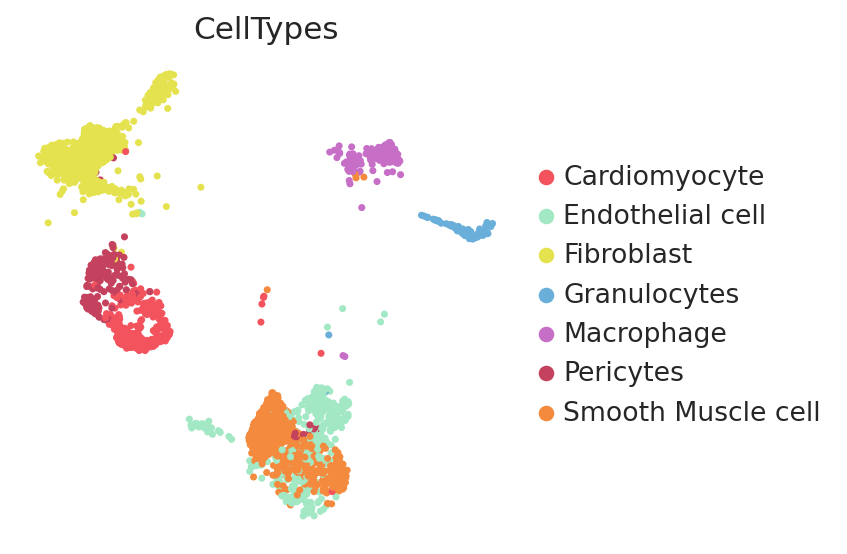

In [ ]:
scnmt=['#f2535d','#a2e8c4','#e5e24f','#6aafda','#c76fc7','#c4425d','#f48a3d','black','grey']
sc.settings.set_figure_params(dpi=80,figsize=[4,4])
sc.pl.umap(scRNA_seq_P8,
      color=["CellTypes"], 
      add_outline=False, 
      legend_loc='right margin', 
      legend_fontsize=12, 
      legend_fontoutline=1,
      frameon=False, palette=scnmt,
      )

In [ ]:
for i in range(f_P8['expectations']['Z']['group0'].shape[0]):
  scRNA_seq_P8.obs['factor{0}'.format(i+1)]=f_P8['expectations']['Z']['group0'][i]

In [ ]:
variance=pd.read_csv('/content/drive/MyDrive/MI/MOFA/variance_explained_P8.csv')
corr=pd.read_csv('/content/drive/MyDrive/MI/MOFA/correlate_factors_P8.csv')
variance.index=corr.index
variance

,RNA,Enhancer,Promoter
Factor1,13.917899,0.005676,0.004836
Factor2,6.097001,0.010933,0.005645
Factor3,4.884530,0.014704,0.011760
Factor4,0.212213,1.050281,0.993823


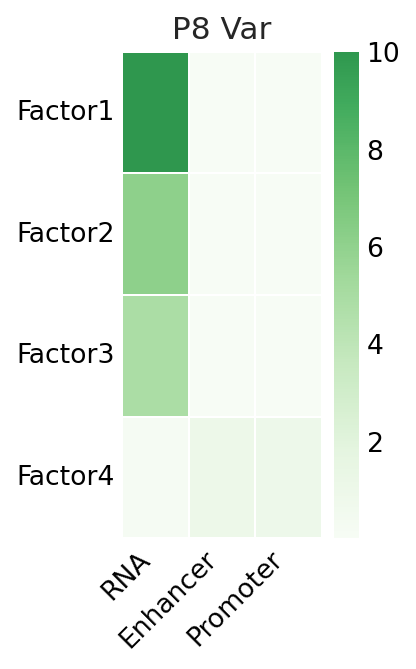

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2,4))         # Sample figsize in inches
new_blues=sns.color_palette("Greens", 1000)[0:700]
g=sns.heatmap(variance,
      cmap=new_blues,vmax=10,
      linewidths=.5,annot_kws={"size": 12},ax=ax
      )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('P8 Var')
plt.savefig("p8_var.png",dpi=300,bbox_inches = 'tight')

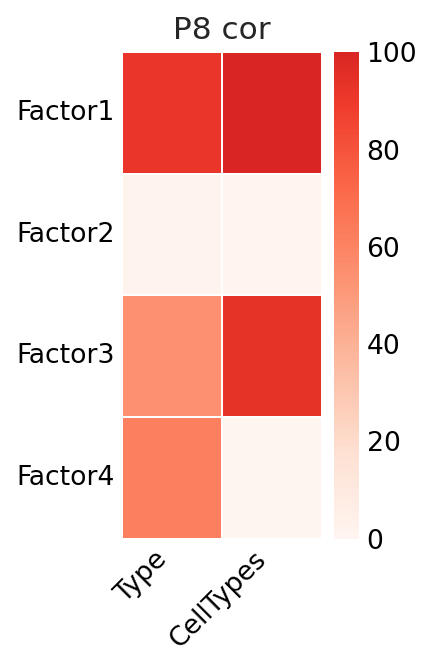

In [ ]:
fig, ax = plt.subplots(figsize=(2,4))         # Sample figsize in inches
new_reds=sns.color_palette("Reds", 1000)[0:700]
g=sns.heatmap(corr,
      cmap=new_reds, vmax=100,
      linewidths=.5,annot_kws={"size": 12},ax=ax,
      )

g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('P8 cor')
plt.savefig("p8_cor.png",dpi=300,bbox_inches = 'tight')

In [ ]:
plot_data=scRNA_seq_P8.obs
plot_data.head()

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,domain,leiden_anno,CellTypes,delli,sample,CellType,factor1,factor2,factor3,factor4
P8_3MI_AAACCTGAGCTCCTTC-1,neg,MI,3days,P8+3 dpi,2270,2270,6521.0,0.0,0.0,5,scRNA-seq,Fibroblast-2,Fibroblast,tr,cell_6233,Fibroblast,3.498948,-1.157417,-1.307785,-1.464917
P8_3MI_AAACCTGCATGCCTAA-1,neg,MI,3days,P8+3 dpi,4979,4978,24558.0,0.0,0.0,5,scRNA-seq,Fibroblast-2,Fibroblast,tr,cell_6234,Fibroblast,3.220799,-0.910798,-1.278015,-1.332524
P8_3MI_AAACCTGTCTTTCCTC-1,neg,MI,3days,P8+3 dpi,3392,3392,12045.0,0.0,0.0,5,scRNA-seq,Fibroblast-2,Fibroblast,tr,cell_6235,Fibroblast,3.960010,-1.256520,-0.987885,-0.796286
P8_3MI_AAACGGGAGACATAAC-1,neg,MI,3days,P8+3 dpi,3104,3101,8537.0,0.0,0.0,11,scRNA-seq,Fibroblast-4,Fibroblast,tr,cell_6236,Fibroblast,2.403396,-0.156503,-0.340689,-0.780143
P8_3MI_AAACGGGAGCGTTGCC-1,neg,MI,3days,P8+3 dpi,3153,3153,8298.0,0.0,0.0,0,scRNA-seq,Endothelial cell-2,Endothelial cell,tr,cell_6237,Endothelial cell,-2.423985,-1.281277,-1.301866,1.107524


In [ ]:
from scipy.stats import ttest_1samp
from scipy import stats

In [ ]:
cell_t=list(set(plot_data['CellTypes']))
cell_pd=pd.DataFrame(index=cell_t)

for i in [1,2,3,4]:
  test=[]
  for j in cell_t:
    a=plot_data[plot_data['CellTypes']==j]['factor'+str(i)].values
    b=plot_data[~(plot_data['CellTypes']==j)]['factor'+str(i)].values
    t, p = stats.ttest_ind(a,b)
    logp=-np.log(p)
    if(logp>500):
      logp=500
    test.append(logp)
  cell_pd['factor'+str(i)]=test
cell_pd

,factor1,factor2,factor3,factor4
Smooth Muscle cell,500.000000,58.294013,95.462412,10.813082
Cardiomyocyte,4.774546,10.993439,500.000000,6.175607
Granulocytes,2.945683,500.000000,15.246337,1.990475
Macrophage,0.925140,500.000000,26.007420,5.262519
Fibroblast,500.000000,61.052261,124.799210,15.043644
Pericytes,16.957763,10.393961,121.275166,1.962430
Endothelial cell,180.685491,25.373215,48.575432,0.491477


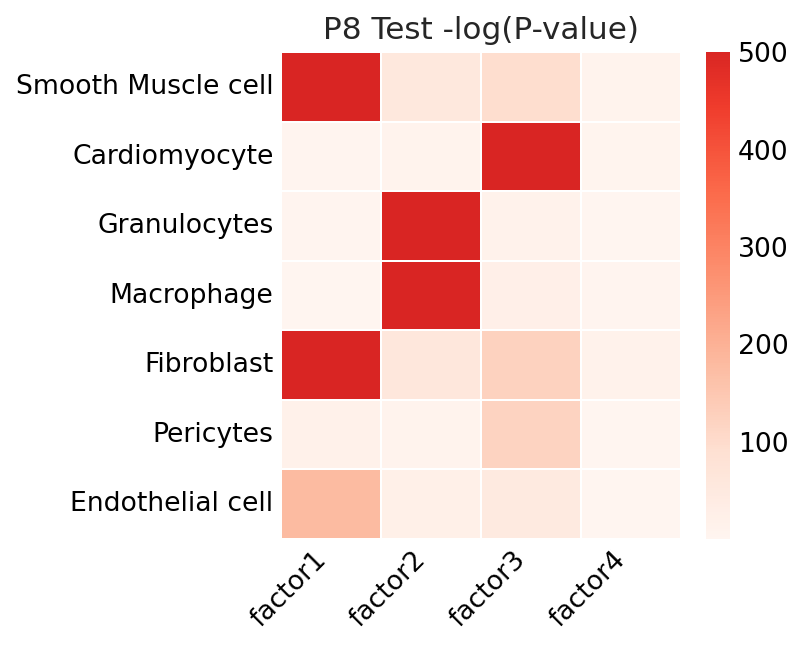

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))         # Sample figsize in inches
new_blues=sns.color_palette("Reds", 1000)[0:700]
g=sns.heatmap(cell_pd,
      cmap=new_blues,vmax=500,
      linewidths=.5,annot_kws={"size": 12},ax=ax
      )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('P8 Test -log(P-value)')
plt.savefig("p8_cor_cell.png",dpi=300,bbox_inches = 'tight')

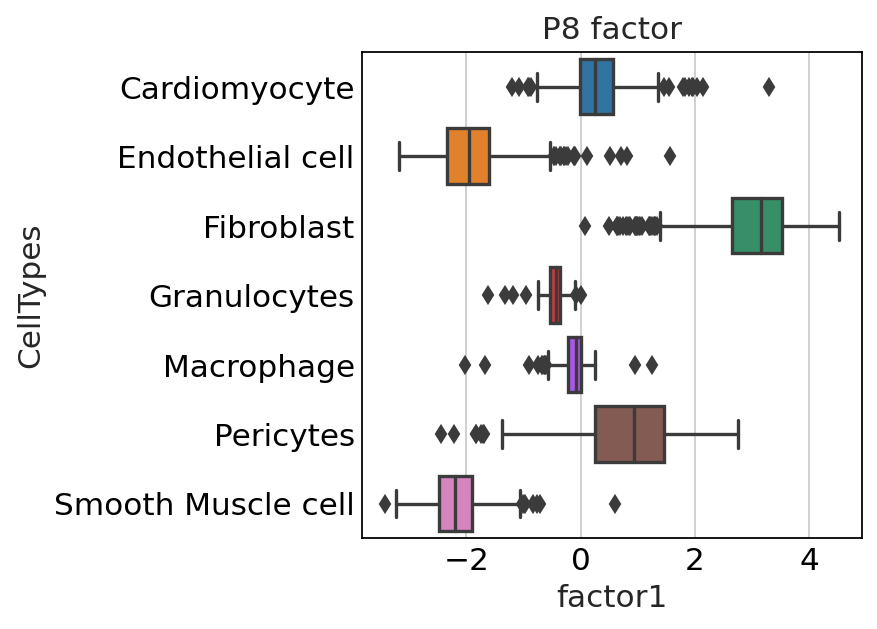

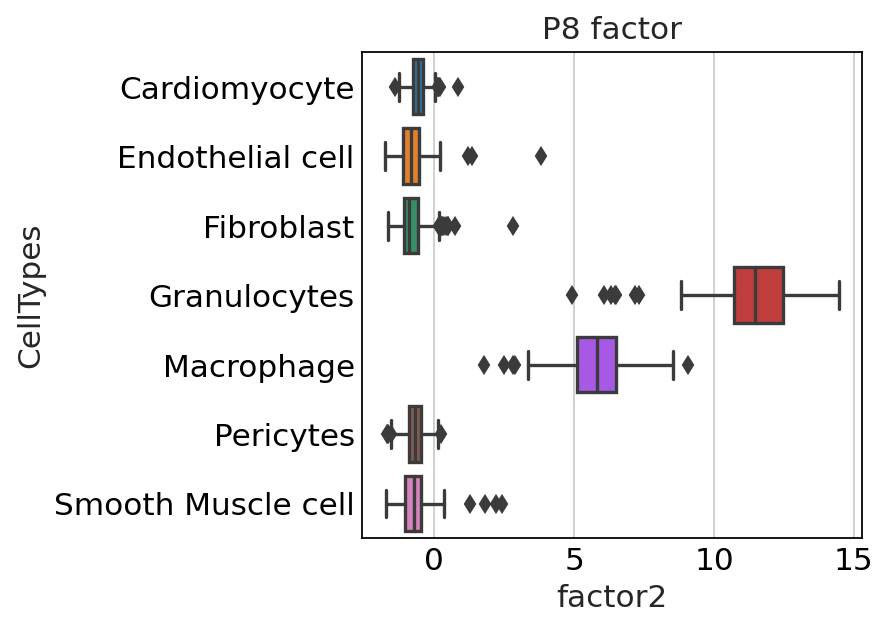

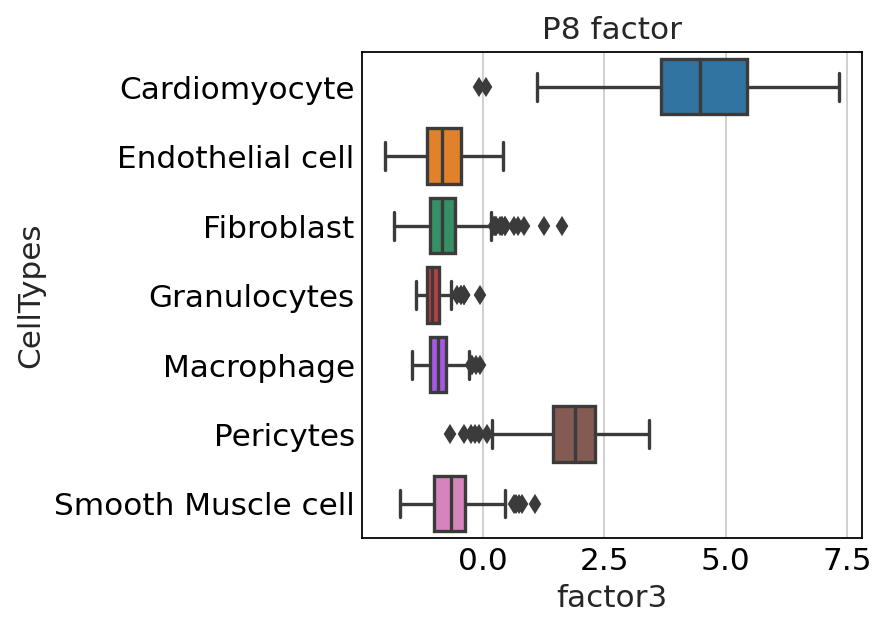

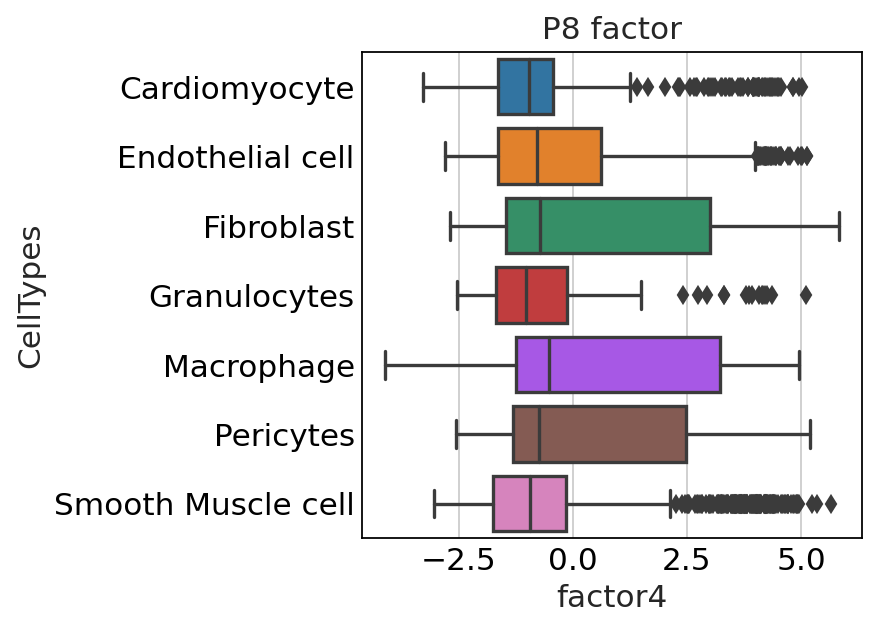

In [ ]:
for i in [1,2,3,4]:
  sns.boxplot(y='CellTypes',x='factor'+str(i),data=scRNA_seq_P8.obs)
  plt.title('P8 factor')
  plt.savefig("p8_factor{0}.png".format(str(i)),dpi=300,bbox_inches = 'tight')
  plt.show()

# Card_Per ALL

## MOFA Card_Per

In [ ]:
!pip install scanpy
!pip install mofapy2
from mofapy2.run.entry_point import entry_point
import anndata
import networkx as nx
import scanpy as sc
#import scglue
from matplotlib import rcParams
import pandas as pd
import numpy as np

  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 385, in run
    conflicts = self._determine_conflicts(to_install)
  Fi

In [ ]:
!pip install matplotlib==3.5
!pip install scglue
!pip install scanpy
import matplotlib
import scanpy

  Using cached matplotlib-3.5.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pyparsing.py", line 4781, in parseImpl
    return super(ZeroOrMore, self).parseImpl(instring, loc, doActions)
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pyparsing.py", line 4697, in parseImpl
    loc, tokens = self_expr_parse(instring, loc, doActions, callPreParse=False)
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pyparsing.py", line 1683, in _p

In [ ]:
scRNA_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_seq_MOFA_normalized.h5ad")
scATAC_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_MOFA_normalized.h5ad")
scEnhancer = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Enhancer_normalized.h5ad")
scPromoter = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Promoter_normalized.h5ad")

KeyboardInterrupt: ignored

In [ ]:
!pip install leidenalg
sc.pp.neighbors(scRNA_seq, n_neighbors=20, n_pcs=40)
sc.tl.leiden(scRNA_seq)
sc.tl.paga(scRNA_seq)
sc.pl.paga(scRNA_seq, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(scRNA_seq, init_pos='paga')
sc.pl.umap(scRNA_seq, color=['CellTypes']) 

In [ ]:
scRNA_seq_Card_index = scRNA_seq.obs[scRNA_seq.obs['CellTypes'].str.contains('Card')]
scRNA_seq_Per_index = scRNA_seq.obs[scRNA_seq.obs['CellTypes'].str.contains('Per')]
scRNA_seq_Card_Per_index = pd.concat([scRNA_seq_Card_index,scRNA_seq_Per_index],axis=0)
scRNA_seq_Card_Per = scRNA_seq[scRNA_seq_Card_Per_index.index,:]
scRNA_seq_Card_Per

scATAC_seq_Card_index = scATAC_seq.obs[scATAC_seq.obs['CellTypes'].str.contains('Card')]
scATAC_seq_Per_index = scATAC_seq.obs[scATAC_seq.obs['CellTypes'].str.contains('Per')]
scATAC_seq_Card_Per_index = pd.concat([scATAC_seq_Card_index,scATAC_seq_Per_index],axis=0)
scATAC_seq_Card_Per = scATAC_seq[scATAC_seq_Card_Per_index.index,:]
scATAC_seq_Card_Per

scEnhancer_Card_Per = scEnhancer[scATAC_seq_Card_Per_index.index,:]
scPromoter_Card_Per = scPromoter[scATAC_seq_Card_Per_index.index,:]

In [ ]:
scRNA_seq_Card_Per_P1 = scRNA_seq_Card_Per[scRNA_seq_Card_Per.obs[scRNA_seq_Card_Per.obs['Type'].str.contains('P1')].index,:]
scATAC_seq_Card_Per_P1 = scATAC_seq_Card_Per[scATAC_seq_Card_Per.obs[scATAC_seq_Card_Per.obs['Type'].str.contains('P1')].index,:]
scEnhancer_Card_Per_P1 = scEnhancer_Card_Per[scEnhancer_Card_Per.obs[scEnhancer_Card_Per.obs['Type'].str.contains('P1')].index,:]
scPromoter_Card_Per_P1 = scPromoter_Card_Per[scPromoter_Card_Per.obs[scPromoter_Card_Per.obs['Type'].str.contains('P1')].index,:]

In [ ]:
rna_MOFA = scRNA_seq_Card_Per_P1
Enhancer_MOFA = scEnhancer_Card_Per_P1
Promoter_MOFA = scPromoter_Card_Per_P1

In [ ]:
rna_MOFA_meta=rna_MOFA.obs.copy()
rna_MOFA_meta['CellTypes']=[i.split('-')[0] for i in rna_MOFA_meta['CellTypes']]
rna_MOFA_meta.set_index(Promoter_MOFA.obs.index,inplace=True)
rna_MOFA_meta.index.name='sample'
rna_MOFA_meta.to_csv('MOFA_Card_Per_P1.csv')
rna_MOFA_meta.head()

In [ ]:
# initialise the entry point
# MOFA参数设置
ent1 = entry_point()
ent1.set_data_options(
    scale_groups = False, 
    scale_views = False,
    center_groups=True,
)
# 构建组学层
data_mat=[[None for g in range(1)] for m in range(3)]
data_mat[0][0]=np.array(rna_MOFA.X.todense())
data_mat[1][0]=np.array(Enhancer_MOFA.X.todense())
data_mat[2][0]=np.array(Promoter_MOFA.X.todense())
# MOFA-Enhancer,Gene_Activity_ASC数据预处理，防止feature_names重复
Enhancer_MOFA_All=[]
for i in scEnhancer_Card_Per_P1.var_names:
  Enhancer_MOFA_All.append('Enhancer_'+i)
Enhancer_MOFA_All

Promoter_MOFA_All=[]
for i in scPromoter_Card_Per_P1.var_names:
  Promoter_MOFA_All.append('Promoter_'+i)
Promoter_MOFA_All

# MOFA数据导入
ent1.set_data_matrix(data_mat, likelihoods = ["gaussian","gaussian","gaussian"],
          views_names=['RNA','Enhancer','Promoter'],
          samples_names=[Promoter_MOFA.obs.index],
          features_names=[rna_MOFA.var_names,
                  Enhancer_MOFA_All,
                  Promoter_MOFA_All])
# 模型参数设置
ent1.set_model_options(
    factors = 5, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)
ent1.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = True, 
    verbose = False, 
    seed = 1
)
# 模型运行并保存
ent1.build()

ent1.run()

# Save the output
ent1.save(outfile='MOFA_Card_Per_P1.hdf5')
!cp MOFA_Card_Per_P1.hdf5 /content/drive/MyDrive/MI

In [ ]:
scRNA_seq_Card_Per_P8 = scRNA_seq_Card_Per[scRNA_seq_Card_Per.obs[scRNA_seq_Card_Per.obs['Type'].str.contains('P8')].index,:]
scATAC_seq_Card_Per_P8 = scATAC_seq_Card_Per[scATAC_seq_Card_Per.obs[scATAC_seq_Card_Per.obs['Type'].str.contains('P8')].index,:]
scEnhancer_Card_Per_P8 = scEnhancer_Card_Per[scEnhancer_Card_Per.obs[scEnhancer_Card_Per.obs['Type'].str.contains('P8')].index,:]
scPromoter_Card_Per_P8 = scPromoter_Card_Per[scPromoter_Card_Per.obs[scPromoter_Card_Per.obs['Type'].str.contains('P8')].index,:]

In [ ]:
rna_MOFA = scRNA_seq_Card_Per_P8
Enhancer_MOFA = scEnhancer_Card_Per_P8
Promoter_MOFA = scPromoter_Card_Per_P8

In [ ]:
rna_MOFA_meta=rna_MOFA.obs.copy()
rna_MOFA_meta['CellTypes']=[i.split('-')[0] for i in rna_MOFA_meta['CellTypes']]
rna_MOFA_meta.set_index(Promoter_MOFA.obs.index,inplace=True)
rna_MOFA_meta.index.name='sample'
rna_MOFA_meta.to_csv('MOFA_Card_Per_P8.csv')
rna_MOFA_meta.head()

In [ ]:
# initialise the entry point
# MOFA参数设置
ent1 = entry_point()
ent1.set_data_options(
    scale_groups = False, 
    scale_views = False,
    center_groups=True,
)
# 构建组学层
data_mat=[[None for g in range(1)] for m in range(3)]
data_mat[0][0]=np.array(rna_MOFA.X.todense())
data_mat[1][0]=np.array(Enhancer_MOFA.X.todense())
data_mat[2][0]=np.array(Promoter_MOFA.X.todense())
# MOFA-Enhancer,Gene_Activity_ASC数据预处理，防止feature_names重复
Enhancer_MOFA_All=[]
for i in scEnhancer_Card_Per_P8.var_names:
  Enhancer_MOFA_All.append('Enhancer_'+i)
Enhancer_MOFA_All

Promoter_MOFA_All=[]
for i in scPromoter_Card_Per_P8.var_names:
  Promoter_MOFA_All.append('Promoter_'+i)
Promoter_MOFA_All

# MOFA数据导入
ent1.set_data_matrix(data_mat, likelihoods = ["gaussian","gaussian","gaussian"],
          views_names=['RNA','Enhancer','Promoter'],
          samples_names=[Promoter_MOFA.obs.index],
          features_names=[rna_MOFA.var_names,
                  Enhancer_MOFA_All,
                  Promoter_MOFA_All])
# 模型参数设置
ent1.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)
ent1.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = True, 
    verbose = False, 
    seed = 1
)
# 模型运行并保存
ent1.build()

ent1.run()

# Save the output
ent1.save(outfile='MOFA_Card_Per_P8.hdf5')
!cp MOFA_Card_Per_P8.hdf5 /content/drive/MyDrive/MI

In [ ]:
sample_metadata <- fread('MOFA_Card_Per_P1.csv')#注意第一列细胞的标头要写为sample
model <- load_model("MOFA_Card_Per_P1.hdf5")
samples_metadata(model) <- sample_metadata

In [ ]:
plot_variance_explained(model, max_r2=15)
variance_explained=model@cache[["variance_explained"]][["r2_per_factor"]][["group0"]]
write.table(variance_explained,file='variance_explained_Card_Per_P1.csv',sep=',',row.names =FALSE)

In [ ]:
p=correlate_factors_with_covariates(model, covariates = c("CellTypes","Type"), plot="log_pval",return_data=TRUE)
write.table(p,file='correlate_factors_Card_Per_P1.csv',sep=',')

## MOFA Card_Per_P1 processs

In [ ]:
import h5py
import pandas as pd
import numpy as np

In [ ]:
def normalization(data):
    _range = np.max(abs(data))
    return data / _range

In [ ]:
def get_weights(f,view,factor,scale=True):
  view_names=f['views']['views'][:]
  group_names=f['groups']['groups'][:]
  feature_names=np.array([f['features'][i][:] for i in view_names])
  sample_names=np.array([f['samples'][i][:] for i in group_names])
  f_name=feature_names[np.where(view_names==str.encode(view))[0][0]]
  f_w=f['expectations']['W'][view][factor-1]
  if scale==True:
    f_w=normalization(f_w)
  res=pd.DataFrame()
  res['feature']=f_name
  res['weights']=f_w
  res['abs_weights']=abs(f_w)
  res['sig']='+'
  res.loc[(res.weights<0),'sig'] = '-'

  return res

In [ ]:
f_Card_Per_P1 = h5py.File('/content/MOFA_Card_Per_P1.hdf5','r')   #打开h5文件
# 可以查看所有的主键
for key in f_Card_Per_P1.keys():
    print(f_Card_Per_P1[key].name)

In [ ]:
for i in range(f_Card_Per_P1['expectations']['Z']['group0'].shape[0]):
  scRNA_seq_Card_Per_P1.obs['factor{0}'.format(i+1)]=f_Card_Per_P1['expectations']['Z']['group0'][i]

In [ ]:
scnmt=['#f2535d','#a2e8c4','#e5e24f','#6aafda','#c76fc7','#c4425d','#f48a3d','black','grey']
sc.settings.set_figure_params(dpi=80,figsize=[4,4])
sc.pl.umap(scRNA_seq_Card_Per_P1,
      color=["CellTypes"], 
      add_outline=False, 
      legend_loc='right margin', 
      legend_fontsize=12, 
      legend_fontoutline=1,
      frameon=False, palette=scnmt,
      )

In [ ]:
variance=pd.read_csv('/content/drive/MyDrive/MI/MOFA/variance_explained_Card_Per_P1.csv')
corr=pd.read_csv('/content/drive/MyDrive/MI/MOFA/correlate_factors_Card_Per_P1.csv')
variance.index=corr.index
variance

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2,4))         # Sample figsize in inches
new_blues=sns.color_palette("Greens", 1000)[0:700]
g=sns.heatmap(variance,
      cmap=new_blues,vmax=10,
      linewidths=.5,annot_kws={"size": 12},ax=ax
      )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('Card_Per_P1 Var')
plt.savefig("Card_Per_P1.png",dpi=300,bbox_inches = 'tight')

In [ ]:
fig, ax = plt.subplots(figsize=(2,4))         # Sample figsize in inches
new_reds=sns.color_palette("Reds", 1000)[0:700]
g=sns.heatmap(corr,
      cmap=new_reds, vmax=100,
      linewidths=.5,annot_kws={"size": 12},ax=ax,
      )

g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('Card_Per_P1 cor')
plt.savefig("Card_Per_P1_cor.png",dpi=300,bbox_inches = 'tight')

In [ ]:
plot_data=scRNA_seq_Card_Per_P1.obs
plot_data.head()

In [ ]:
from scipy.stats import ttest_1samp
from scipy import stats

In [ ]:
cell_t=list(set(plot_data['CellTypes']))
cell_pd=pd.DataFrame(index=cell_t)

for i in [1,2,3]:
  test=[]
  for j in cell_t:
    a=plot_data[plot_data['CellTypes']==j]['factor'+str(i)].values
    b=plot_data[~(plot_data['CellTypes']==j)]['factor'+str(i)].values
    t, p = stats.ttest_ind(a,b)
    logp=-np.log(p)
    if(logp>500):
      logp=500
    test.append(logp)
  cell_pd['factor'+str(i)]=test
cell_pd

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))         # Sample figsize in inches
new_blues=sns.color_palette("Reds", 1000)[0:700]
g=sns.heatmap(cell_pd,
      cmap=new_blues,vmax=500,
      linewidths=.5,annot_kws={"size": 12},ax=ax
      )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('P8 Test -log(P-value)')
plt.savefig("p8_cor_cell.png",dpi=300,bbox_inches = 'tight')

In [ ]:
for i in [1,2,3]:
  sns.boxplot(y='CellTypes',x='factor'+str(i),data=scRNA_seq_Card_Per_P1.obs)
  plt.title('Card_Per_P1 factor')
  plt.savefig("Card_Per_P1_factor{0}.png".format(str(i)),dpi=300,bbox_inches = 'tight')
  plt.show()  

## MOFA Card_Per_P8 processs

In [ ]:
import h5py
import pandas as pd
import numpy as np

In [ ]:
def normalization(data):
    _range = np.max(abs(data))
    return data / _range

In [ ]:
def get_weights(f,view,factor,scale=True):
  view_names=f['views']['views'][:]
  group_names=f['groups']['groups'][:]
  feature_names=np.array([f['features'][i][:] for i in view_names])
  sample_names=np.array([f['samples'][i][:] for i in group_names])
  f_name=feature_names[np.where(view_names==str.encode(view))[0][0]]
  f_w=f['expectations']['W'][view][factor-1]
  if scale==True:
    f_w=normalization(f_w)
  res=pd.DataFrame()
  res['feature']=f_name
  res['weights']=f_w
  res['abs_weights']=abs(f_w)
  res['sig']='+'
  res.loc[(res.weights<0),'sig'] = '-'

  return res

In [ ]:
f_Card_Per_P8 = h5py.File('/content/drive/MyDrive/MI/MOFA_Card_Per_P8.hdf5','r')   #打开h5文件
# 可以查看所有的主键
for key in f_Card_Per_P8.keys():
    print(f_Card_Per_P8[key].name)

In [ ]:
for i in range(f_Card_Per_P8['expectations']['Z']['group0'].shape[0]):
  scRNA_seq_Card_Per_P8.obs['factor{0}'.format(i+1)]=f_Card_Per_P8['expectations']['Z']['group0'][i]

In [ ]:
scnmt=['#f2535d','#a2e8c4','#e5e24f','#6aafda','#c76fc7','#c4425d','#f48a3d','black','grey']
sc.settings.set_figure_params(dpi=80,figsize=[4,4])
sc.pl.umap(scRNA_seq_Card_Per_P8,
      color=["CellTypes"], 
      add_outline=False, 
      legend_loc='right margin', 
      legend_fontsize=12, 
      legend_fontoutline=1,
      frameon=False, palette=scnmt,
      )

In [ ]:
variance=pd.read_csv('/content/drive/MyDrive/MI/MOFA/variance_explained_Card_Per_P8.csv')
corr=pd.read_csv('/content/drive/MyDrive/MI/MOFA/correlate_factors_Card_Per_P8.csv')
variance.index=corr.index
variance

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2,4))         # Sample figsize in inches
new_blues=sns.color_palette("Greens", 1000)[0:700]
g=sns.heatmap(variance,
      cmap=new_blues,vmax=10,
      linewidths=.5,annot_kws={"size": 12},ax=ax
      )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('Card_Per_P8 Var')
plt.savefig("Card_Per_P8.png",dpi=300,bbox_inches = 'tight')

In [ ]:
fig, ax = plt.subplots(figsize=(2,4))         # Sample figsize in inches
new_reds=sns.color_palette("Reds", 1000)[0:700]
g=sns.heatmap(corr,
      cmap=new_reds, vmax=100,
      linewidths=.5,annot_kws={"size": 12},ax=ax,
      )

g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('Card_Per_P8 cor')
plt.savefig("Card_Per_P8_cor.png",dpi=300,bbox_inches = 'tight')

In [ ]:
plot_data=scRNA_seq_Card_Per_P8.obs
plot_data.head()

In [ ]:
from scipy.stats import ttest_1samp
from scipy import stats

In [ ]:
cell_t=list(set(plot_data['CellTypes']))
cell_pd=pd.DataFrame(index=cell_t)

for i in [1,2,3,4,5,6,7,8,9,10]:
  test=[]
  for j in cell_t:
    a=plot_data[plot_data['CellTypes']==j]['factor'+str(i)].values
    b=plot_data[~(plot_data['CellTypes']==j)]['factor'+str(i)].values
    t, p = stats.ttest_ind(a,b)
    logp=-np.log(p)
    if(logp>500):
      logp=500
    test.append(logp)
  cell_pd['factor'+str(i)]=test
cell_pd

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))         # Sample figsize in inches
new_blues=sns.color_palette("Reds", 1000)[0:700]
g=sns.heatmap(cell_pd,
      cmap=new_blues,vmax=500,
      linewidths=.5,annot_kws={"size": 12},ax=ax
      )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('P8 Test -log(P-value)')
plt.savefig("p8_cor_cell.png",dpi=300,bbox_inches = 'tight')

In [ ]:
for i in [1,2,3,4,5]:
  sns.boxplot(y='CellTypes',x='factor'+str(i),data=scRNA_seq_Card_Per_P8.obs)
  plt.title('Card_Per_P8 factor')
  plt.savefig("Card_Per_P8_factor{0}.png".format(str(i)),dpi=300,bbox_inches = 'tight')
  plt.show()  

## Cardiomyocyte

In [ ]:
from matplotlib_venn import venn2,venn2_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline

In [ ]:
Card_Per_RNA_factor1_P1=get_weights(f_Card_Per_P1,'RNA',1)
xl=[]
for i in Card_Per_RNA_factor1_P1['feature'].values:
  xl.append(bytes.decode(i).replace('Mutation',''))
Card_Per_RNA_factor1_P1['feature']=xl
Card_Per_RNA_factor1_P1=Card_Per_RNA_factor1_P1.sort_values('weights',ascending=False)
Card_Per_RNA_factor1_P1.head(10)

In [ ]:
Card_Per_RNA_factor1_P8=get_weights(f_Card_Per_P8,'RNA',1)
xl=[]
for i in Card_Per_RNA_factor1_P8['feature'].values:
  xl.append(bytes.decode(i).replace('Mutation',''))
Card_Per_RNA_factor1_P8['feature']=xl
Card_Per_RNA_factor1_P8=Card_Per_RNA_factor1_P8.sort_values('weights',ascending=False)
Card_Per_RNA_factor1_P8.head(10)

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))         # Sample figsize in inches

pos_f=Card_Per_RNA_factor1_P1.loc[Card_Per_RNA_factor1_P1['weights']>0.5,'feature']
neg_f=Card_Per_RNA_factor1_P8.loc[Card_Per_RNA_factor1_P8['weights']>0.5,'feature']


venn2_circles(subsets=[set(pos_f),set(neg_f)],
        linestyle='--', linewidth=2, color="black",#外框线型、线宽、颜色
        normalize_to=1.0,
       )
v=venn2(subsets=[set(pos_f),set(neg_f)],
      set_labels=('P1','P8'),
      set_colors=("#f2535d","#a2ebc4"),
       normalize_to=1.0,)
ret=list(set(neg_f) & (set(pos_f))) 
#plt.annotate(str(ret).replace('flag1','\n').replace("'",'').replace('[','').replace(']',''), xy=v.get_label_by_id('11').get_position() - np.array([0, 0.05]), xytext=(0,-100),
#             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
#             arrowprops=dict(arrowstyle='->', color='gray'),size=12)

#ret=list(set(pos_f).difference(set(neg_f))) 
#plot_str=str(ret).replace("'",'').replace('[','').replace(']','')
#print(plot_str)
#plt.annotate(plot_str, xy=v.get_label_by_id('10').get_position() - np.array([0, 0.05]), xytext=(0,100),
#             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
#             arrowprops=dict(arrowstyle='->', color='gray'),size=12)

#ret=list(set(neg_f).difference(set(pos_f)))
#plot_str=str(ret).replace("'",'').replace('[','').replace(']','')
#print(ret)
#plt.annotate(plot_str, xy=v.get_label_by_id('01').get_position() - np.array([0, 0.05]), xytext=(0,70),
#             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
#             arrowprops=dict(arrowstyle='->', color='gray'),size=12)
#v.get_label_by_id('10').set_fontsize(15)#1的大小设置为20
#v.get_label_by_id('01').set_fontsize(15)#1的大小设置为20
#v.get_label_by_id('11').set_fontsize(15)#1的大小设置为20
for t in v.set_labels: 
    t.set_fontsize(12) 
plt.title('Cardiomyocyte')
plt.savefig("Cardiomyocyte_venn.png",dpi=300,bbox_inches = 'tight')

In [ ]:
def get_viodata(res_ad,res_ctrl,cell_type,genelist):
  vio_data=pd.DataFrame()
  print(len(res_ad[res_ad.obs['CellTypes']==cell_type].X.T[0].A[0]),len(res_ctrl[res_ctrl.obs['CellTypes']==cell_type].X.T[0].A[0]))
  for i in genelist:
    test_1=pd.DataFrame()
    test_1['value']=res_ad[res_ad.obs['CellTypes']==cell_type][:,i].X.T[0].A[0]
    test_1['gene']=[i for i in [i]*len(test_1)]
    test_1['type']=[i for i in ['POS']*len(test_1)]
    test_2=pd.DataFrame()
    test_2['value']=res_ctrl[res_ctrl.obs['CellTypes']==cell_type][:,i].X.T[0].A[0]
    test_2['gene']=[i for i in [i]*len(test_2)]
    test_2['type']=[i for i in ['NEG']*len(test_2)]
  
    vio_data=pd.concat([vio_data,test_1],ignore_index=True)
    vio_data=pd.concat([vio_data,test_2],ignore_index=True)
  return vio_data

In [ ]:
ret=list(set(neg_f) & (set(pos_f))) 
ret

In [ ]:
def pltx(x1,x2,y1,y2,sig,min_x=0):
    x=np.ones((2))*x1
    y = np.arange(y1,y2,y2-y1-0.0001)
    plt.plot(x,y,label="$y$",color="black",linewidth=1)
    x=np.ones((2))*x2
    y = np.arange(y1,y2,y2-y1-0.0001)
    plt.plot(x,y,label="$y$",color="black",linewidth=1)
    x = np.arange(x1,x2+0.0001,x2-x1)
    y = y2+0*x
    plt.plot(x,y,label="$y$",color="black",linewidth=1)
    x0 = (x1+x2)/2
    y0=y2
    plt.annotate(r'%s'%sig, xy=(x0, y0), xycoords='data', xytext=(0, +1),
                     textcoords='offset points', fontsize=15,color="black")
    if(min_x!=0):
        plt.ylim(min_x,y2+y2/10)

In [ ]:
pos_f=Card_Per_RNA_factor1_P1.loc[Card_Per_RNA_factor1_P1['weights']>0.841,'feature']
neg_f=Card_Per_RNA_factor1_P8.loc[Card_Per_RNA_factor1_P8['weights']>0.6,'feature']

In [ ]:
ret=list(set(neg_f).difference(set(pos_f))) 
ret=list(set(pos_f).difference(set(neg_f)))
#ret=list(set(neg_f) & (set(pos_f))) 
plot_data1=get_viodata(scRNA_seq_Card_Per_P1,scRNA_seq_Card_Per_P8,'Cardiomyocyte',ret)
plot_data1
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x="gene", y="value", hue='type',data=plot_data1, 
        palette=["#f2535d","#a2ebc4"],ax=ax,
        #saturation=1
        )

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        line.set_linewidth(3)

# Also fix the legend
for legpatch in ax.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

sns.stripplot(x="gene", y="value", hue='type',data=plot_data1, 
        palette=["#f2535d","#a2ebc4"],ax=ax,
        split=True, jitter=0.2, 
        )

k=0
for i in ret:
  
  ttest = stats.ttest_ind(plot_data1.loc[(plot_data1['gene']==i)&(plot_data1['type']=='POS')]['value'].values, 
                          plot_data1.loc[(plot_data1['gene']==i)&(plot_data1['type']=='NEG')]['value'].values)
  #max=ty[ty['if']==dyt[i]]['value'].max()
  print(ttest)
  if(ttest[1]<0.001):
      xing="***"   
  elif(ttest[1]<0.01):
      xing="**"
  elif(ttest[1]<0.06):
      xing="*"
  else:
      xing=' '
  print(ttest[1],xing)
  if xing!=' ':
    pltx(k-0.2,k+0.2,5,6,xing,0)
  k+=1
plt.legend([],[])
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 15,rotation=45, horizontalalignment='right',)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
#plt.title('Neg Test -log(P-value)')
plt.title('Cardiomyocyte P1')
plt.ylabel('log2(Counts)')
plt.savefig("Cardiomyocyte_P1_gene.png",dpi=300,bbox_inches = 'tight')

In [ ]:
ret=list(set(neg_f).difference(set(pos_f))) 
#ret=list(set(pos_f).difference(set(neg_f)))
#ret=list(set(neg_f) & (set(pos_f))) 
plot_data1=get_viodata(scRNA_seq_Card_Per_P1,scRNA_seq_Card_Per_P8,'Cardiomyocyte',ret)
plot_data1
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x="gene", y="value", hue='type',data=plot_data1, 
        palette=["#f2535d","#a2ebc4"],ax=ax,
        #saturation=1
        )

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        line.set_linewidth(3)

# Also fix the legend
for legpatch in ax.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

sns.stripplot(x="gene", y="value", hue='type',data=plot_data1, 
        palette=["#f2535d","#a2ebc4"],ax=ax,
        split=True, jitter=0.2, 
        )

k=0
for i in ret:
  
  ttest = stats.ttest_ind(plot_data1.loc[(plot_data1['gene']==i)&(plot_data1['type']=='POS')]['value'].values, 
                          plot_data1.loc[(plot_data1['gene']==i)&(plot_data1['type']=='NEG')]['value'].values)
  #max=ty[ty['if']==dyt[i]]['value'].max()
  print(ttest)
  if(ttest[1]<0.001):
      xing="***"   
  elif(ttest[1]<0.01):
      xing="**"
  elif(ttest[1]<0.06):
      xing="*"
  else:
      xing=' '
  print(ttest[1],xing)
  if xing!=' ':
    pltx(k-0.2,k+0.2,5,6,xing,0)
  k+=1
plt.legend([],[])
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 15,rotation=45, horizontalalignment='right',)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
#plt.title('Neg Test -log(P-value)')
plt.title('Cardiomyocyte P8')
plt.ylabel('log2(Counts)')
plt.savefig("Cardiomyocyte_P8_gene.png",dpi=300,bbox_inches = 'tight')

# Endothelial_Cell_Smooth_Muscle_Cell ALL

## MOFA Endothelial_Cell_Smooth_Muscle_Cell(End_Smo)

In [ ]:
!pip install scanpy
!pip install mofapy2
from mofapy2.run.entry_point import entry_point
import anndata
import networkx as nx
import scanpy as sc
#import scglue
from matplotlib import rcParams
import pandas as pd
import numpy as np

  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
!pip install matplotlib==3.5
!pip install scglue
!pip install scanpy
import matplotlib
import scanpy

  Using cached matplotlib-3.5.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pair = pd.read_csv('/content/drive/MyDrive/MI/new_pair.csv')
pair.drop(['Unnamed: 0'],axis=1,inplace=True)
pair.head()

,scRNA,scATAC,sample
0,P1_3MI_AAACCTGGTAGCGATG-1,GCCCAGATCGTGGGTC-1,cell_0
1,P1_3MI_AAACCTGGTTCGCGAC-1,CTCGCTAGTCAGCAAG-1,cell_1
2,P1_3MI_AAACCTGTCGTAGATC-1,CAGTGCGGTTTGGATC-1,cell_2
3,P1_3MI_AAACCTGTCTTGTTTG-1,CCGAAGCTCTTCAGAG-1,cell_3
4,P1_3MI_AAACGGGCAAGCTGGA-1,AGCTGATGTGCAAGCA-1,cell_4


In [ ]:
scRNA_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_seq_MOFA_normalized.h5ad")
scATAC_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_MOFA_normalized.h5ad")
scEnhancer = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Enhancer_normalized.h5ad")
scPromoter = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Promoter_normalized.h5ad")

In [ ]:
pair['CellTypes']=''
pair['CellTypes']= scRNA_seq.obs.loc[pair['scRNA'].values,'CellTypes'].values
pair.index = pair['scATAC'].values
pair

,scRNA,scATAC,sample,CellTypes
GCCCAGATCGTGGGTC-1,P1_3MI_AAACCTGGTAGCGATG-1,GCCCAGATCGTGGGTC-1,cell_0,Endothelial cell
CTCGCTAGTCAGCAAG-1,P1_3MI_AAACCTGGTTCGCGAC-1,CTCGCTAGTCAGCAAG-1,cell_1,Endothelial cell
CAGTGCGGTTTGGATC-1,P1_3MI_AAACCTGTCGTAGATC-1,CAGTGCGGTTTGGATC-1,cell_2,Fibroblast
CCGAAGCTCTTCAGAG-1,P1_3MI_AAACCTGTCTTGTTTG-1,CCGAAGCTCTTCAGAG-1,cell_3,Fibroblast
AGCTGATGTGCAAGCA-1,P1_3MI_AAACGGGCAAGCTGGA-1,AGCTGATGTGCAAGCA-1,cell_4,Endothelial cell
...,...,...,...,...
AAACTCGAGGGATCCA-4,P8_3Sham_TGTTCCGCACACTGCG-1,AAACTCGAGGGATCCA-4,cell_1297,Smooth Muscle cell
AGATTCGAGTATACCC-4,P8_3Sham_CAGGTGCTCATGCATG-1,AGATTCGAGTATACCC-4,cell_1298,Fibroblast
TCTAGTTAGACCATAA-4,P8_3Sham_CGTGAGCCATGGTTGT-1,TCTAGTTAGACCATAA-4,cell_1299,Smooth Muscle cell
GTCACGGTCACAAGCT-4,P8_3Sham_GTAGGCCCATCTCCCA-1,GTCACGGTCACAAGCT-4,cell_1300,Fibroblast


In [ ]:
scATAC_seq.obs['CellTypes']=pair.loc[scATAC_seq.obs.index.values,'CellTypes'].values
scATAC_seq.obs

,Type,Stem_Cell_Property,Myocardial_infarction,nb_features,log_nb_features,delli,sample,CellTypes,domain,CellType
AAACGAAAGGATGTCG-1,P1+3 dpi,pos,MI,13472.0,3.757851,tr,cell_0,Endothelial cell,scATAC-seq,
AAACGAAAGTAACTCC-1,P1+3 dpi,pos,MI,9145.0,3.623559,tr,cell_1,Cardiomyocyte,scATAC-seq,
AAACGAACACTTACAG-1,P1+3 dpi,pos,MI,20611.0,3.949488,tr,cell_2,Macrophage,scATAC-seq,Fibroblast
AAACGAACATATACGC-1,P1+3 dpi,pos,MI,16051.0,3.860937,tr,cell_3,Macrophage,scATAC-seq,Fibroblast
AAACGAAGTATTCTGG-1,P1+3 dpi,pos,MI,11284.0,3.724194,tr,cell_4,Endothelial cell,scATAC-seq,
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTCGCGTT-4,P8+3 dps,neg,Sham,10525.0,3.652633,tr,cell_9202,Smooth Muscle cell,scATAC-seq,
TTTGGTTTCTTACGGA-4,P8+3 dps,neg,Sham,5865.0,3.427648,tr,cell_9203,Smooth Muscle cell,scATAC-seq,
TTTGTGTCAAGGCGTA-4,P8+3 dps,neg,Sham,1207.0,2.772322,tr,cell_9204,Smooth Muscle cell,scATAC-seq,
TTTGTGTCAATCACTG-4,P8+3 dps,neg,Sham,8727.0,3.595827,tr,cell_9205,Pericytes,scATAC-seq,


In [ ]:
scRNA_seq_End_index = scRNA_seq.obs[scRNA_seq.obs['CellTypes'].str.contains('End')]
scRNA_seq_Smo_index = scRNA_seq.obs[scRNA_seq.obs['CellTypes'].str.contains('Smo')]
scRNA_seq_End_Smo_index = pd.concat([scRNA_seq_End_index,scRNA_seq_Smo_index],axis=0)
scRNA_seq_End_Smo = scRNA_seq[scRNA_seq_End_Smo_index.index,:]

scATAC_seq_End_index = scATAC_seq.obs[scATAC_seq.obs['CellTypes'].str.contains('End')]
scATAC_seq_Smo_index = scATAC_seq.obs[scATAC_seq.obs['CellTypes'].str.contains('Smo')]
scATAC_seq_End_Smo_index = pd.concat([scATAC_seq_End_index,scATAC_seq_Smo_index],axis=0)
scATAC_seq_End_Smo = scATAC_seq[scATAC_seq_End_Smo_index.index,:]
scATAC_seq_End_Smo

scEnhancer_End_Smo = scEnhancer[scATAC_seq_End_Smo_index.index,:]
scPromoter_End_Smo = scPromoter[scATAC_seq_End_Smo_index.index,:]

In [ ]:
scRNA_seq_End_Smo_P1 = scRNA_seq_End_Smo[scRNA_seq_End_Smo.obs[scRNA_seq_End_Smo.obs['Type'].str.contains('P1')].index,:]
scATAC_seq_End_Smo_P1 = scATAC_seq_End_Smo[scATAC_seq_End_Smo.obs[scATAC_seq_End_Smo.obs['Type'].str.contains('P1')].index,:]
scEnhancer_End_Smo_P1 = scEnhancer_End_Smo[scEnhancer_End_Smo.obs[scEnhancer_End_Smo.obs['Type'].str.contains('P1')].index,:]
scPromoter_End_Smo_P1 = scPromoter_End_Smo[scPromoter_End_Smo.obs[scPromoter_End_Smo.obs['Type'].str.contains('P1')].index,:]

In [ ]:
rna_MOFA = scRNA_seq_End_Smo_P1
Enhancer_MOFA = scEnhancer_End_Smo_P1
Promoter_MOFA = scPromoter_End_Smo_P1

In [ ]:
rna_MOFA_meta=rna_MOFA.obs.copy()
rna_MOFA_meta['CellTypes']=[i.split('-')[0] for i in rna_MOFA_meta['CellTypes']]
rna_MOFA_meta.set_index(Promoter_MOFA.obs.index,inplace=True)
rna_MOFA_meta.index.name='sample'
rna_MOFA_meta.to_csv('MOFA_End_Smo_P1.csv')
rna_MOFA_meta.head()

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,domain,leiden_anno,CellTypes,delli,sample,CellType
sample,,,,,,,,,,,,,,,,
AAACGAAAGGATGTCG-1,pos,MI,3days,P1+3 dpi,1902,1902,5401.0,0.0,0.0,5,scRNA-seq,Endothelial cell,Endothelial cell,tr,cell_0,Endothelial cell
AAACGAAGTATTCTGG-1,pos,MI,3days,P1+3 dpi,3560,3560,13569.0,0.0,0.0,8,scRNA-seq,Endothelial cell-1,Endothelial cell,tr,cell_1,Endothelial cell
AAACTGCAGTGATATG-1,pos,MI,3days,P1+3 dpi,3332,3331,11707.0,0.0,0.0,9,scRNA-seq,Endothelial cell-2,Endothelial cell,tr,cell_4,Endothelial cell
AAACTGCGTGCGACCT-1,pos,MI,3days,P1+3 dpi,1438,1438,3343.0,0.0,0.0,5,scRNA-seq,Endothelial cell,Endothelial cell,tr,cell_6,Endothelial cell
AAAGATGAGTGGTGTG-1,pos,MI,3days,P1+3 dpi,2104,2104,5514.0,0.0,0.0,13,scRNA-seq,Endothelial cell-3,Endothelial cell,tr,cell_10,Endothelial cell


In [ ]:
# initialise the entry point
# MOFA参数设置
ent1 = entry_point()
ent1.set_data_options(
    scale_groups = False, 
    scale_views = False,
    center_groups=True,
)
# 构建组学层
data_mat=[[None for g in range(1)] for m in range(3)]
data_mat[0][0]=np.array(rna_MOFA.X.todense())
data_mat[1][0]=np.array(Enhancer_MOFA.X.todense())
data_mat[2][0]=np.array(Promoter_MOFA.X.todense())
# MOFA-Enhancer,Gene_Activity_ASC数据预处理，防止feature_names重复
Enhancer_MOFA_All=[]
for i in scEnhancer_End_Smo_P1.var_names:
  Enhancer_MOFA_All.append('Enhancer_'+i)
Enhancer_MOFA_All

Promoter_MOFA_All=[]
for i in scPromoter_End_Smo_P1.var_names:
  Promoter_MOFA_All.append('Promoter_'+i)
Promoter_MOFA_All

# MOFA数据导入
ent1.set_data_matrix(data_mat, likelihoods = ["gaussian","gaussian","gaussian"],
          views_names=['RNA','Enhancer','Promoter'],
          samples_names=[Promoter_MOFA.obs.index],
          features_names=[rna_MOFA.var_names,
                  Enhancer_MOFA_All,
                  Promoter_MOFA_All])
# 模型参数设置
ent1.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)
ent1.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = True, 
    verbose = False, 
    seed = 1
)
# 模型运行并保存
ent1.build()

ent1.run()

# Save the output
ent1.save(outfile='MOFA_End_Smo_P1.hdf5')
!cp MOFA_End_Fib_P1.hdf5 /content/drive/MyDrive/MI


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Successfully loaded view='RNA' group='group0' with N=1319 samples and D=3000 features...
Successfully loaded view='Enhancer' group='group0' with N=1319 samples and D=3451 features...
Successfully loaded view='Promoter' group='group0' with N=1319 samples and D=3963 features...




Model opt

OSError: ignored

In [ ]:
scRNA_seq_End_Smo_P8 = scRNA_seq_End_Smo[scRNA_seq_End_Smo.obs[scRNA_seq_End_Smo.obs['Type'].str.contains('P8')].index,:]
scATAC_seq_End_Smo_P8 = scATAC_seq_End_Smo[scATAC_seq_End_Smo.obs[scATAC_seq_End_Smo.obs['Type'].str.contains('P8')].index,:]
scEnhancer_End_Smo_P8 = scEnhancer_End_Smo[scEnhancer_End_Smo.obs[scEnhancer_End_Smo.obs['Type'].str.contains('P8')].index,:]
scPromoter_End_Smo_P8 = scPromoter_End_Smo[scPromoter_End_Smo.obs[scPromoter_End_Smo.obs['Type'].str.contains('P8')].index,:]

In [ ]:
rna_MOFA = scRNA_seq_End_Smo_P8
Enhancer_MOFA = scEnhancer_End_Smo_P8
Promoter_MOFA = scPromoter_End_Smo_P8

In [ ]:
rna_MOFA_meta=rna_MOFA.obs.copy()
rna_MOFA_meta['CellTypes']=[i.split('-')[0] for i in rna_MOFA_meta['CellTypes']]
rna_MOFA_meta.set_index(Promoter_MOFA.obs.index,inplace=True)
rna_MOFA_meta.index.name='sample'
rna_MOFA_meta.to_csv('MOFA_End_Smo_P8.csv')
rna_MOFA_meta.head()

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,domain,leiden_anno,CellTypes,delli,sample,CellType
sample,,,,,,,,,,,,,,,,
AAACGAAAGGTTCGAG-3,neg,MI,3days,P8+3 dpi,3153,3153,8298.0,0.0,0.0,9,scRNA-seq,Endothelial cell-2,Endothelial cell,tr,cell_6237,Endothelial cell
AAACTGCCATAGAATG-3,neg,MI,3days,P8+3 dpi,1655,1655,3300.0,0.0,0.0,8,scRNA-seq,Endothelial cell-1,Endothelial cell,tr,cell_6239,Endothelial cell
AAAGATGGTCGGCTGT-3,neg,MI,3days,P8+3 dpi,3498,3498,10949.0,0.0,0.0,8,scRNA-seq,Endothelial cell-1,Endothelial cell,tr,cell_6240,Endothelial cell
AAATGAGTCTTAGTGG-3,neg,MI,3days,P8+3 dpi,2175,2175,4937.0,0.0,0.0,9,scRNA-seq,Endothelial cell-2,Endothelial cell,tr,cell_6249,Endothelial cell
AACATCGGTAACTCCA-3,neg,MI,3days,P8+3 dpi,2305,2305,6048.0,0.0,0.0,8,scRNA-seq,Endothelial cell-1,Endothelial cell,tr,cell_6251,Endothelial cell


In [ ]:
# initialise the entry point
# MOFA参数设置
ent1 = entry_point()
ent1.set_data_options(
    scale_groups = False, 
    scale_views = False,
    center_groups=True,
)
# 构建组学层
data_mat=[[None for g in range(1)] for m in range(3)]
data_mat[0][0]=np.array(rna_MOFA.X.todense())
data_mat[1][0]=np.array(Enhancer_MOFA.X.todense())
data_mat[2][0]=np.array(Promoter_MOFA.X.todense())
# MOFA-Enhancer,Gene_Activity_ASC数据预处理，防止feature_names重复
Enhancer_MOFA_All=[]
for i in scEnhancer_End_Smo_P8.var_names:
  Enhancer_MOFA_All.append('Enhancer_'+i)
Enhancer_MOFA_All

Promoter_MOFA_All=[]
for i in scPromoter_End_Smo_P8.var_names:
  Promoter_MOFA_All.append('Promoter_'+i)
Promoter_MOFA_All

# MOFA数据导入
ent1.set_data_matrix(data_mat, likelihoods = ["gaussian","gaussian","gaussian"],
          views_names=['RNA','Enhancer','Promoter'],
          samples_names=[Promoter_MOFA.obs.index],
          features_names=[rna_MOFA.var_names,
                  Enhancer_MOFA_All,
                  Promoter_MOFA_All])
# 模型参数设置
ent1.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)
ent1.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = True, 
    verbose = False, 
    seed = 1
)
# 模型运行并保存
ent1.build()

ent1.run()

# Save the output
ent1.save(outfile='MOFA_End_Smo_P8.hdf5')
!cp MOFA_End_Smo_P8.hdf5 /content/drive/MyDrive/MI


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Successfully loaded view='RNA' group='group0' with N=1319 samples and D=3000 features...
Successfully loaded view='Enhancer' group='group0' with N=1319 samples and D=3451 features...
Successfully loaded view='Promoter' group='group0' with N=1319 samples and D=3963 features...




Model opt

In [ ]:
sample_metadata <- fread('MOFA_Card_Per_P1.csv')#注意第一列细胞的标头要写为sample
model <- load_model("MOFA_Card_Per_P1.hdf5")
samples_metadata(model) <- sample_metadata

NameError: ignored

In [ ]:
plot_variance_explained(model, max_r2=15)
variance_explained=model@cache[["variance_explained"]][["r2_per_factor"]][["group0"]]
write.table(variance_explained,file='variance_explained_Card_Per_P1.csv',sep=',',row.names =FALSE)

In [ ]:
p=correlate_factors_with_covariates(model, covariates = c("CellTypes","Type"), plot="log_pval",return_data=TRUE)
write.table(p,file='correlate_factors_Card_Per_P1.csv',sep=',')

## MOFA End_Smo_P1 processs

In [ ]:
scRNA_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_seq_MOFA_normalized.h5ad")
scATAC_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_MOFA_normalized.h5ad")
scEnhancer = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Enhancer_normalized.h5ad")
scPromoter = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Promoter_normalized.h5ad")

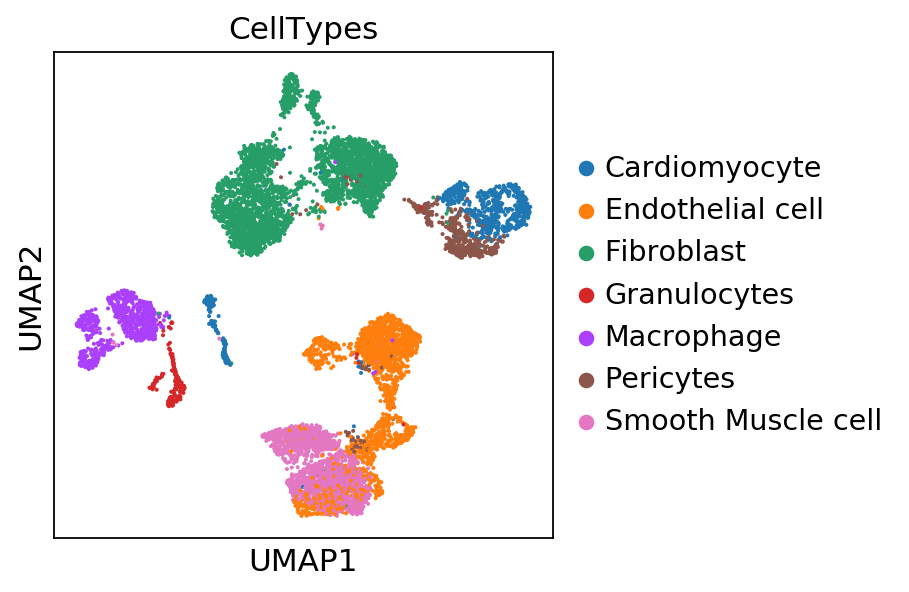

In [ ]:
!pip install leidenalg
sc.pp.neighbors(scRNA_seq, n_neighbors=20, n_pcs=40)
sc.tl.leiden(scRNA_seq)
sc.tl.paga(scRNA_seq)
sc.pl.paga(scRNA_seq, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(scRNA_seq, init_pos='paga')
sc.pl.umap(scRNA_seq, color=['CellTypes']) 

In [ ]:
pair['CellTypes']=''
pair['CellTypes']= scRNA_seq.obs.loc[pair['scRNA'].values,'CellTypes'].values
pair.index = pair['scATAC'].values
pair

,scRNA,scATAC,sample,CellTypes
GCCCAGATCGTGGGTC-1,P1_3MI_AAACCTGGTAGCGATG-1,GCCCAGATCGTGGGTC-1,cell_0,Endothelial cell
CTCGCTAGTCAGCAAG-1,P1_3MI_AAACCTGGTTCGCGAC-1,CTCGCTAGTCAGCAAG-1,cell_1,Endothelial cell
CAGTGCGGTTTGGATC-1,P1_3MI_AAACCTGTCGTAGATC-1,CAGTGCGGTTTGGATC-1,cell_2,Fibroblast
CCGAAGCTCTTCAGAG-1,P1_3MI_AAACCTGTCTTGTTTG-1,CCGAAGCTCTTCAGAG-1,cell_3,Fibroblast
AGCTGATGTGCAAGCA-1,P1_3MI_AAACGGGCAAGCTGGA-1,AGCTGATGTGCAAGCA-1,cell_4,Endothelial cell
...,...,...,...,...
AAACTCGAGGGATCCA-4,P8_3Sham_TGTTCCGCACACTGCG-1,AAACTCGAGGGATCCA-4,cell_1297,Smooth Muscle cell
AGATTCGAGTATACCC-4,P8_3Sham_CAGGTGCTCATGCATG-1,AGATTCGAGTATACCC-4,cell_1298,Fibroblast
TCTAGTTAGACCATAA-4,P8_3Sham_CGTGAGCCATGGTTGT-1,TCTAGTTAGACCATAA-4,cell_1299,Smooth Muscle cell
GTCACGGTCACAAGCT-4,P8_3Sham_GTAGGCCCATCTCCCA-1,GTCACGGTCACAAGCT-4,cell_1300,Fibroblast


In [ ]:
scATAC_seq.obs['CellTypes']=pair.loc[scATAC_seq.obs.index.values,'CellTypes'].values
scATAC_seq.obs

,Type,Stem_Cell_Property,Myocardial_infarction,nb_features,log_nb_features,delli,sample,CellTypes,domain,CellType
AAACGAAAGGATGTCG-1,P1+3 dpi,pos,MI,13472.0,3.757851,tr,cell_0,Endothelial cell,scATAC-seq,
AAACGAAAGTAACTCC-1,P1+3 dpi,pos,MI,9145.0,3.623559,tr,cell_1,Cardiomyocyte,scATAC-seq,
AAACGAACACTTACAG-1,P1+3 dpi,pos,MI,20611.0,3.949488,tr,cell_2,Macrophage,scATAC-seq,Fibroblast
AAACGAACATATACGC-1,P1+3 dpi,pos,MI,16051.0,3.860937,tr,cell_3,Macrophage,scATAC-seq,Fibroblast
AAACGAAGTATTCTGG-1,P1+3 dpi,pos,MI,11284.0,3.724194,tr,cell_4,Endothelial cell,scATAC-seq,
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTCGCGTT-4,P8+3 dps,neg,Sham,10525.0,3.652633,tr,cell_9202,Smooth Muscle cell,scATAC-seq,
TTTGGTTTCTTACGGA-4,P8+3 dps,neg,Sham,5865.0,3.427648,tr,cell_9203,Smooth Muscle cell,scATAC-seq,
TTTGTGTCAAGGCGTA-4,P8+3 dps,neg,Sham,1207.0,2.772322,tr,cell_9204,Smooth Muscle cell,scATAC-seq,
TTTGTGTCAATCACTG-4,P8+3 dps,neg,Sham,8727.0,3.595827,tr,cell_9205,Pericytes,scATAC-seq,


In [ ]:
scRNA_seq_End_index = scRNA_seq.obs[scRNA_seq.obs['CellTypes'].str.contains('End')]
scRNA_seq_Smo_index = scRNA_seq.obs[scRNA_seq.obs['CellTypes'].str.contains('Smo')]
scRNA_seq_End_Smo_index = pd.concat([scRNA_seq_End_index,scRNA_seq_Smo_index],axis=0)
scRNA_seq_End_Smo = scRNA_seq[scRNA_seq_End_Smo_index.index,:]

scATAC_seq_End_index = scATAC_seq.obs[scATAC_seq.obs['CellTypes'].str.contains('End')]
scATAC_seq_Smo_index = scATAC_seq.obs[scATAC_seq.obs['CellTypes'].str.contains('Smo')]
scATAC_seq_End_Smo_index = pd.concat([scATAC_seq_End_index,scATAC_seq_Smo_index],axis=0)
scATAC_seq_End_Smo = scATAC_seq[scATAC_seq_End_Smo_index.index,:]
scATAC_seq_End_Smo

scEnhancer_End_Smo = scEnhancer[scATAC_seq_End_Smo_index.index,:]
scPromoter_End_Smo = scPromoter[scATAC_seq_End_Smo_index.index,:]

In [ ]:
scRNA_seq_End_Smo_P1 = scRNA_seq_End_Smo[scRNA_seq_End_Smo.obs[scRNA_seq_End_Smo.obs['Type'].str.contains('P1')].index,:]
scATAC_seq_End_Smo_P1 = scATAC_seq_End_Smo[scATAC_seq_End_Smo.obs[scATAC_seq_End_Smo.obs['Type'].str.contains('P1')].index,:]
scEnhancer_End_Smo_P1 = scEnhancer_End_Smo[scEnhancer_End_Smo.obs[scEnhancer_End_Smo.obs['Type'].str.contains('P1')].index,:]
scPromoter_End_Smo_P1 = scPromoter_End_Smo[scPromoter_End_Smo.obs[scPromoter_End_Smo.obs['Type'].str.contains('P1')].index,:]

In [ ]:
scRNA_seq_End_Smo_P8 = scRNA_seq_End_Smo[scRNA_seq_End_Smo.obs[scRNA_seq_End_Smo.obs['Type'].str.contains('P8')].index,:]
scATAC_seq_End_Smo_P8 = scATAC_seq_End_Smo[scATAC_seq_End_Smo.obs[scATAC_seq_End_Smo.obs['Type'].str.contains('P8')].index,:]
scEnhancer_End_Smo_P8 = scEnhancer_End_Smo[scEnhancer_End_Smo.obs[scEnhancer_End_Smo.obs['Type'].str.contains('P8')].index,:]
scPromoter_End_Smo_P8 = scPromoter_End_Smo[scPromoter_End_Smo.obs[scPromoter_End_Smo.obs['Type'].str.contains('P8')].index,:]

In [ ]:
import h5py
import pandas as pd
import numpy as np

In [ ]:
def normalization(data):
    _range = np.max(abs(data))
    return data / _range

In [ ]:
def get_weights(f,view,factor,scale=True):
  view_names=f['views']['views'][:]
  group_names=f['groups']['groups'][:]
  feature_names=np.array([f['features'][i][:] for i in view_names])
  sample_names=np.array([f['samples'][i][:] for i in group_names])
  f_name=feature_names[np.where(view_names==str.encode(view))[0][0]]
  f_w=f['expectations']['W'][view][factor-1]
  if scale==True:
    f_w=normalization(f_w)
  res=pd.DataFrame()
  res['feature']=f_name
  res['weights']=f_w
  res['abs_weights']=abs(f_w)
  res['sig']='+'
  res.loc[(res.weights<0),'sig'] = '-'

  return res

In [ ]:
f_End_Smo_P1 = h5py.File('/content/MOFA_End_Smo_P1.hdf5','r')   #打开h5文件
# 可以查看所有的主键
for key in f_End_Smo_P1.keys():
    print(f_End_Smo_P1[key].name)

/data
/expectations
/features
/groups
/intercepts
/model_options
/samples
/training_opts
/training_stats
/variance_explained
/views


In [ ]:
for i in range(f_End_Smo_P1['expectations']['Z']['group0'].shape[0]):
  scRNA_seq_End_Smo_P1.obs['factor{0}'.format(i+1)]=f_End_Smo_P1['expectations']['Z']['group0'][i]

In [ ]:
!pip install matplotlib==3.1.3
import matplotlib

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.0
    Uninstalling matplotlib-3.5.0:
      Successfully uninstalled matplotlib-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


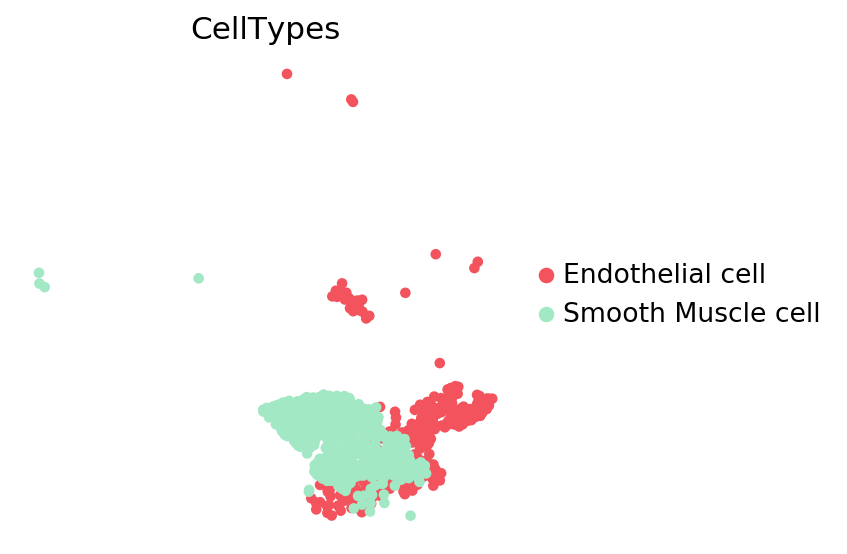

In [ ]:
import seaborn as sns
scnmt=['#f2535d','#a2e8c4','#e5e24f','#6aafda','#c76fc7','#c4425d','#f48a3d','black','grey']
sc.settings.set_figure_params(dpi=80,figsize=[4,4])
sc.pl.umap(scRNA_seq_End_Smo_P1,
      color=["CellTypes"], 
      add_outline=False, 
      legend_loc='right margin', 
      legend_fontsize=12, 
      legend_fontoutline=1,
      frameon=False, palette=scnmt,
      )

In [ ]:
#variance=pd.read_csv('/content/drive/MyDrive/MI/MOFA/variance_explained_Card_Per_P1.csv')
#corr=pd.read_csv('/content/drive/MyDrive/MI/MOFA/correlate_factors_Card_Per_P1.csv')
#variance.index=corr.index
#variance

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2,4))         # Sample figsize in inches
new_blues=sns.color_palette("Greens", 1000)[0:700]
g=sns.heatmap(variance,
      cmap=new_blues,vmax=10,
      linewidths=.5,annot_kws={"size": 12},ax=ax
      )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('Card_Per_P1 Var')
plt.savefig("Card_Per_P1.png",dpi=300,bbox_inches = 'tight')

In [ ]:
fig, ax = plt.subplots(figsize=(2,4))         # Sample figsize in inches
new_reds=sns.color_palette("Reds", 1000)[0:700]
g=sns.heatmap(corr,
      cmap=new_reds, vmax=100,
      linewidths=.5,annot_kws={"size": 12},ax=ax,
      )

g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('End_Smo_P1 cor')
plt.savefig("End_Smo_P1_cor.png",dpi=300,bbox_inches = 'tight')

In [ ]:
plot_data=scRNA_seq_End_Smo_P1.obs
plot_data.head()

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,domain,leiden_anno,CellTypes,delli,sample,CellType,factor1
P1_3MI_AAACCTGGTAGCGATG-1,pos,MI,3days,P1+3 dpi,1902,1902,5401.0,0.0,0.0,3,scRNA-seq,Endothelial cell,Endothelial cell,tr,cell_0,Endothelial cell,0.064956
P1_3MI_AAACCTGGTTCGCGAC-1,pos,MI,3days,P1+3 dpi,3560,3560,13569.0,0.0,0.0,17,scRNA-seq,Endothelial cell-1,Endothelial cell,tr,cell_1,Endothelial cell,1.593816
P1_3MI_AAACGGGCAAGCTGGA-1,pos,MI,3days,P1+3 dpi,3332,3331,11707.0,0.0,0.0,3,scRNA-seq,Endothelial cell-2,Endothelial cell,tr,cell_4,Endothelial cell,2.239939
P1_3MI_AAACGGGCACGGATAG-1,pos,MI,3days,P1+3 dpi,1438,1438,3343.0,0.0,0.0,3,scRNA-seq,Endothelial cell,Endothelial cell,tr,cell_6,Endothelial cell,0.885378
P1_3MI_AAAGATGCATTTCACT-1,pos,MI,3days,P1+3 dpi,2104,2104,5514.0,0.0,0.0,14,scRNA-seq,Endothelial cell-3,Endothelial cell,tr,cell_10,Endothelial cell,1.566361


In [ ]:
from scipy.stats import ttest_1samp
from scipy import stats

In [ ]:
cell_t=list(set(plot_data['CellTypes']))
cell_pd=pd.DataFrame(index=cell_t)

for i in [1]:
  test=[]
  for j in cell_t:
    a=plot_data[plot_data['CellTypes']==j]['factor'+str(i)].values
    b=plot_data[~(plot_data['CellTypes']==j)]['factor'+str(i)].values
    t, p = stats.ttest_ind(a,b)
    logp=-np.log(p)
    if(logp>500):
      logp=500
    test.append(logp)
  cell_pd['factor'+str(i)]=test
cell_pd

,factor1
Smooth Muscle cell,500
Endothelial cell,500


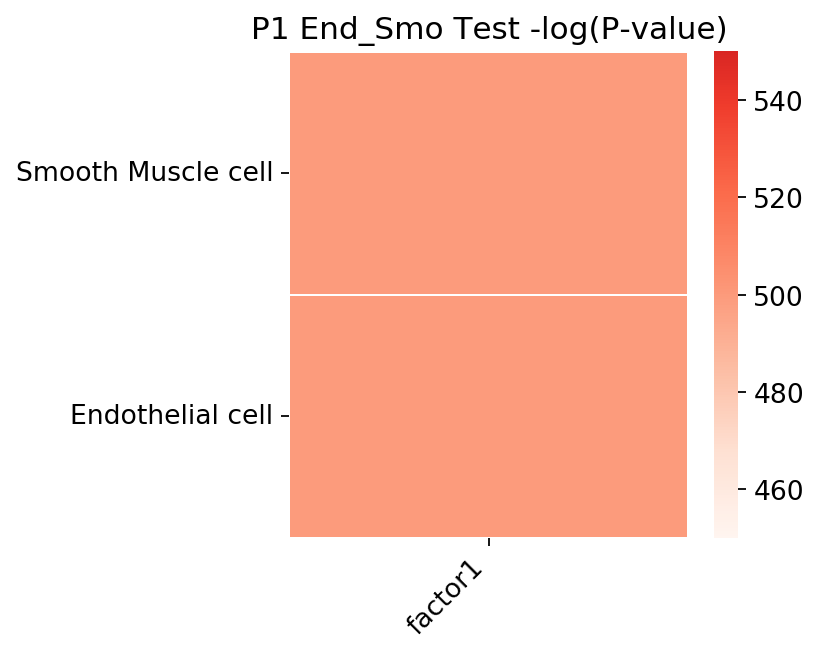

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))         # Sample figsize in inches
new_blues=sns.color_palette("Reds", 1000)[0:700]
g=sns.heatmap(cell_pd,
      cmap=new_blues,vmax=500,
      linewidths=.5,annot_kws={"size": 12},ax=ax
      )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('P1 End_Smo Test -log(P-value)')
plt.savefig("p1_End_Smo_cor_cell.png",dpi=300,bbox_inches = 'tight')

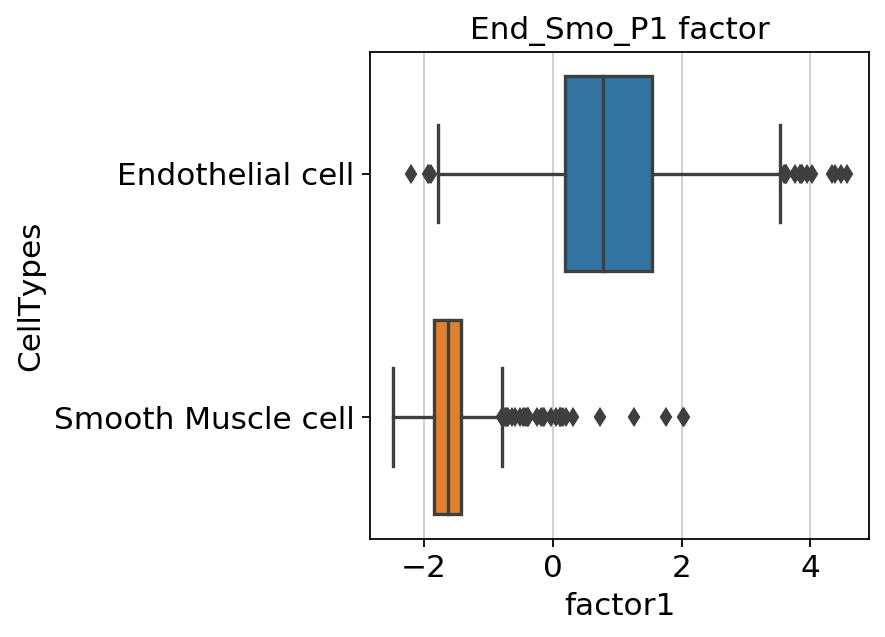

In [ ]:
for i in [1]:
  sns.boxplot(y='CellTypes',x='factor'+str(i),data=scRNA_seq_End_Smo_P1.obs)
  plt.title('End_Smo_P1 factor')
  plt.savefig("End_Smo_P1_factor{0}.png".format(str(i)),dpi=300,bbox_inches = 'tight')
  plt.show()  

## MOFA End_Smo_P8 processs

In [ ]:
import h5py
import pandas as pd
import numpy as np

In [ ]:
def normalization(data):
    _range = np.max(abs(data))
    return data / _range

In [ ]:
def get_weights(f,view,factor,scale=True):
  view_names=f['views']['views'][:]
  group_names=f['groups']['groups'][:]
  feature_names=np.array([f['features'][i][:] for i in view_names])
  sample_names=np.array([f['samples'][i][:] for i in group_names])
  f_name=feature_names[np.where(view_names==str.encode(view))[0][0]]
  f_w=f['expectations']['W'][view][factor-1]
  if scale==True:
    f_w=normalization(f_w)
  res=pd.DataFrame()
  res['feature']=f_name
  res['weights']=f_w
  res['abs_weights']=abs(f_w)
  res['sig']='+'
  res.loc[(res.weights<0),'sig'] = '-'

  return res

In [ ]:
f_End_Smo_P8 = h5py.File('/content/drive/MyDrive/MI/MOFA_End_Smo_P8.hdf5','r')   #打开h5文件
# 可以查看所有的主键
for key in f_End_Smo_P8.keys():
    print(f_End_Smo_P8[key].name)

/data
/expectations
/features
/groups
/intercepts
/model_options
/samples
/training_opts
/training_stats
/variance_explained
/views


In [ ]:
for i in range(f_End_Smo_P8['expectations']['Z']['group0'].shape[0]):
  scRNA_seq_End_Smo_P8.obs['factor{0}'.format(i+1)]=f_End_Smo_P8['expectations']['Z']['group0'][i]

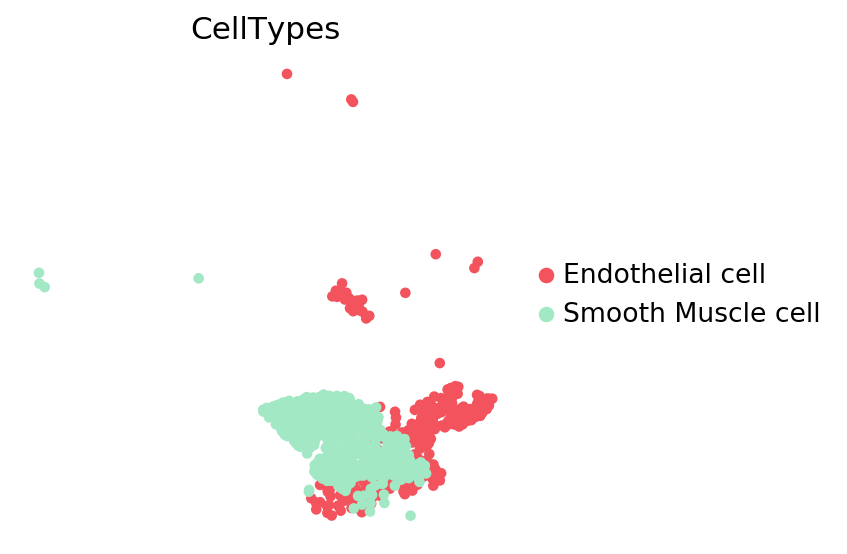

In [ ]:
scnmt=['#f2535d','#a2e8c4','#e5e24f','#6aafda','#c76fc7','#c4425d','#f48a3d','black','grey']
sc.settings.set_figure_params(dpi=80,figsize=[4,4])
sc.pl.umap(scRNA_seq_End_Smo_P8,
      color=["CellTypes"], 
      add_outline=False, 
      legend_loc='right margin', 
      legend_fontsize=12, 
      legend_fontoutline=1,
      frameon=False, palette=scnmt,
      )

In [ ]:
plot_data=scRNA_seq_End_Smo_P8.obs
plot_data.head()

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,...,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11
P8_3MI_AAACGGGAGCGTTGCC-1,neg,MI,3days,P8+3 dpi,3153,3153,8298.0,0.0,0.0,0,...,-0.069978,0.010714,-0.012052,-0.031809,-0.113811,-0.167372,-0.202471,-0.065142,-0.047120,-0.032507
P8_3MI_AAACGGGAGTACGCCC-1,neg,MI,3days,P8+3 dpi,1655,1655,3300.0,0.0,0.0,0,...,1.051758,-0.284424,-0.159954,-0.135454,-0.071692,-0.175279,-0.039440,-0.101677,-0.186071,-0.055197
P8_3MI_AAACGGGAGTGTTGAA-1,neg,MI,3days,P8+3 dpi,3498,3498,10949.0,0.0,0.0,9,...,0.829535,-0.380168,-0.103984,0.067927,-0.142977,-0.186221,-0.347782,-0.072063,-0.180785,-0.054910
P8_3MI_AAAGCAAAGTTTAGGA-1,neg,MI,3days,P8+3 dpi,2175,2175,4937.0,0.0,0.0,0,...,-0.962530,-0.092991,-0.112450,0.013970,-0.071543,0.048023,-0.106243,0.707359,0.136899,-0.053911
P8_3MI_AAAGCAACATGTAAGA-1,neg,MI,3days,P8+3 dpi,2305,2305,6048.0,0.0,0.0,9,...,2.417782,0.336318,-0.173803,-0.246952,-0.089587,0.043230,-0.211816,-0.152635,-0.189270,-0.038578


In [ ]:
from scipy.stats import ttest_1samp
from scipy import stats

In [ ]:
cell_t=list(set(plot_data['CellTypes']))
cell_pd=pd.DataFrame(index=cell_t)

for i in [1,2,3,4]:
  test=[]
  for j in cell_t:
    a=plot_data[plot_data['CellTypes']==j]['factor'+str(i)].values
    b=plot_data[~(plot_data['CellTypes']==j)]['factor'+str(i)].values
    t, p = stats.ttest_ind(a,b)
    logp=-np.log(p)
    if(logp>500):
      logp=500
    test.append(logp)
  cell_pd['factor'+str(i)]=test
cell_pd

,factor1,factor2,factor3,factor4
Smooth Muscle cell,451.499314,187.687558,1.061453,0.694416
Endothelial cell,451.499314,187.687558,1.061453,0.694416


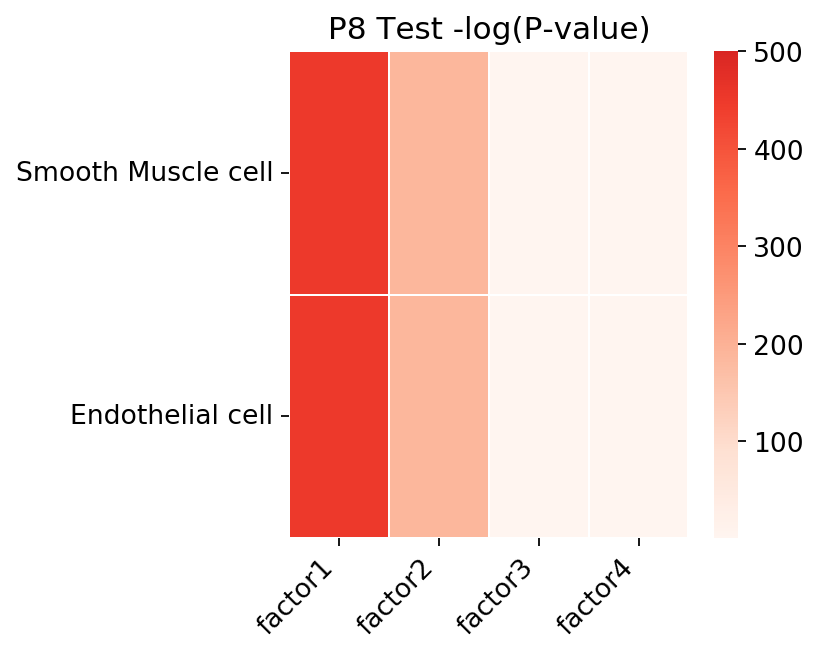

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))         # Sample figsize in inches
new_blues=sns.color_palette("Reds", 1000)[0:700]
g=sns.heatmap(cell_pd,
      cmap=new_blues,vmax=500,
      linewidths=.5,annot_kws={"size": 12},ax=ax
      )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('P8 Test -log(P-value)')
plt.savefig("p8_cor_cell.png",dpi=300,bbox_inches = 'tight')

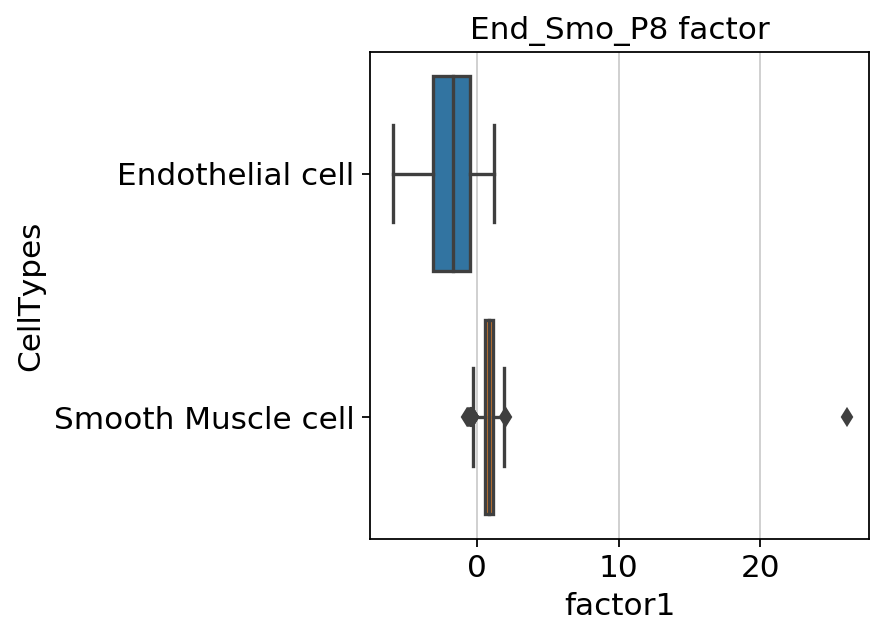

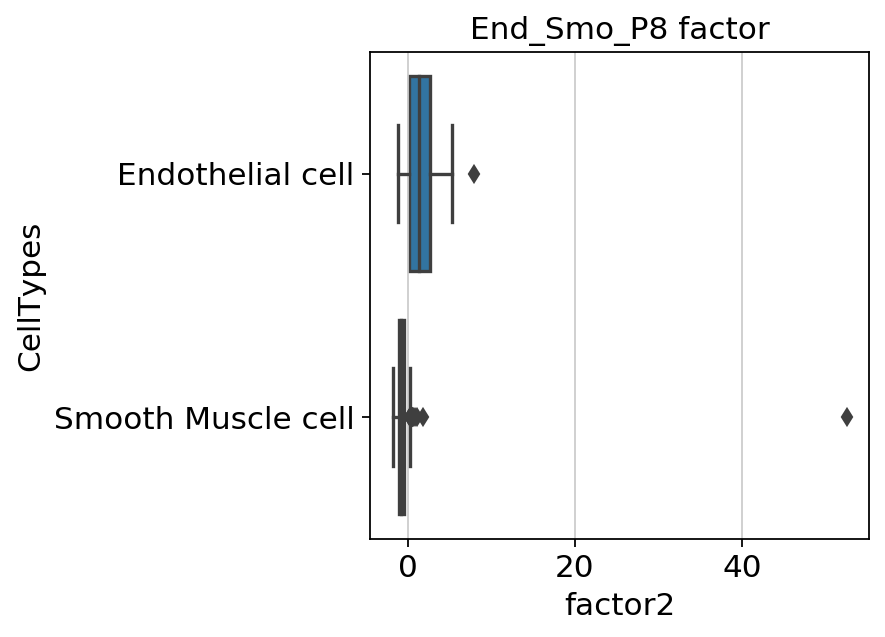

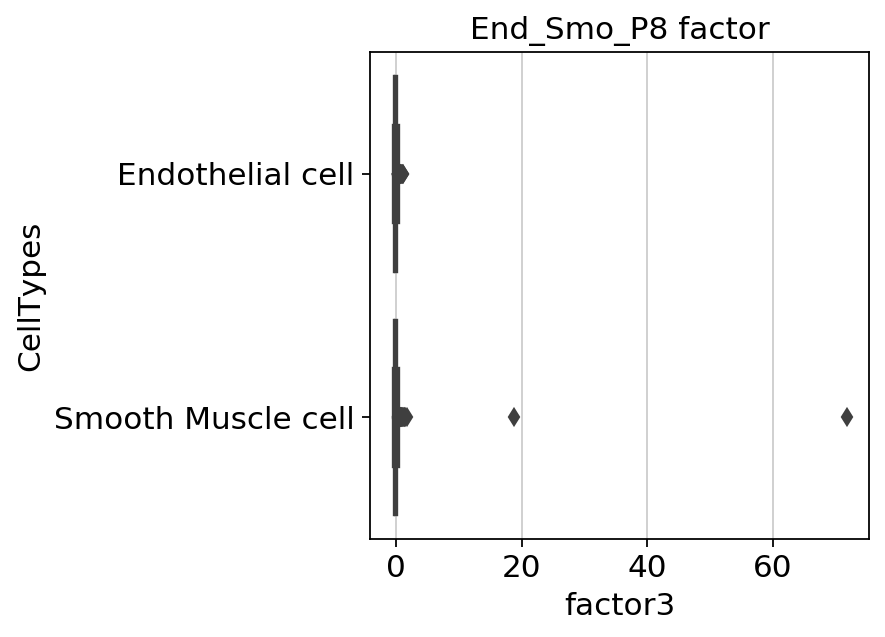

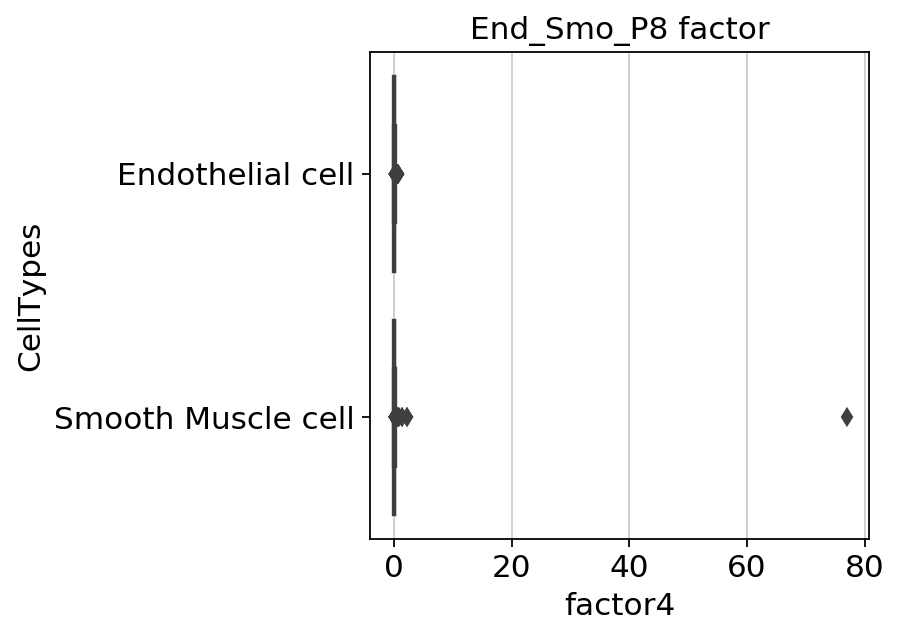

In [ ]:
for i in [1,2,3,4]:
  sns.boxplot(y='CellTypes',x='factor'+str(i),data=scRNA_seq_End_Smo_P8.obs)
  plt.title('End_Smo_P8 factor')
  plt.savefig("End_Smo_P8_factor{0}.png".format(str(i)),dpi=300,bbox_inches = 'tight')
  plt.show()  

## Endothelial Cell

In [ ]:
from matplotlib_venn import venn2,venn2_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline

In [ ]:
End_Smo_RNA_factor1_P1=get_weights(f_End_Smo_P1,'RNA',1)
xl=[]
for i in End_Smo_RNA_factor1_P1['feature'].values:
  xl.append(bytes.decode(i).replace('Mutation',''))
End_Smo_RNA_factor1_P1['feature']=xl
End_Smo_RNA_factor1_P1=End_Smo_RNA_factor1_P1.sort_values('weights',ascending=False)
End_Smo_RNA_factor1_P1.head(10)

,feature,weights,abs_weights,sig
1342,Shkbp1,1.000000,1.000000,+
2635,Eif4g1,0.724943,0.724943,+
1677,Pcp2,0.694212,0.694212,+
488,Bgn,0.623731,0.623731,+
986,Spp1,0.598943,0.598943,+
1274,Nlrp4c,0.573773,0.573773,+
1039,Eln,0.525036,0.525036,+
33,Col3a1,0.497507,0.497507,+
1658,Myl6,0.490362,0.490362,+
2080,Slc35e4,0.482858,0.482858,+


In [ ]:
End_Smo_RNA_factor1_P8=get_weights(f_End_Smo_P8,'RNA',1)
xl=[]
for i in End_Smo_RNA_factor1_P8['feature'].values:
  xl.append(bytes.decode(i).replace('Mutation',''))
End_Smo_RNA_factor1_P8['feature']=xl
End_Smo_RNA_factor1_P8=End_Smo_RNA_factor1_P8.sort_values('weights',ascending=False)
End_Smo_RNA_factor1_P8.head(10)

,feature,weights,abs_weights,sig
2625,Gm21897,0.503544,0.503544,+
883,Cd36,0.388985,0.388985,+
1713,Purg,0.357400,0.357400,+
1081,Gng11,0.318633,0.318633,+
544,Fabp4,0.310916,0.310916,+
821,Hspg2,0.284593,0.284593,+
1714,5930422O12Rik,0.281438,0.281438,+
1021,Myl2,0.271351,0.271351,+
946,Kdr,0.267626,0.267626,+
134,Tnnt2,0.266875,0.266875,+


In [ ]:
End_Smo_RNA_factor2_P8=get_weights(f_End_Smo_P8,'RNA',2)
xl=[]
for i in End_Smo_RNA_factor2_P8['feature'].values:
  xl.append(bytes.decode(i).replace('Mutation',''))
End_Smo_RNA_factor2_P8['feature']=xl
End_Smo_RNA_factor2_P8=End_Smo_RNA_factor1_P8.sort_values('weights',ascending=False)
End_Smo_RNA_factor2_P8.head(10)

,feature,weights,abs_weights,sig
2625,Gm21897,0.503544,0.503544,+
883,Cd36,0.388985,0.388985,+
1713,Purg,0.357400,0.357400,+
1081,Gng11,0.318633,0.318633,+
544,Fabp4,0.310916,0.310916,+
821,Hspg2,0.284593,0.284593,+
1714,5930422O12Rik,0.281438,0.281438,+
1021,Myl2,0.271351,0.271351,+
946,Kdr,0.267626,0.267626,+
134,Tnnt2,0.266875,0.266875,+


Pcp2, Shkbp1, Spp1, Bgn, Eif4g1
['RP23-294B14.1', 'Stmn2', 'Usp18', 'Pvt1', 'Tm4sf1', 'Pigyl']


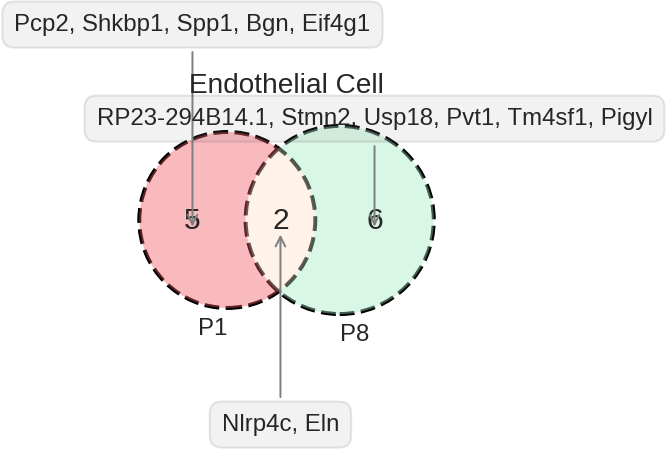

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))         # Sample figsize in inches

pos_f=End_Smo_RNA_factor1_P1.loc[End_Smo_RNA_factor1_P1['weights']>0.5,'feature']
#neg_f_1=End_Smo_RNA_factor2_P8.loc[End_Smo_RNA_factor2_P8['weights']>0.25,'feature']
#neg_f_2=End_Smo_RNA_factor1_P8.loc[End_Smo_RNA_factor1_P8['weights']<-0.5,'feature']
#neg_f=list(set(neg_f_1).union(set(neg_f_2)))
neg_f=End_Smo_RNA_factor1_P8.loc[End_Smo_RNA_factor1_P8['weights']<-0.5,'feature']

venn2_circles(subsets=[set(pos_f),set(neg_f)],
        linestyle='--', linewidth=2, color="black",#外框线型、线宽、颜色
        normalize_to=1.0,
       )
v=venn2(subsets=[set(pos_f),set(neg_f)],
      set_labels=('P1','P8'),
      set_colors=("#f2535d","#a2ebc4"),
       normalize_to=1.0,)
ret=list(set(neg_f) & (set(pos_f))) 
plt.annotate(str(ret).replace('flag1','\n').replace("'",'').replace('[','').replace(']',''), xy=v.get_label_by_id('11').get_position() - np.array([0, 0.05]), xytext=(0,-100),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', color='gray'),size=12)

ret=list(set(pos_f).difference(set(neg_f))) 
plot_str=str(ret).replace("'",'').replace('[','').replace(']','')
print(plot_str)
plt.annotate(plot_str, xy=v.get_label_by_id('10').get_position() - np.array([0, 0.05]), xytext=(0,100),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', color='gray'),size=12)

ret=list(set(neg_f).difference(set(pos_f)))
plot_str=str(ret).replace("'",'').replace('[','').replace(']','')
print(ret)
plt.annotate(plot_str, xy=v.get_label_by_id('01').get_position() - np.array([0, 0.05]), xytext=(0,53),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', color='gray'),size=12)
v.get_label_by_id('10').set_fontsize(15)#1的大小设置为20
v.get_label_by_id('01').set_fontsize(15)#1的大小设置为20
v.get_label_by_id('11').set_fontsize(15)#1的大小设置为20
for t in v.set_labels: 
    t.set_fontsize(12) 
plt.title('Endothelial Cell')
plt.savefig("Endothelial Cell_venn.png",dpi=300,bbox_inches = 'tight')

In [ ]:
def get_viodata(res_ad,res_ctrl,cell_type,genelist):
  vio_data=pd.DataFrame()
  print(len(res_ad[res_ad.obs['CellTypes'].str.contains(cell_type)].X.T[0].A[0]),len(res_ctrl[res_ctrl.obs['CellTypes'].str.contains(cell_type)].X.T[0].A[0]))
  for i in genelist:
    test_1=pd.DataFrame()
    test_1['value']=res_ad[res_ad.obs['CellTypes'].str.contains(cell_type)][:,i].X.T[0].A[0]
    test_1['gene']=[i for i in [i]*len(test_1)]
    test_1['type']=[i for i in ['POS']*len(test_1)]
    test_2=pd.DataFrame()
    test_2['value']=res_ctrl[res_ctrl.obs['CellTypes'].str.contains(cell_type)][:,i].X.T[0].A[0]
    test_2['gene']=[i for i in [i]*len(test_2)]
    test_2['type']=[i for i in ['NEG']*len(test_2)]
  
    vio_data=pd.concat([vio_data,test_1],ignore_index=True)
    vio_data=pd.concat([vio_data,test_2],ignore_index=True)
  return vio_data

In [ ]:
def pltx(x1,x2,y1,y2,sig,min_x=0):
    x=np.ones((2))*x1
    y = np.arange(y1,y2,y2-y1-0.0001)
    plt.plot(x,y,label="$y$",color="black",linewidth=1)
    x=np.ones((2))*x2
    y = np.arange(y1,y2,y2-y1-0.0001)
    plt.plot(x,y,label="$y$",color="black",linewidth=1)
    x = np.arange(x1,x2+0.0001,x2-x1)
    y = y2+0*x
    plt.plot(x,y,label="$y$",color="black",linewidth=1)
    x0 = (x1+x2)/2
    y0=y2
    plt.annotate(r'%s'%sig, xy=(x0, y0), xycoords='data', xytext=(0, +1),
                     textcoords='offset points', fontsize=15,color="black")
    if(min_x!=0):
        plt.ylim(min_x,y2+y2/10)

In [ ]:
#pos_f=Card_Per_RNA_factor1_P1.loc[Card_Per_RNA_factor1_P1['weights']>0.841,'feature']
#neg_f=Card_Per_RNA_factor1_P8.loc[Card_Per_RNA_factor1_P8['weights']>0.6,'feature']

1403 408
Ttest_indResult(statistic=23.01371971526666, pvalue=5.273683231383653e-103)
5.273683231383653e-103 ***
Ttest_indResult(statistic=28.3411042691299, pvalue=1.5734282108393463e-146)
1.5734282108393463e-146 ***
Ttest_indResult(statistic=20.535641114804005, pvalue=2.0882787582352296e-84)
2.0882787582352296e-84 ***
Ttest_indResult(statistic=13.568188698068097, pvalue=5.224429855730567e-40)
5.224429855730567e-40 ***
Ttest_indResult(statistic=22.37833861819467, pvalue=4.037484635620948e-98)
4.037484635620948e-98 ***


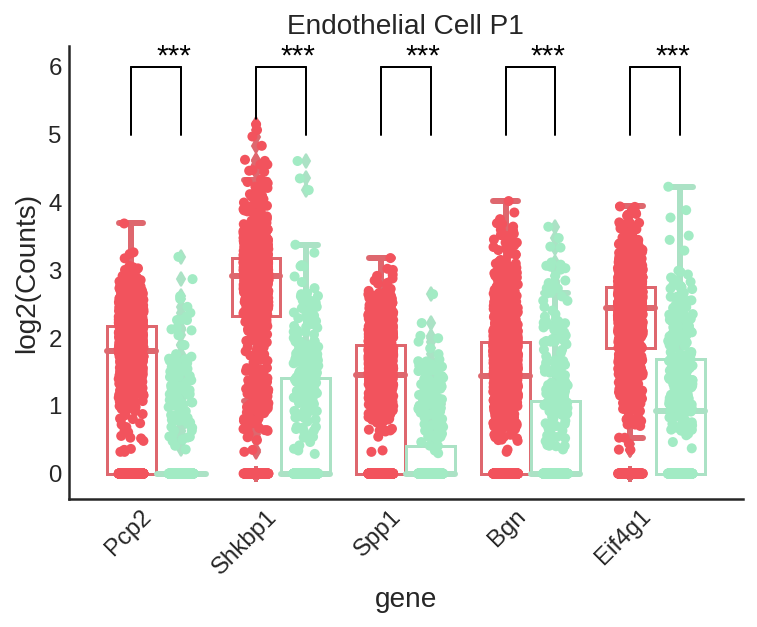

In [ ]:
ret=list(set(neg_f).difference(set(pos_f))) 
ret=list(set(pos_f).difference(set(neg_f)))
#ret=list(set(neg_f) & (set(pos_f))) 
plot_data1=get_viodata(scRNA_seq_End_Smo_P1,scRNA_seq_End_Smo_P8,'Endothelial',ret)
plot_data1
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x="gene", y="value", hue='type',data=plot_data1, 
        palette=["#f2535d","#a2ebc4"],ax=ax,
        #saturation=1
        )

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        line.set_linewidth(3)

# Also fix the legend
for legpatch in ax.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

sns.stripplot(x="gene", y="value", hue='type',data=plot_data1, 
        palette=["#f2535d","#a2ebc4"],ax=ax,
        split=True, jitter=0.2, 
        )

k=0
for i in ret:
  
  ttest = stats.ttest_ind(plot_data1.loc[(plot_data1['gene']==i)&(plot_data1['type']=='POS')]['value'].values, 
                          plot_data1.loc[(plot_data1['gene']==i)&(plot_data1['type']=='NEG')]['value'].values)
  #max=ty[ty['if']==dyt[i]]['value'].max()
  print(ttest)
  if(ttest[1]<0.001):
      xing="***"   
  elif(ttest[1]<0.01):
      xing="**"
  elif(ttest[1]<0.06):
      xing="*"
  else:
      xing=' '
  print(ttest[1],xing)
  if xing!=' ':
    pltx(k-0.2,k+0.2,5,6,xing,0)
  k+=1
plt.legend([],[])
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 15,rotation=45, horizontalalignment='right',)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
#plt.title('Neg Test -log(P-value)')
plt.title('Endothelial Cell P1')
plt.ylabel('log2(Counts)')
plt.savefig("Endothelial_Cell_P1_gene.png",dpi=300,bbox_inches = 'tight')

1403 408
Ttest_indResult(statistic=-12.356019938609965, pvalue=9.944072347581125e-34)
9.944072347581125e-34 ***
Ttest_indResult(statistic=-9.58309569714604, pvalue=2.9807921012780065e-21)
2.9807921012780065e-21 ***
Ttest_indResult(statistic=-15.432519665625234, pvalue=1.4268505259750564e-50)
1.4268505259750564e-50 ***
Ttest_indResult(statistic=-15.25788478982582, pvalue=1.5434330971695261e-49)
1.5434330971695261e-49 ***
Ttest_indResult(statistic=-8.043842094026115, pvalue=1.5590287832203054e-15)
1.5590287832203054e-15 ***
Ttest_indResult(statistic=-20.886641280364085, pvalue=5.779386840518207e-87)
5.779386840518207e-87 ***


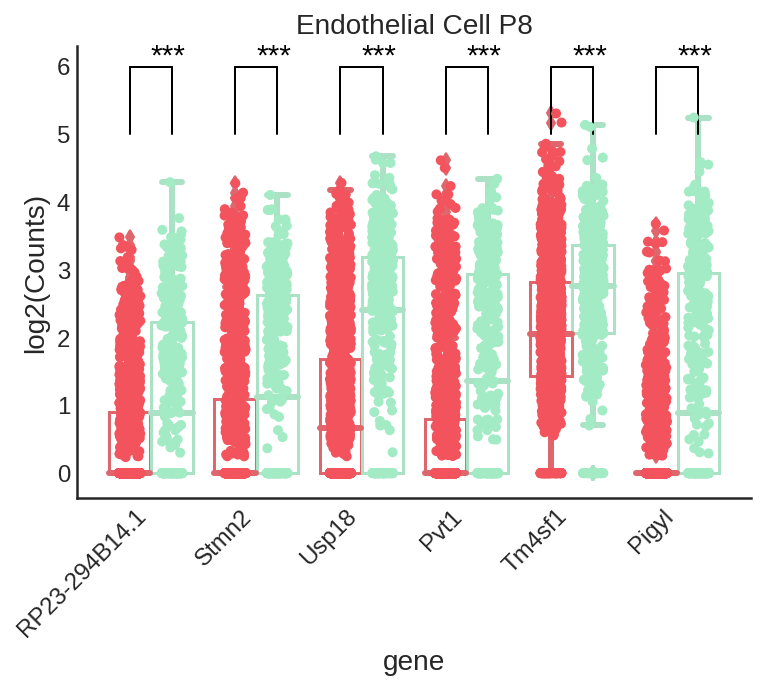

In [ ]:
ret=list(set(neg_f).difference(set(pos_f))) 
#ret=list(set(pos_f).difference(set(neg_f)))
#ret=list(set(neg_f) & (set(pos_f))) 
plot_data1=get_viodata(scRNA_seq_End_Smo_P1,scRNA_seq_End_Smo_P8,'Endothelial',ret)
plot_data1
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x="gene", y="value", hue='type',data=plot_data1, 
        palette=["#f2535d","#a2ebc4"],ax=ax,
        #saturation=1
        )

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        line.set_linewidth(3)

# Also fix the legend
for legpatch in ax.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

sns.stripplot(x="gene", y="value", hue='type',data=plot_data1, 
        palette=["#f2535d","#a2ebc4"],ax=ax,
        split=True, jitter=0.2, 
        )

k=0
for i in ret:
  
  ttest = stats.ttest_ind(plot_data1.loc[(plot_data1['gene']==i)&(plot_data1['type']=='POS')]['value'].values, 
                          plot_data1.loc[(plot_data1['gene']==i)&(plot_data1['type']=='NEG')]['value'].values)
  #max=ty[ty['if']==dyt[i]]['value'].max()
  print(ttest)
  if(ttest[1]<0.001):
      xing="***"   
  elif(ttest[1]<0.01):
      xing="**"
  elif(ttest[1]<0.06):
      xing="*"
  else:
      xing=' '
  print(ttest[1],xing)
  if xing!=' ':
    pltx(k-0.2,k+0.2,5,6,xing,0)
  k+=1
plt.legend([],[])
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 15,rotation=45, horizontalalignment='right',)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
#plt.title('Neg Test -log(P-value)')
plt.title('Endothelial Cell P8')
plt.ylabel('log2(Counts)')
plt.savefig("Endothelial_P8_gene.png",dpi=300,bbox_inches = 'tight')

# Granulocytes_Marcophage ALL

## MOFA Granulocytes_Marcophage(Gra_Mar)

In [ ]:
!pip install scanpy
!pip install mofapy2
from mofapy2.run.entry_point import entry_point
import anndata
import networkx as nx
import scanpy as sc
#import scglue
from matplotlib import rcParams
import pandas as pd
import numpy as np

  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
!pip install matplotlib==3.5
!pip install scglue
!pip install scanpy
import matplotlib
import scanpy

  Using cached matplotlib-3.5.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pair = pd.read_csv('/content/drive/MyDrive/MI/new_pair.csv')
pair.drop(['Unnamed: 0'],axis=1,inplace=True)
pair.head()

,scRNA,scATAC,sample
0,P1_3MI_AAACCTGGTAGCGATG-1,GCCCAGATCGTGGGTC-1,cell_0
1,P1_3MI_AAACCTGGTTCGCGAC-1,CTCGCTAGTCAGCAAG-1,cell_1
2,P1_3MI_AAACCTGTCGTAGATC-1,CAGTGCGGTTTGGATC-1,cell_2
3,P1_3MI_AAACCTGTCTTGTTTG-1,CCGAAGCTCTTCAGAG-1,cell_3
4,P1_3MI_AAACGGGCAAGCTGGA-1,AGCTGATGTGCAAGCA-1,cell_4


In [ ]:
scRNA_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_seq_MOFA_normalized.h5ad")
scATAC_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_MOFA_normalized.h5ad")
scEnhancer = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Enhancer_normalized.h5ad")
scPromoter = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Promoter_normalized.h5ad")

In [ ]:
pair['CellTypes']=''
pair['CellTypes']= scRNA_seq.obs.loc[pair['scRNA'].values,'CellTypes'].values
pair.index = pair['scATAC'].values
pair

,scRNA,scATAC,sample,CellTypes
GCCCAGATCGTGGGTC-1,P1_3MI_AAACCTGGTAGCGATG-1,GCCCAGATCGTGGGTC-1,cell_0,Endothelial cell
CTCGCTAGTCAGCAAG-1,P1_3MI_AAACCTGGTTCGCGAC-1,CTCGCTAGTCAGCAAG-1,cell_1,Endothelial cell
CAGTGCGGTTTGGATC-1,P1_3MI_AAACCTGTCGTAGATC-1,CAGTGCGGTTTGGATC-1,cell_2,Fibroblast
CCGAAGCTCTTCAGAG-1,P1_3MI_AAACCTGTCTTGTTTG-1,CCGAAGCTCTTCAGAG-1,cell_3,Fibroblast
AGCTGATGTGCAAGCA-1,P1_3MI_AAACGGGCAAGCTGGA-1,AGCTGATGTGCAAGCA-1,cell_4,Endothelial cell
...,...,...,...,...
AAACTCGAGGGATCCA-4,P8_3Sham_TGTTCCGCACACTGCG-1,AAACTCGAGGGATCCA-4,cell_1297,Smooth Muscle cell
AGATTCGAGTATACCC-4,P8_3Sham_CAGGTGCTCATGCATG-1,AGATTCGAGTATACCC-4,cell_1298,Fibroblast
TCTAGTTAGACCATAA-4,P8_3Sham_CGTGAGCCATGGTTGT-1,TCTAGTTAGACCATAA-4,cell_1299,Smooth Muscle cell
GTCACGGTCACAAGCT-4,P8_3Sham_GTAGGCCCATCTCCCA-1,GTCACGGTCACAAGCT-4,cell_1300,Fibroblast


In [ ]:
scATAC_seq.obs['CellTypes']=pair.loc[scATAC_seq.obs.index.values,'CellTypes'].values
scATAC_seq.obs

,Type,Stem_Cell_Property,Myocardial_infarction,nb_features,log_nb_features,delli,sample,CellTypes,domain,CellType
AAACGAAAGGATGTCG-1,P1+3 dpi,pos,MI,13472.0,3.757851,tr,cell_0,Endothelial cell,scATAC-seq,
AAACGAAAGTAACTCC-1,P1+3 dpi,pos,MI,9145.0,3.623559,tr,cell_1,Cardiomyocyte,scATAC-seq,
AAACGAACACTTACAG-1,P1+3 dpi,pos,MI,20611.0,3.949488,tr,cell_2,Macrophage,scATAC-seq,Fibroblast
AAACGAACATATACGC-1,P1+3 dpi,pos,MI,16051.0,3.860937,tr,cell_3,Macrophage,scATAC-seq,Fibroblast
AAACGAAGTATTCTGG-1,P1+3 dpi,pos,MI,11284.0,3.724194,tr,cell_4,Endothelial cell,scATAC-seq,
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTCGCGTT-4,P8+3 dps,neg,Sham,10525.0,3.652633,tr,cell_9202,Smooth Muscle cell,scATAC-seq,
TTTGGTTTCTTACGGA-4,P8+3 dps,neg,Sham,5865.0,3.427648,tr,cell_9203,Smooth Muscle cell,scATAC-seq,
TTTGTGTCAAGGCGTA-4,P8+3 dps,neg,Sham,1207.0,2.772322,tr,cell_9204,Smooth Muscle cell,scATAC-seq,
TTTGTGTCAATCACTG-4,P8+3 dps,neg,Sham,8727.0,3.595827,tr,cell_9205,Pericytes,scATAC-seq,


In [195]:
scRNA_seq_Gra_index = scRNA_seq.obs[scRNA_seq.obs['CellTypes'].str.contains('Granulocytes')]
scRNA_seq_Mar_index = scRNA_seq.obs[scRNA_seq.obs['CellTypes'].str.contains('Marcophage')]
scRNA_seq_Gra_Mar_index = pd.concat([scRNA_seq_Gra_index,scRNA_seq_Mar_index],axis=0)
scRNA_seq_Gra_Mar = scRNA_seq[scRNA_seq_Gra_Mar_index.index,:]

scATAC_seq_Gra_index = scATAC_seq.obs[scATAC_seq.obs['CellTypes'].str.contains('Granulocytes')]
scATAC_seq_Mar_index = scATAC_seq.obs[scATAC_seq.obs['CellTypes'].str.contains('Marcophage')]
scATAC_seq_Gra_Mar_index = pd.concat([scATAC_seq_Gra_index,scATAC_seq_Mar_index],axis=0)
scATAC_seq_Gra_Mar = scATAC_seq[scATAC_seq_Gra_Mar_index.index,:]

scEnhancer_Gra_Mar = scEnhancer[scATAC_seq_Gra_Mar_index.index,:]
scPromoter_Gra_Mar = scPromoter[scATAC_seq_Gra_Mar_index.index,:]

In [196]:
scRNA_seq_Gra_Mar_P1 = scRNA_seq_Gra_Mar[scRNA_seq_Gra_Mar.obs[scRNA_seq_Gra_Mar.obs['Type'].str.contains('P1')].index,:]
scATAC_seq_Gra_Mar_P1 = scATAC_seq_Gra_Mar[scATAC_seq_Gra_Mar.obs[scATAC_seq_Gra_Mar.obs['Type'].str.contains('P1')].index,:]
scEnhancer_Gra_Mar_P1 = scEnhancer_Gra_Mar[scEnhancer_Gra_Mar.obs[scEnhancer_Gra_Mar.obs['Type'].str.contains('P1')].index,:]
scPromoter_Gra_Mar_P1 = scPromoter_Gra_Mar[scPromoter_Gra_Mar.obs[scPromoter_Gra_Mar.obs['Type'].str.contains('P1')].index,:]

In [197]:
rna_MOFA = scRNA_seq_Gra_Mar_P1
Enhancer_MOFA = scEnhancer_Gra_Mar_P1
Promoter_MOFA = scPromoter_Gra_Mar_P1

In [198]:
rna_MOFA_meta=rna_MOFA.obs.copy()
rna_MOFA_meta['CellTypes']=[i.split('-')[0] for i in rna_MOFA_meta['CellTypes']]
rna_MOFA_meta.set_index(Promoter_MOFA.obs.index,inplace=True)
rna_MOFA_meta.index.name='sample'
rna_MOFA_meta.to_csv('MOFA_Gra_Mar_P1.csv')
rna_MOFA_meta.head()

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,domain,leiden_anno,CellTypes,delli,sample,CellType
sample,,,,,,,,,,,,,,,,
AAAGGATCATCATCGA-1,pos,MI,3days,P1+3 dpi,1794,1794,5663.0,0.0,0.0,15,scRNA-seq,Granulocytes,Granulocytes,tr,cell_60,Granulocytes
AAATGAGCAACAACTC-1,pos,MI,3days,P1+3 dpi,1234,1234,3686.0,0.0,0.0,15,scRNA-seq,Granulocytes,Granulocytes,tr,cell_150,Granulocytes
ACTTTCACAGGTAGGT-1,pos,MI,3days,P1+3 dpi,1151,1151,3362.0,0.0,0.0,15,scRNA-seq,Granulocytes,Granulocytes,tr,cell_203,Granulocytes
AGGCGTCCACGATATC-1,pos,MI,3days,P1+3 dpi,1064,1064,3145.0,0.0,0.0,15,scRNA-seq,Granulocytes,Granulocytes,tr,cell_371,Granulocytes
AGTTTGGGTCAACTAC-1,pos,MI,3days,P1+3 dpi,1094,1094,3390.0,0.0,0.0,15,scRNA-seq,Granulocytes,Granulocytes,tr,cell_448,Granulocytes


In [199]:
# initialise the entry point
# MOFA参数设置
ent1 = entry_point()
ent1.set_data_options(
    scale_groups = False, 
    scale_views = False,
    center_groups=True,
)
# 构建组学层
data_mat=[[None for g in range(1)] for m in range(3)]
data_mat[0][0]=np.array(rna_MOFA.X.todense())
data_mat[1][0]=np.array(Enhancer_MOFA.X.todense())
data_mat[2][0]=np.array(Promoter_MOFA.X.todense())
# MOFA-Enhancer,Gene_Activity_ASC数据预处理，防止feature_names重复
Enhancer_MOFA_All=[]
for i in scEnhancer_Gra_Mar_P1.var_names:
  Enhancer_MOFA_All.append('Enhancer_'+i)
Enhancer_MOFA_All

Promoter_MOFA_All=[]
for i in scPromoter_Gra_Mar_P1.var_names:
  Promoter_MOFA_All.append('Promoter_'+i)
Promoter_MOFA_All

# MOFA数据导入
ent1.set_data_matrix(data_mat, likelihoods = ["gaussian","gaussian","gaussian"],
          views_names=['RNA','Enhancer','Promoter'],
          samples_names=[Promoter_MOFA.obs.index],
          features_names=[rna_MOFA.var_names,
                  Enhancer_MOFA_All,
                  Promoter_MOFA_All])
# 模型参数设置
ent1.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)
ent1.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = True, 
    verbose = False, 
    seed = 1
)
# 模型运行并保存
ent1.build()

ent1.run()

# Save the output
ent1.save(outfile='MOFA_Gra_Mar_P1.hdf5')
!cp MOFA_Gra_Mar_P1.hdf5 /content/drive/MyDrive/MI


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Successfully loaded view='RNA' group='group0' with N=89 samples and D=3000 features...
Successfully loaded view='Enhancer' group='group0' with N=89 samples and D=3451 features...
Successfully loaded view='Promoter' group='group0' with N=89 samples and D=3963 features...





Model options:

In [201]:
scRNA_seq_Gra_Mar_P8 = scRNA_seq_Gra_Mar[scRNA_seq_Gra_Mar.obs[scRNA_seq_Gra_Mar.obs['Type'].str.contains('P8')].index,:]
scATAC_seq_Gra_Mar_P8 = scATAC_seq_Gra_Mar[scATAC_seq_Gra_Mar.obs[scATAC_seq_Gra_Mar.obs['Type'].str.contains('P8')].index,:]
scEnhancer_Gra_Mar_P8 = scEnhancer_Gra_Mar[scEnhancer_Gra_Mar.obs[scEnhancer_Gra_Mar.obs['Type'].str.contains('P8')].index,:]
scPromoter_Gra_Mar_P8 = scPromoter_Gra_Mar[scPromoter_Gra_Mar.obs[scPromoter_Gra_Mar.obs['Type'].str.contains('P8')].index,:]

In [202]:
rna_MOFA = scRNA_seq_Gra_Mar_P8
Enhancer_MOFA = scEnhancer_Gra_Mar_P8
Promoter_MOFA = scPromoter_Gra_Mar_P8

In [203]:
rna_MOFA_meta=rna_MOFA.obs.copy()
rna_MOFA_meta['CellTypes']=[i.split('-')[0] for i in rna_MOFA_meta['CellTypes']]
rna_MOFA_meta.set_index(Promoter_MOFA.obs.index,inplace=True)
rna_MOFA_meta.index.name='sample'
rna_MOFA_meta.to_csv('MOFA_Gra_Mar_P8.csv')
rna_MOFA_meta.head()

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,domain,leiden_anno,CellTypes,delli,sample,CellType
sample,,,,,,,,,,,,,,,,
AAACTGCAGTCAACTC-3,neg,MI,3days,P8+3 dpi,763,763,2660.0,0.0,0.0,15,scRNA-seq,Granulocytes,Granulocytes,tr,cell_6312,Granulocytes
AAAGGGCTCCATAGGT-3,neg,MI,3days,P8+3 dpi,839,839,3096.0,0.0,0.0,15,scRNA-seq,Granulocytes,Granulocytes,tr,cell_6344,Granulocytes
AAGGAGCTCCGATTGA-3,neg,MI,3days,P8+3 dpi,1148,1148,5187.0,0.0,0.0,15,scRNA-seq,Granulocytes,Granulocytes,tr,cell_6369,Granulocytes
AGGCGAAAGTACCACT-3,neg,MI,3days,P8+3 dpi,780,780,2810.0,0.0,0.0,15,scRNA-seq,Granulocytes,Granulocytes,tr,cell_6440,Granulocytes
AGTGCGCAGTCAGCCC-3,neg,MI,3days,P8+3 dpi,1258,1258,6014.0,0.0,0.0,15,scRNA-seq,Granulocytes,Granulocytes,tr,cell_6453,Granulocytes


In [204]:
# initialise the entry point
# MOFA参数设置
ent1 = entry_point()
ent1.set_data_options(
    scale_groups = False, 
    scale_views = False,
    center_groups=True,
)
# 构建组学层
data_mat=[[None for g in range(1)] for m in range(3)]
data_mat[0][0]=np.array(rna_MOFA.X.todense())
data_mat[1][0]=np.array(Enhancer_MOFA.X.todense())
data_mat[2][0]=np.array(Promoter_MOFA.X.todense())
# MOFA-Enhancer,Gene_Activity_ASC数据预处理，防止feature_names重复
Enhancer_MOFA_All=[]
for i in scEnhancer_Gra_Mar_P8.var_names:
  Enhancer_MOFA_All.append('Enhancer_'+i)
Enhancer_MOFA_All

Promoter_MOFA_All=[]
for i in scPromoter_Gra_Mar_P8.var_names:
  Promoter_MOFA_All.append('Promoter_'+i)
Promoter_MOFA_All

# MOFA数据导入
ent1.set_data_matrix(data_mat, likelihoods = ["gaussian","gaussian","gaussian"],
          views_names=['RNA','Enhancer','Promoter'],
          samples_names=[Promoter_MOFA.obs.index],
          features_names=[rna_MOFA.var_names,
                  Enhancer_MOFA_All,
                  Promoter_MOFA_All])
# 模型参数设置
ent1.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)
ent1.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = True, 
    verbose = False, 
    seed = 1
)
# 模型运行并保存
ent1.build()

ent1.run()

# Save the output
ent1.save(outfile='MOFA_Gra_Mar_P8.hdf5')
!cp MOFA_Gra_Mar_P8.hdf5 /content/drive/MyDrive/MI


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Successfully loaded view='RNA' group='group0' with N=86 samples and D=3000 features...
Successfully loaded view='Enhancer' group='group0' with N=86 samples and D=3451 features...
Successfully loaded view='Promoter' group='group0' with N=86 samples and D=3963 features...





Model options:

In [ ]:
sample_metadata <- fread('MOFA_Card_Per_P1.csv')#注意第一列细胞的标头要写为sample
model <- load_model("MOFA_Card_Per_P1.hdf5")
samples_metadata(model) <- sample_metadata

NameError: ignored

In [ ]:
plot_variance_explained(model, max_r2=15)
variance_explained=model@cache[["variance_explained"]][["r2_per_factor"]][["group0"]]
write.table(variance_explained,file='variance_explained_Card_Per_P1.csv',sep=',',row.names =FALSE)

In [ ]:
p=correlate_factors_with_covariates(model, covariates = c("CellTypes","Type"), plot="log_pval",return_data=TRUE)
write.table(p,file='correlate_factors_Card_Per_P1.csv',sep=',')

## MOFA Gra_Mar_P1 processs

In [220]:
scRNA_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_seq_MOFA_normalized.h5ad")
scATAC_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_MOFA_normalized.h5ad")
scEnhancer = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Enhancer_normalized.h5ad")
scPromoter = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Promoter_normalized.h5ad")

         Falling back to preprocessing with `sc.pp.pca` and default params.


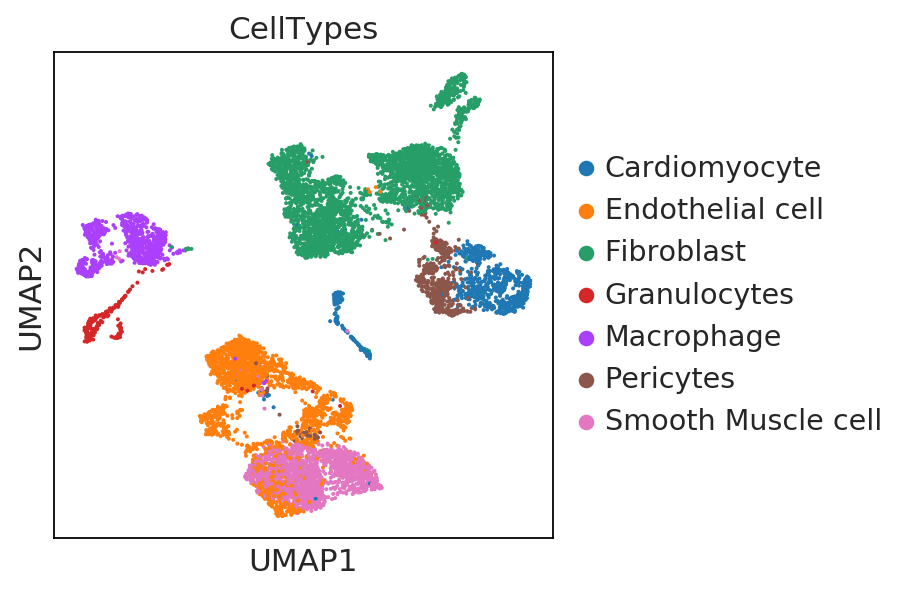

In [221]:
!pip install leidenalg
sc.pp.neighbors(scRNA_seq, n_neighbors=20, n_pcs=40)
sc.tl.leiden(scRNA_seq)
sc.tl.paga(scRNA_seq)
sc.pl.paga(scRNA_seq, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(scRNA_seq, init_pos='paga')
sc.pl.umap(scRNA_seq, color=['CellTypes']) 

In [222]:
pair['CellTypes']=''
pair['CellTypes']= scRNA_seq.obs.loc[pair['scRNA'].values,'CellTypes'].values
pair.index = pair['scATAC'].values
pair

,scRNA,scATAC,sample,CellTypes
GCCCAGATCGTGGGTC-1,P1_3MI_AAACCTGGTAGCGATG-1,GCCCAGATCGTGGGTC-1,cell_0,Endothelial cell
CTCGCTAGTCAGCAAG-1,P1_3MI_AAACCTGGTTCGCGAC-1,CTCGCTAGTCAGCAAG-1,cell_1,Endothelial cell
CAGTGCGGTTTGGATC-1,P1_3MI_AAACCTGTCGTAGATC-1,CAGTGCGGTTTGGATC-1,cell_2,Fibroblast
CCGAAGCTCTTCAGAG-1,P1_3MI_AAACCTGTCTTGTTTG-1,CCGAAGCTCTTCAGAG-1,cell_3,Fibroblast
AGCTGATGTGCAAGCA-1,P1_3MI_AAACGGGCAAGCTGGA-1,AGCTGATGTGCAAGCA-1,cell_4,Endothelial cell
...,...,...,...,...
AAACTCGAGGGATCCA-4,P8_3Sham_TGTTCCGCACACTGCG-1,AAACTCGAGGGATCCA-4,cell_1297,Smooth Muscle cell
AGATTCGAGTATACCC-4,P8_3Sham_CAGGTGCTCATGCATG-1,AGATTCGAGTATACCC-4,cell_1298,Fibroblast
TCTAGTTAGACCATAA-4,P8_3Sham_CGTGAGCCATGGTTGT-1,TCTAGTTAGACCATAA-4,cell_1299,Smooth Muscle cell
GTCACGGTCACAAGCT-4,P8_3Sham_GTAGGCCCATCTCCCA-1,GTCACGGTCACAAGCT-4,cell_1300,Fibroblast


In [223]:
scATAC_seq.obs['CellTypes']=pair.loc[scATAC_seq.obs.index.values,'CellTypes'].values
scATAC_seq.obs

,Type,Stem_Cell_Property,Myocardial_infarction,nb_features,log_nb_features,delli,sample,CellTypes,domain,CellType
AAACGAAAGGATGTCG-1,P1+3 dpi,pos,MI,13472.0,3.757851,tr,cell_0,Endothelial cell,scATAC-seq,
AAACGAAAGTAACTCC-1,P1+3 dpi,pos,MI,9145.0,3.623559,tr,cell_1,Cardiomyocyte,scATAC-seq,
AAACGAACACTTACAG-1,P1+3 dpi,pos,MI,20611.0,3.949488,tr,cell_2,Macrophage,scATAC-seq,Fibroblast
AAACGAACATATACGC-1,P1+3 dpi,pos,MI,16051.0,3.860937,tr,cell_3,Macrophage,scATAC-seq,Fibroblast
AAACGAAGTATTCTGG-1,P1+3 dpi,pos,MI,11284.0,3.724194,tr,cell_4,Endothelial cell,scATAC-seq,
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTCGCGTT-4,P8+3 dps,neg,Sham,10525.0,3.652633,tr,cell_9202,Smooth Muscle cell,scATAC-seq,
TTTGGTTTCTTACGGA-4,P8+3 dps,neg,Sham,5865.0,3.427648,tr,cell_9203,Smooth Muscle cell,scATAC-seq,
TTTGTGTCAAGGCGTA-4,P8+3 dps,neg,Sham,1207.0,2.772322,tr,cell_9204,Smooth Muscle cell,scATAC-seq,
TTTGTGTCAATCACTG-4,P8+3 dps,neg,Sham,8727.0,3.595827,tr,cell_9205,Pericytes,scATAC-seq,


In [224]:
scRNA_seq_Gra_index = scRNA_seq.obs[scRNA_seq.obs['CellTypes'].str.contains('Granulocytes')]
scRNA_seq_Mar_index = scRNA_seq.obs[scRNA_seq.obs['CellTypes'].str.contains('Marcophage')]
scRNA_seq_Gra_Mar_index = pd.concat([scRNA_seq_Gra_index,scRNA_seq_Mar_index],axis=0)
scRNA_seq_Gra_Mar = scRNA_seq[scRNA_seq_Gra_Mar_index.index,:]

scATAC_seq_Gra_index = scATAC_seq.obs[scATAC_seq.obs['CellTypes'].str.contains('Granulocytes')]
scATAC_seq_Mar_index = scATAC_seq.obs[scATAC_seq.obs['CellTypes'].str.contains('Marcophage')]
scATAC_seq_Gra_Mar_index = pd.concat([scATAC_seq_Gra_index,scATAC_seq_Mar_index],axis=0)
scATAC_seq_Gra_Mar = scATAC_seq[scATAC_seq_Gra_Mar_index.index,:]

scEnhancer_Gra_Mar = scEnhancer[scATAC_seq_Gra_Mar_index.index,:]
scPromoter_Gra_Mar = scPromoter[scATAC_seq_Gra_Mar_index.index,:]

In [225]:
scRNA_seq_Gra_Mar_P1 = scRNA_seq_Gra_Mar[scRNA_seq_Gra_Mar.obs[scRNA_seq_Gra_Mar.obs['Type'].str.contains('P1')].index,:]
scATAC_seq_Gra_Mar_P1 = scATAC_seq_Gra_Mar[scATAC_seq_Gra_Mar.obs[scATAC_seq_Gra_Mar.obs['Type'].str.contains('P1')].index,:]
scEnhancer_Gra_Mar_P1 = scEnhancer_Gra_Mar[scEnhancer_Gra_Mar.obs[scEnhancer_Gra_Mar.obs['Type'].str.contains('P1')].index,:]
scPromoter_Gra_Mar_P1 = scPromoter_Gra_Mar[scPromoter_Gra_Mar.obs[scPromoter_Gra_Mar.obs['Type'].str.contains('P1')].index,:]

In [226]:
scRNA_seq_Gra_Mar_P8 = scRNA_seq_Gra_Mar[scRNA_seq_Gra_Mar.obs[scRNA_seq_Gra_Mar.obs['Type'].str.contains('P8')].index,:]
scATAC_seq_Gra_Mar_P8 = scATAC_seq_Gra_Mar[scATAC_seq_Gra_Mar.obs[scATAC_seq_Gra_Mar.obs['Type'].str.contains('P8')].index,:]
scEnhancer_Gra_Mar_P8 = scEnhancer_Gra_Mar[scEnhancer_Gra_Mar.obs[scEnhancer_Gra_Mar.obs['Type'].str.contains('P8')].index,:]
scPromoter_Gra_Mar_P8 = scPromoter_Gra_Mar[scPromoter_Gra_Mar.obs[scPromoter_Gra_Mar.obs['Type'].str.contains('P8')].index,:]

In [227]:
import h5py
import pandas as pd
import numpy as np

In [228]:
def normalization(data):
    _range = np.max(abs(data))
    return data / _range

In [229]:
def get_weights(f,view,factor,scale=True):
  view_names=f['views']['views'][:]
  group_names=f['groups']['groups'][:]
  feature_names=np.array([f['features'][i][:] for i in view_names])
  sample_names=np.array([f['samples'][i][:] for i in group_names])
  f_name=feature_names[np.where(view_names==str.encode(view))[0][0]]
  f_w=f['expectations']['W'][view][factor-1]
  if scale==True:
    f_w=normalization(f_w)
  res=pd.DataFrame()
  res['feature']=f_name
  res['weights']=f_w
  res['abs_weights']=abs(f_w)
  res['sig']='+'
  res.loc[(res.weights<0),'sig'] = '-'

  return res

In [230]:
f_Gra_Mar_P1 = h5py.File('/content/MOFA_Gra_Mar_P1.hdf5','r')   #打开h5文件
# 可以查看所有的主键
for key in f_Gra_Mar_P1.keys():
    print(f_Gra_Mar_P1[key].name)

/data
/expectations
/features
/groups
/intercepts
/model_options
/samples
/training_opts
/training_stats
/variance_explained
/views


In [231]:
for i in range(f_Gra_Mar_P1['expectations']['Z']['group0'].shape[0]):
  scRNA_seq_Gra_Mar_P1.obs['factor{0}'.format(i+1)]=f_Gra_Mar_P1['expectations']['Z']['group0'][i]

In [232]:
!pip install matplotlib==3.1.3
import matplotlib

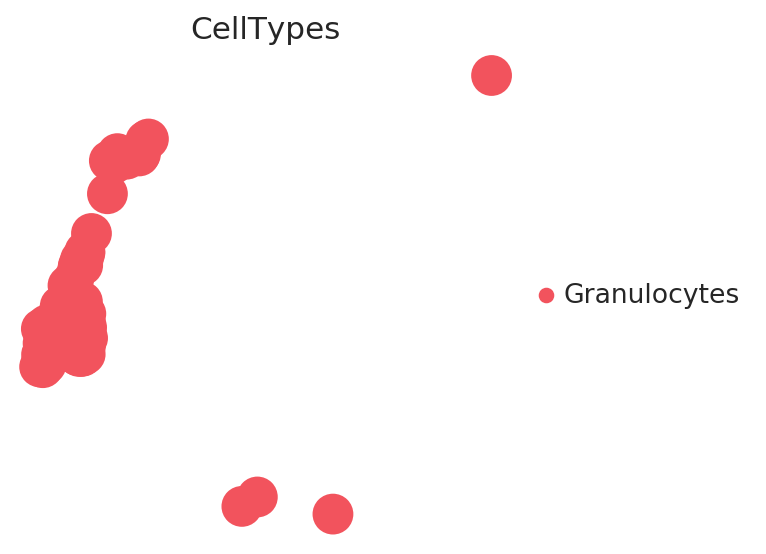

In [233]:
import seaborn as sns
scnmt=['#f2535d','#a2e8c4','#e5e24f','#6aafda','#c76fc7','#c4425d','#f48a3d','black','grey']
sc.settings.set_figure_params(dpi=80,figsize=[4,4])
sc.pl.umap(scRNA_seq_Gra_Mar_P1,
      color=["CellTypes"], 
      add_outline=False, 
      legend_loc='right margin', 
      legend_fontsize=12, 
      legend_fontoutline=1,
      frameon=False, palette=scnmt,
      )

In [234]:
#variance=pd.read_csv('/content/drive/MyDrive/MI/MOFA/variance_explained_Card_Per_P1.csv')
#corr=pd.read_csv('/content/drive/MyDrive/MI/MOFA/correlate_factors_Card_Per_P1.csv')
#variance.index=corr.index
#variance

NameError: ignored

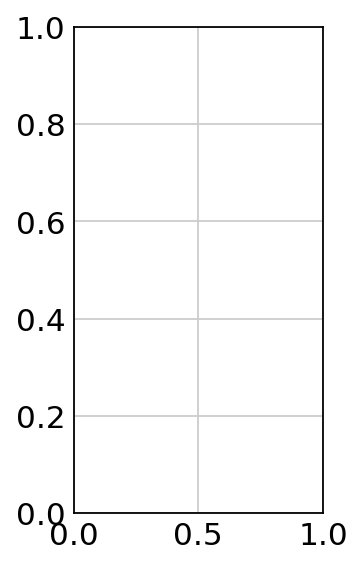

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2,4))         # Sample figsize in inches
new_blues=sns.color_palette("Greens", 1000)[0:700]
g=sns.heatmap(variance,
      cmap=new_blues,vmax=10,
      linewidths=.5,annot_kws={"size": 12},ax=ax
      )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('Card_Per_P1 Var')
plt.savefig("Card_Per_P1.png",dpi=300,bbox_inches = 'tight')

In [ ]:
fig, ax = plt.subplots(figsize=(2,4))         # Sample figsize in inches
new_reds=sns.color_palette("Reds", 1000)[0:700]
g=sns.heatmap(corr,
      cmap=new_reds, vmax=100,
      linewidths=.5,annot_kws={"size": 12},ax=ax,
      )

g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('End_Smo_P1 cor')
plt.savefig("End_Smo_P1_cor.png",dpi=300,bbox_inches = 'tight')

In [241]:
plot_data=scRNA_seq_Gra_Mar_P1.obs
plot_data.head()

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,...,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17
P1_3MI_AACCGCGTCGATCCCT-1,pos,MI,3days,P1+3 dpi,1794,1794,5663.0,0.0,0.0,16,...,-0.006724,-0.021298,-0.012533,-0.023552,-0.016632,-0.016018,-0.010503,0.046895,-0.012228,-0.012334
P1_3MI_AATCCAGAGAACAACT-1,pos,MI,3days,P1+3 dpi,1234,1234,3686.0,0.0,0.0,16,...,-0.008099,-0.021121,-0.012712,-0.020296,-0.016028,-0.015318,-0.010551,0.046252,-0.011750,-0.010397
P1_3MI_ACACTGAAGTATGACA-1,pos,MI,3days,P1+3 dpi,1151,1151,3362.0,0.0,0.0,16,...,-0.006793,-0.021193,-0.012648,-0.023191,-0.016296,-0.015582,-0.010486,0.046788,-0.012072,-0.011390
P1_3MI_ACGTCAATCGGCGCAT-1,pos,MI,3days,P1+3 dpi,1064,1064,3145.0,0.0,0.0,16,...,-0.007009,-0.021212,-0.012504,-0.022698,-0.016125,-0.016056,-0.010423,0.046561,-0.012000,-0.011425
P1_3MI_ACTTTCAGTCTCTCGT-1,pos,MI,3days,P1+3 dpi,1094,1094,3390.0,0.0,0.0,16,...,-0.006519,-0.021692,-0.012943,-0.024232,-0.018683,-0.016369,-0.010606,0.046897,-0.012280,-0.014725


In [238]:
from scipy.stats import ttest_1samp
from scipy import stats

In [239]:
cell_t=list(set(plot_data['CellTypes']))
cell_pd=pd.DataFrame(index=cell_t)

for i in [1]:
  test=[]
  for j in cell_t:
    a=plot_data[plot_data['CellTypes']==j]['factor'+str(i)].values
    b=plot_data[~(plot_data['CellTypes']==j)]['factor'+str(i)].values
    t, p = stats.ttest_ind(a,b)
    logp=-np.log(p)
    if(logp>500):
      logp=500
    test.append(logp)
  cell_pd['factor'+str(i)]=test
cell_pd

,factor1
Granulocytes,NaN


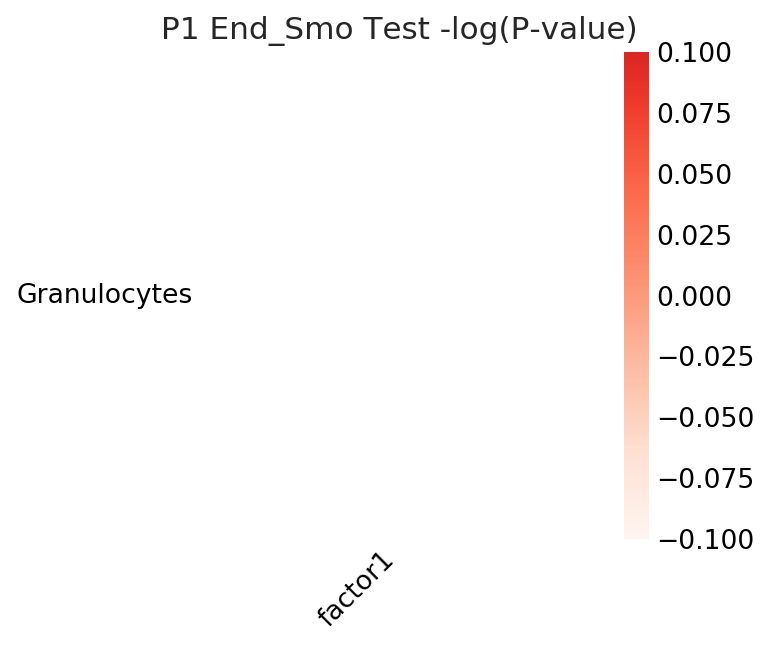

In [240]:
fig, ax = plt.subplots(figsize=(4,4))         # Sample figsize in inches
new_blues=sns.color_palette("Reds", 1000)[0:700]
g=sns.heatmap(cell_pd,
      cmap=new_blues,vmax=500,
      linewidths=.5,annot_kws={"size": 12},ax=ax
      )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('P1 End_Smo Test -log(P-value)')
plt.savefig("p1_End_Smo_cor_cell.png",dpi=300,bbox_inches = 'tight')

In [ ]:
for i in [1]:
  sns.boxplot(y='CellTypes',x='factor'+str(i),data=scRNA_seq_End_Smo_P1.obs)
  plt.title('End_Smo_P1 factor')
  plt.savefig("End_Smo_P1_factor{0}.png".format(str(i)),dpi=300,bbox_inches = 'tight')
  plt.show()  

## MOFA End_Smo_P8 processs

In [ ]:
import h5py
import pandas as pd
import numpy as np

In [ ]:
def normalization(data):
    _range = np.max(abs(data))
    return data / _range

In [ ]:
def get_weights(f,view,factor,scale=True):
  view_names=f['views']['views'][:]
  group_names=f['groups']['groups'][:]
  feature_names=np.array([f['features'][i][:] for i in view_names])
  sample_names=np.array([f['samples'][i][:] for i in group_names])
  f_name=feature_names[np.where(view_names==str.encode(view))[0][0]]
  f_w=f['expectations']['W'][view][factor-1]
  if scale==True:
    f_w=normalization(f_w)
  res=pd.DataFrame()
  res['feature']=f_name
  res['weights']=f_w
  res['abs_weights']=abs(f_w)
  res['sig']='+'
  res.loc[(res.weights<0),'sig'] = '-'

  return res

In [ ]:
f_End_Smo_P8 = h5py.File('/content/drive/MyDrive/MI/MOFA_End_Smo_P8.hdf5','r')   #打开h5文件
# 可以查看所有的主键
for key in f_End_Smo_P8.keys():
    print(f_End_Smo_P8[key].name)

/data
/expectations
/features
/groups
/intercepts
/model_options
/samples
/training_opts
/training_stats
/variance_explained
/views


In [ ]:
for i in range(f_End_Smo_P8['expectations']['Z']['group0'].shape[0]):
  scRNA_seq_End_Smo_P8.obs['factor{0}'.format(i+1)]=f_End_Smo_P8['expectations']['Z']['group0'][i]

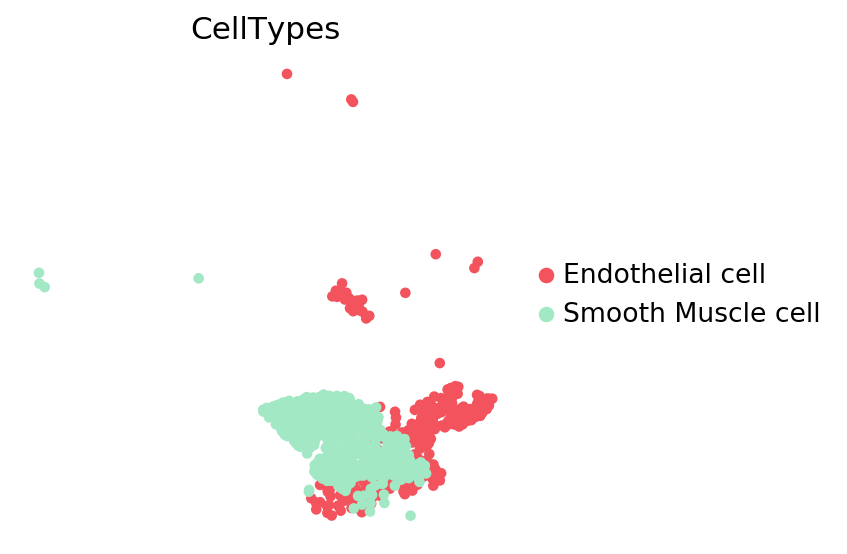

In [ ]:
scnmt=['#f2535d','#a2e8c4','#e5e24f','#6aafda','#c76fc7','#c4425d','#f48a3d','black','grey']
sc.settings.set_figure_params(dpi=80,figsize=[4,4])
sc.pl.umap(scRNA_seq_End_Smo_P8,
      color=["CellTypes"], 
      add_outline=False, 
      legend_loc='right margin', 
      legend_fontsize=12, 
      legend_fontoutline=1,
      frameon=False, palette=scnmt,
      )

In [ ]:
plot_data=scRNA_seq_End_Smo_P8.obs
plot_data.head()

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,...,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11
P8_3MI_AAACGGGAGCGTTGCC-1,neg,MI,3days,P8+3 dpi,3153,3153,8298.0,0.0,0.0,0,...,-0.069978,0.010714,-0.012052,-0.031809,-0.113811,-0.167372,-0.202471,-0.065142,-0.047120,-0.032507
P8_3MI_AAACGGGAGTACGCCC-1,neg,MI,3days,P8+3 dpi,1655,1655,3300.0,0.0,0.0,0,...,1.051758,-0.284424,-0.159954,-0.135454,-0.071692,-0.175279,-0.039440,-0.101677,-0.186071,-0.055197
P8_3MI_AAACGGGAGTGTTGAA-1,neg,MI,3days,P8+3 dpi,3498,3498,10949.0,0.0,0.0,9,...,0.829535,-0.380168,-0.103984,0.067927,-0.142977,-0.186221,-0.347782,-0.072063,-0.180785,-0.054910
P8_3MI_AAAGCAAAGTTTAGGA-1,neg,MI,3days,P8+3 dpi,2175,2175,4937.0,0.0,0.0,0,...,-0.962530,-0.092991,-0.112450,0.013970,-0.071543,0.048023,-0.106243,0.707359,0.136899,-0.053911
P8_3MI_AAAGCAACATGTAAGA-1,neg,MI,3days,P8+3 dpi,2305,2305,6048.0,0.0,0.0,9,...,2.417782,0.336318,-0.173803,-0.246952,-0.089587,0.043230,-0.211816,-0.152635,-0.189270,-0.038578


In [ ]:
from scipy.stats import ttest_1samp
from scipy import stats

In [ ]:
cell_t=list(set(plot_data['CellTypes']))
cell_pd=pd.DataFrame(index=cell_t)

for i in [1,2,3,4]:
  test=[]
  for j in cell_t:
    a=plot_data[plot_data['CellTypes']==j]['factor'+str(i)].values
    b=plot_data[~(plot_data['CellTypes']==j)]['factor'+str(i)].values
    t, p = stats.ttest_ind(a,b)
    logp=-np.log(p)
    if(logp>500):
      logp=500
    test.append(logp)
  cell_pd['factor'+str(i)]=test
cell_pd

,factor1,factor2,factor3,factor4
Smooth Muscle cell,451.499314,187.687558,1.061453,0.694416
Endothelial cell,451.499314,187.687558,1.061453,0.694416


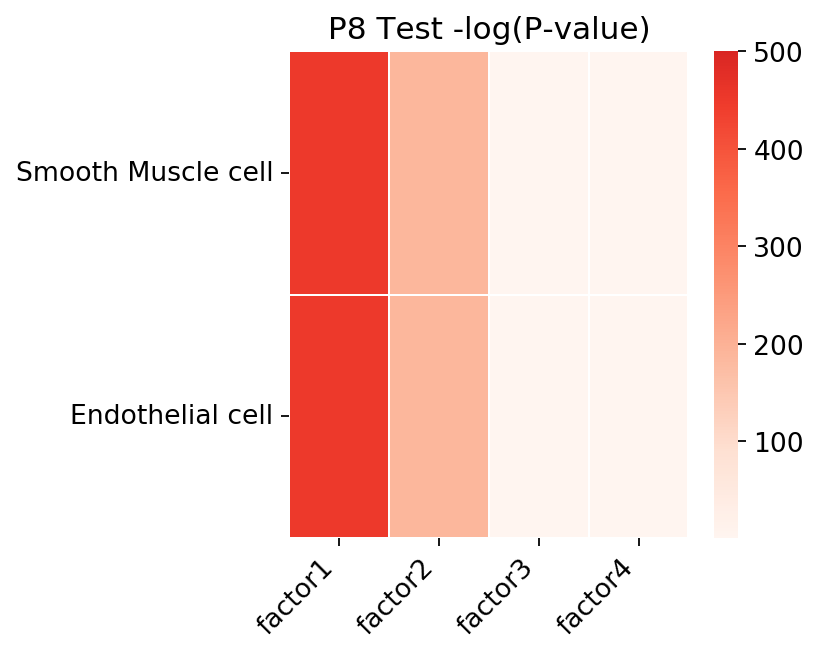

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))         # Sample figsize in inches
new_blues=sns.color_palette("Reds", 1000)[0:700]
g=sns.heatmap(cell_pd,
      cmap=new_blues,vmax=500,
      linewidths=.5,annot_kws={"size": 12},ax=ax
      )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('P8 Test -log(P-value)')
plt.savefig("p8_cor_cell.png",dpi=300,bbox_inches = 'tight')

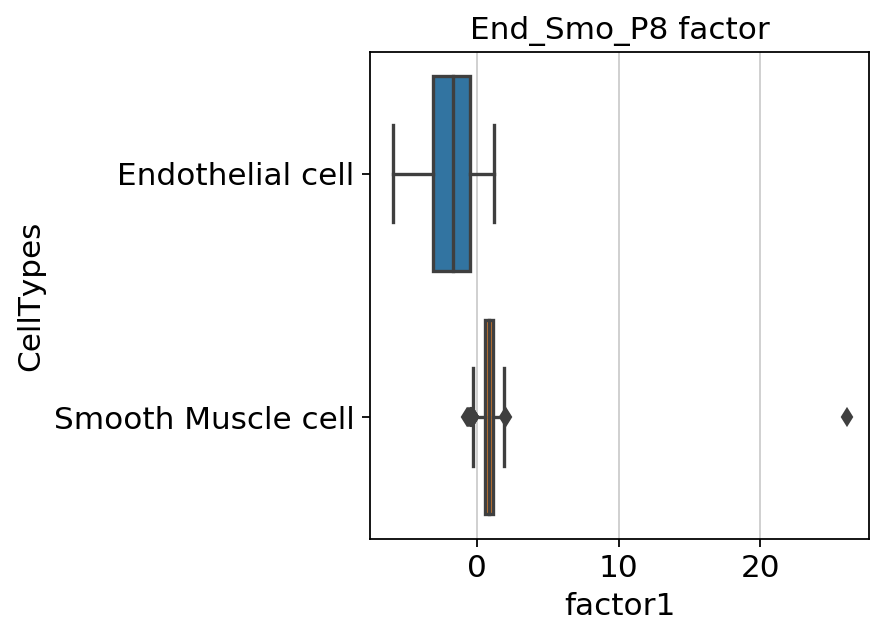

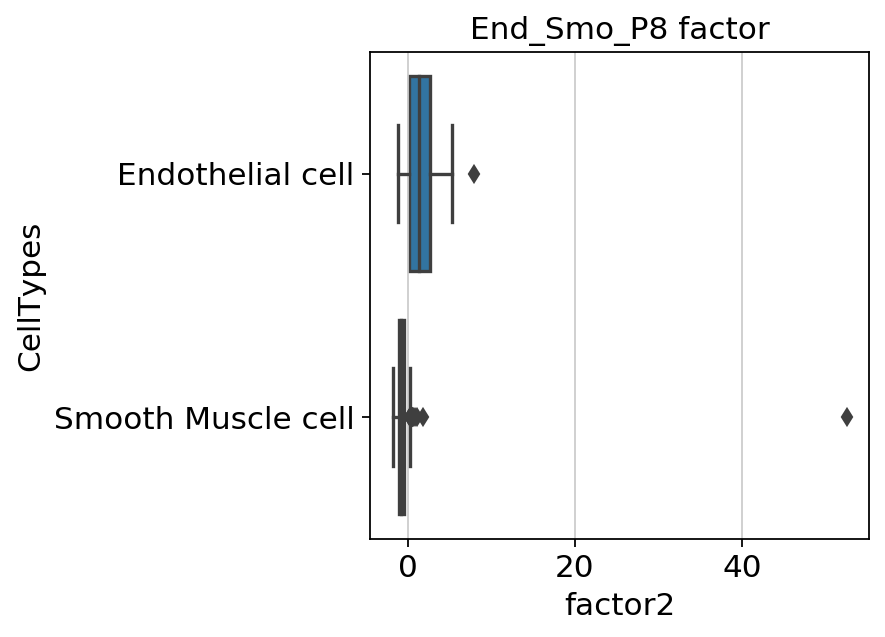

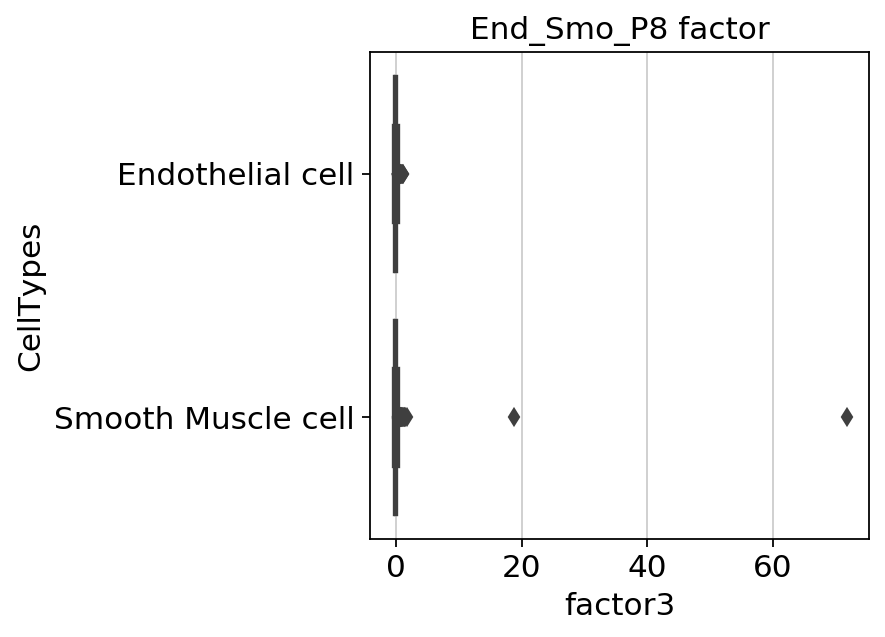

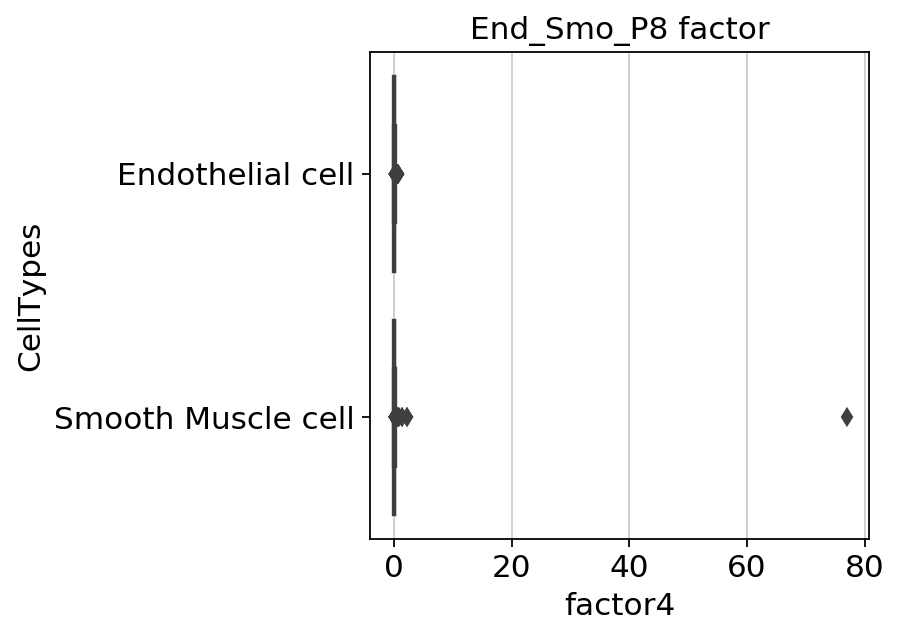

In [ ]:
for i in [1,2,3,4]:
  sns.boxplot(y='CellTypes',x='factor'+str(i),data=scRNA_seq_End_Smo_P8.obs)
  plt.title('End_Smo_P8 factor')
  plt.savefig("End_Smo_P8_factor{0}.png".format(str(i)),dpi=300,bbox_inches = 'tight')
  plt.show()  

## Endothelial Cell

In [ ]:
from matplotlib_venn import venn2,venn2_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline

In [ ]:
End_Smo_RNA_factor1_P1=get_weights(f_End_Smo_P1,'RNA',1)
xl=[]
for i in End_Smo_RNA_factor1_P1['feature'].values:
  xl.append(bytes.decode(i).replace('Mutation',''))
End_Smo_RNA_factor1_P1['feature']=xl
End_Smo_RNA_factor1_P1=End_Smo_RNA_factor1_P1.sort_values('weights',ascending=False)
End_Smo_RNA_factor1_P1.head(10)

,feature,weights,abs_weights,sig
1342,Shkbp1,1.000000,1.000000,+
2635,Eif4g1,0.724943,0.724943,+
1677,Pcp2,0.694212,0.694212,+
488,Bgn,0.623731,0.623731,+
986,Spp1,0.598943,0.598943,+
1274,Nlrp4c,0.573773,0.573773,+
1039,Eln,0.525036,0.525036,+
33,Col3a1,0.497507,0.497507,+
1658,Myl6,0.490362,0.490362,+
2080,Slc35e4,0.482858,0.482858,+


In [ ]:
End_Smo_RNA_factor1_P8=get_weights(f_End_Smo_P8,'RNA',1)
xl=[]
for i in End_Smo_RNA_factor1_P8['feature'].values:
  xl.append(bytes.decode(i).replace('Mutation',''))
End_Smo_RNA_factor1_P8['feature']=xl
End_Smo_RNA_factor1_P8=End_Smo_RNA_factor1_P8.sort_values('weights',ascending=False)
End_Smo_RNA_factor1_P8.head(10)

,feature,weights,abs_weights,sig
2625,Gm21897,0.503544,0.503544,+
883,Cd36,0.388985,0.388985,+
1713,Purg,0.357400,0.357400,+
1081,Gng11,0.318633,0.318633,+
544,Fabp4,0.310916,0.310916,+
821,Hspg2,0.284593,0.284593,+
1714,5930422O12Rik,0.281438,0.281438,+
1021,Myl2,0.271351,0.271351,+
946,Kdr,0.267626,0.267626,+
134,Tnnt2,0.266875,0.266875,+


In [ ]:
End_Smo_RNA_factor2_P8=get_weights(f_End_Smo_P8,'RNA',2)
xl=[]
for i in End_Smo_RNA_factor2_P8['feature'].values:
  xl.append(bytes.decode(i).replace('Mutation',''))
End_Smo_RNA_factor2_P8['feature']=xl
End_Smo_RNA_factor2_P8=End_Smo_RNA_factor1_P8.sort_values('weights',ascending=False)
End_Smo_RNA_factor2_P8.head(10)

,feature,weights,abs_weights,sig
2625,Gm21897,0.503544,0.503544,+
883,Cd36,0.388985,0.388985,+
1713,Purg,0.357400,0.357400,+
1081,Gng11,0.318633,0.318633,+
544,Fabp4,0.310916,0.310916,+
821,Hspg2,0.284593,0.284593,+
1714,5930422O12Rik,0.281438,0.281438,+
1021,Myl2,0.271351,0.271351,+
946,Kdr,0.267626,0.267626,+
134,Tnnt2,0.266875,0.266875,+


Pcp2, Shkbp1, Spp1, Bgn, Eif4g1
['RP23-294B14.1', 'Stmn2', 'Usp18', 'Pvt1', 'Tm4sf1', 'Pigyl']


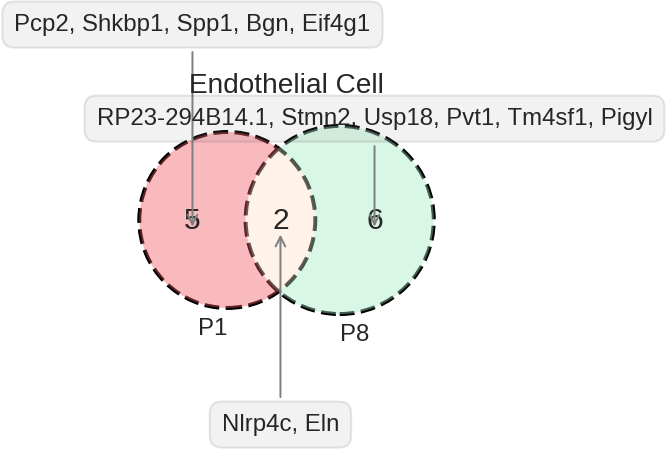

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))         # Sample figsize in inches

pos_f=End_Smo_RNA_factor1_P1.loc[End_Smo_RNA_factor1_P1['weights']>0.5,'feature']
#neg_f_1=End_Smo_RNA_factor2_P8.loc[End_Smo_RNA_factor2_P8['weights']>0.25,'feature']
#neg_f_2=End_Smo_RNA_factor1_P8.loc[End_Smo_RNA_factor1_P8['weights']<-0.5,'feature']
#neg_f=list(set(neg_f_1).union(set(neg_f_2)))
neg_f=End_Smo_RNA_factor1_P8.loc[End_Smo_RNA_factor1_P8['weights']<-0.5,'feature']

venn2_circles(subsets=[set(pos_f),set(neg_f)],
        linestyle='--', linewidth=2, color="black",#外框线型、线宽、颜色
        normalize_to=1.0,
       )
v=venn2(subsets=[set(pos_f),set(neg_f)],
      set_labels=('P1','P8'),
      set_colors=("#f2535d","#a2ebc4"),
       normalize_to=1.0,)
ret=list(set(neg_f) & (set(pos_f))) 
plt.annotate(str(ret).replace('flag1','\n').replace("'",'').replace('[','').replace(']',''), xy=v.get_label_by_id('11').get_position() - np.array([0, 0.05]), xytext=(0,-100),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', color='gray'),size=12)

ret=list(set(pos_f).difference(set(neg_f))) 
plot_str=str(ret).replace("'",'').replace('[','').replace(']','')
print(plot_str)
plt.annotate(plot_str, xy=v.get_label_by_id('10').get_position() - np.array([0, 0.05]), xytext=(0,100),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', color='gray'),size=12)

ret=list(set(neg_f).difference(set(pos_f)))
plot_str=str(ret).replace("'",'').replace('[','').replace(']','')
print(ret)
plt.annotate(plot_str, xy=v.get_label_by_id('01').get_position() - np.array([0, 0.05]), xytext=(0,53),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', color='gray'),size=12)
v.get_label_by_id('10').set_fontsize(15)#1的大小设置为20
v.get_label_by_id('01').set_fontsize(15)#1的大小设置为20
v.get_label_by_id('11').set_fontsize(15)#1的大小设置为20
for t in v.set_labels: 
    t.set_fontsize(12) 
plt.title('Endothelial Cell')
plt.savefig("Endothelial Cell_venn.png",dpi=300,bbox_inches = 'tight')

In [ ]:
def get_viodata(res_ad,res_ctrl,cell_type,genelist):
  vio_data=pd.DataFrame()
  print(len(res_ad[res_ad.obs['CellTypes'].str.contains(cell_type)].X.T[0].A[0]),len(res_ctrl[res_ctrl.obs['CellTypes'].str.contains(cell_type)].X.T[0].A[0]))
  for i in genelist:
    test_1=pd.DataFrame()
    test_1['value']=res_ad[res_ad.obs['CellTypes'].str.contains(cell_type)][:,i].X.T[0].A[0]
    test_1['gene']=[i for i in [i]*len(test_1)]
    test_1['type']=[i for i in ['POS']*len(test_1)]
    test_2=pd.DataFrame()
    test_2['value']=res_ctrl[res_ctrl.obs['CellTypes'].str.contains(cell_type)][:,i].X.T[0].A[0]
    test_2['gene']=[i for i in [i]*len(test_2)]
    test_2['type']=[i for i in ['NEG']*len(test_2)]
  
    vio_data=pd.concat([vio_data,test_1],ignore_index=True)
    vio_data=pd.concat([vio_data,test_2],ignore_index=True)
  return vio_data

In [ ]:
def pltx(x1,x2,y1,y2,sig,min_x=0):
    x=np.ones((2))*x1
    y = np.arange(y1,y2,y2-y1-0.0001)
    plt.plot(x,y,label="$y$",color="black",linewidth=1)
    x=np.ones((2))*x2
    y = np.arange(y1,y2,y2-y1-0.0001)
    plt.plot(x,y,label="$y$",color="black",linewidth=1)
    x = np.arange(x1,x2+0.0001,x2-x1)
    y = y2+0*x
    plt.plot(x,y,label="$y$",color="black",linewidth=1)
    x0 = (x1+x2)/2
    y0=y2
    plt.annotate(r'%s'%sig, xy=(x0, y0), xycoords='data', xytext=(0, +1),
                     textcoords='offset points', fontsize=15,color="black")
    if(min_x!=0):
        plt.ylim(min_x,y2+y2/10)

In [ ]:
#pos_f=Card_Per_RNA_factor1_P1.loc[Card_Per_RNA_factor1_P1['weights']>0.841,'feature']
#neg_f=Card_Per_RNA_factor1_P8.loc[Card_Per_RNA_factor1_P8['weights']>0.6,'feature']

1403 408
Ttest_indResult(statistic=23.01371971526666, pvalue=5.273683231383653e-103)
5.273683231383653e-103 ***
Ttest_indResult(statistic=28.3411042691299, pvalue=1.5734282108393463e-146)
1.5734282108393463e-146 ***
Ttest_indResult(statistic=20.535641114804005, pvalue=2.0882787582352296e-84)
2.0882787582352296e-84 ***
Ttest_indResult(statistic=13.568188698068097, pvalue=5.224429855730567e-40)
5.224429855730567e-40 ***
Ttest_indResult(statistic=22.37833861819467, pvalue=4.037484635620948e-98)
4.037484635620948e-98 ***


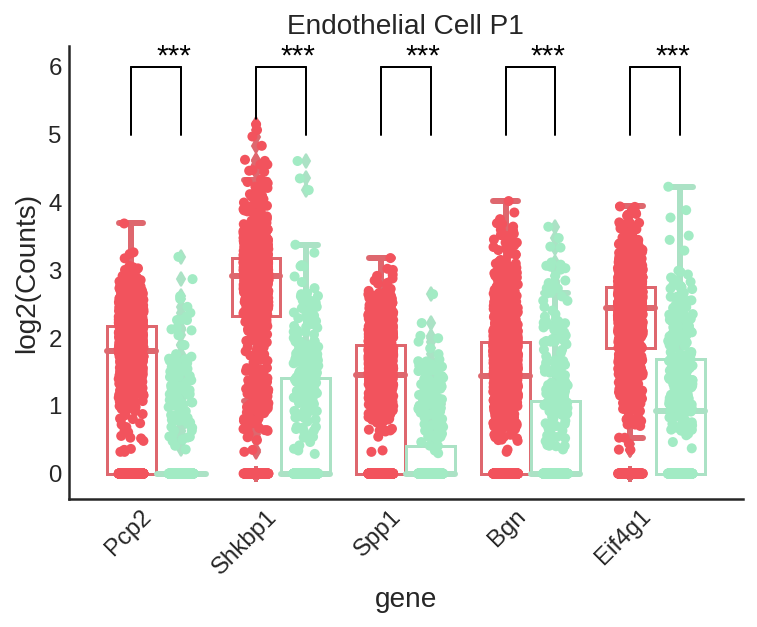

In [ ]:
ret=list(set(neg_f).difference(set(pos_f))) 
ret=list(set(pos_f).difference(set(neg_f)))
#ret=list(set(neg_f) & (set(pos_f))) 
plot_data1=get_viodata(scRNA_seq_End_Smo_P1,scRNA_seq_End_Smo_P8,'Endothelial',ret)
plot_data1
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x="gene", y="value", hue='type',data=plot_data1, 
        palette=["#f2535d","#a2ebc4"],ax=ax,
        #saturation=1
        )

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        line.set_linewidth(3)

# Also fix the legend
for legpatch in ax.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

sns.stripplot(x="gene", y="value", hue='type',data=plot_data1, 
        palette=["#f2535d","#a2ebc4"],ax=ax,
        split=True, jitter=0.2, 
        )

k=0
for i in ret:
  
  ttest = stats.ttest_ind(plot_data1.loc[(plot_data1['gene']==i)&(plot_data1['type']=='POS')]['value'].values, 
                          plot_data1.loc[(plot_data1['gene']==i)&(plot_data1['type']=='NEG')]['value'].values)
  #max=ty[ty['if']==dyt[i]]['value'].max()
  print(ttest)
  if(ttest[1]<0.001):
      xing="***"   
  elif(ttest[1]<0.01):
      xing="**"
  elif(ttest[1]<0.06):
      xing="*"
  else:
      xing=' '
  print(ttest[1],xing)
  if xing!=' ':
    pltx(k-0.2,k+0.2,5,6,xing,0)
  k+=1
plt.legend([],[])
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 15,rotation=45, horizontalalignment='right',)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
#plt.title('Neg Test -log(P-value)')
plt.title('Endothelial Cell P1')
plt.ylabel('log2(Counts)')
plt.savefig("Endothelial_Cell_P1_gene.png",dpi=300,bbox_inches = 'tight')

1403 408
Ttest_indResult(statistic=-12.356019938609965, pvalue=9.944072347581125e-34)
9.944072347581125e-34 ***
Ttest_indResult(statistic=-9.58309569714604, pvalue=2.9807921012780065e-21)
2.9807921012780065e-21 ***
Ttest_indResult(statistic=-15.432519665625234, pvalue=1.4268505259750564e-50)
1.4268505259750564e-50 ***
Ttest_indResult(statistic=-15.25788478982582, pvalue=1.5434330971695261e-49)
1.5434330971695261e-49 ***
Ttest_indResult(statistic=-8.043842094026115, pvalue=1.5590287832203054e-15)
1.5590287832203054e-15 ***
Ttest_indResult(statistic=-20.886641280364085, pvalue=5.779386840518207e-87)
5.779386840518207e-87 ***


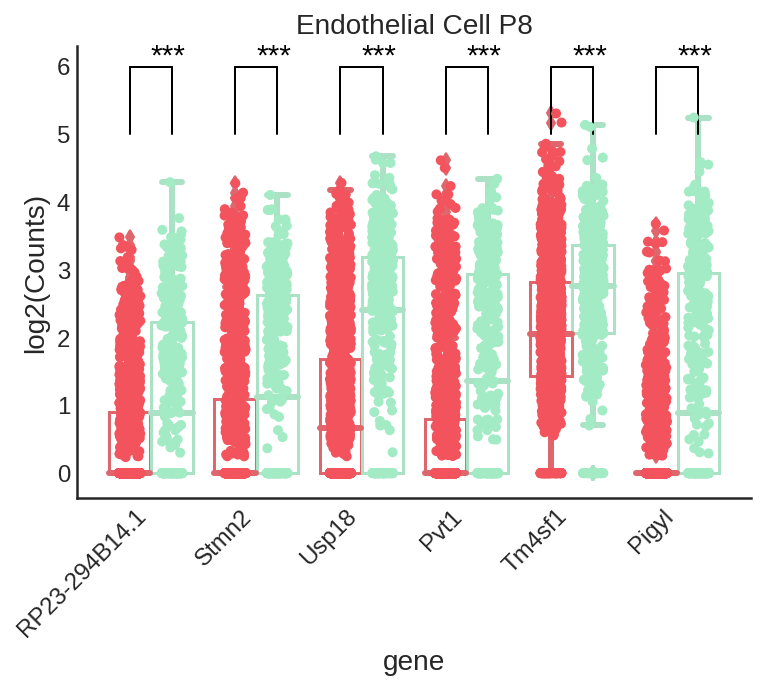

In [ ]:
ret=list(set(neg_f).difference(set(pos_f))) 
#ret=list(set(pos_f).difference(set(neg_f)))
#ret=list(set(neg_f) & (set(pos_f))) 
plot_data1=get_viodata(scRNA_seq_End_Smo_P1,scRNA_seq_End_Smo_P8,'Endothelial',ret)
plot_data1
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x="gene", y="value", hue='type',data=plot_data1, 
        palette=["#f2535d","#a2ebc4"],ax=ax,
        #saturation=1
        )

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        line.set_linewidth(3)

# Also fix the legend
for legpatch in ax.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

sns.stripplot(x="gene", y="value", hue='type',data=plot_data1, 
        palette=["#f2535d","#a2ebc4"],ax=ax,
        split=True, jitter=0.2, 
        )

k=0
for i in ret:
  
  ttest = stats.ttest_ind(plot_data1.loc[(plot_data1['gene']==i)&(plot_data1['type']=='POS')]['value'].values, 
                          plot_data1.loc[(plot_data1['gene']==i)&(plot_data1['type']=='NEG')]['value'].values)
  #max=ty[ty['if']==dyt[i]]['value'].max()
  print(ttest)
  if(ttest[1]<0.001):
      xing="***"   
  elif(ttest[1]<0.01):
      xing="**"
  elif(ttest[1]<0.06):
      xing="*"
  else:
      xing=' '
  print(ttest[1],xing)
  if xing!=' ':
    pltx(k-0.2,k+0.2,5,6,xing,0)
  k+=1
plt.legend([],[])
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 15,rotation=45, horizontalalignment='right',)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
#plt.title('Neg Test -log(P-value)')
plt.title('Endothelial Cell P8')
plt.ylabel('log2(Counts)')
plt.savefig("Endothelial_P8_gene.png",dpi=300,bbox_inches = 'tight')